# **IntelliShield: AI for Substance Misuse Prevention**
DataSet:NSDUH trimmed data(https://www.samhsa.gov/data/data-we-collect/nsduh-national-survey-drug-use-and-health/datafiles [link text](https://))



Sure! Here's the full explanation of the **NSDUH trimmed dataset** features in **English**:




###Dataset Summary

* **Name**: NSDUH Trimmed (National Survey on Drug Use and Health – trimmed version)
* **Source**: U.S. Department of Health and Human Services – SAMHSA
* **Year**: Likely around **2015–2016** (commonly used cleaned version for educational purposes)
* **Shape**: `(56,276 rows, 12 columns)`



### Feature Descriptions

| Feature                                  | Description                                                                                                  |
| ---------------------------------------- | ------------------------------------------------------------------------------------------------------------ |
| `id`                                     | Unique identifier for each participant (not used for modeling).                                              |
| `age`                                    | Age category (integer values 1–17):                                                                          |
|  1 = 12–13 years                         |                                                                                                              |
|  2 = 14–15 years                         |                                                                                                              |
|  ...                                     |                                                                                                              |
|  17 = 70 years or older                  |                                                                                                              |
| `gender`                                 | Gender:                                                                                                      |
|  1 = Male                                |                                                                                                              |
|  2 = Female                              |                                                                                                              |
| `education`                              | Education level (1–11):                                                                                      |
|  1–7 = Less than high school             |                                                                                                              |
|  8 = High school graduate                |                                                                                                              |
|  9–10 = Some college or associate degree |                                                                                                              |
|  11 = College graduate or higher         |                                                                                                              |
| `neuroticism`                            | A psychological trait measuring emotional instability (score aggregated from 12 questions, each scored 1–5). |
| `extraversion`                           | Personality trait reflecting sociability and energy (1–5 per question, aggregated).                          |
| `openness`                               | Openness to new experiences and creativity (1–5 per question, aggregated).                                   |
| `agreeableness`                          | Tendency to be compassionate and cooperative (1–5 per question, aggregated).                                 |
| `conscientiousness`                      | Degree of self-discipline and organization (1–5 per question, aggregated).                                   |
| `impulsiveness`                          | Tendency to act without thinking (scale from 1 to 11, higher = more impulsive).                              |
| `sensation`                              | Sensation seeking (scale from 1 to 11, higher = more thrill-seeking).                                        |
| `cannabis`                               | Target variable – cannabis (weed) use:                                                                       |
|  1 = Yes (uses cannabis)                 |                                                                                                              |
|  2 = No                                  |                                                                                                              |
|  94 = Doesn’t know                       |                                                                                                              |
|  97 = Refused to answer                  |                                                                                                              |





###  Notes

* The **five personality traits** (neuroticism, extraversion, openness, agreeableness, conscientiousness) are based on standard psychological scales such as **BFI** or **NEO-FFI**.
* Each of these traits is derived by summing or averaging responses to multiple survey questions scored from 1 (strongly disagree) to 5 (strongly agree).
* **Impulsiveness** and **Sensation Seeking** are behavioral traits measured on a separate 1–11 scale.

>* The **target** (`cannabis`) includes values (94, 97) that may need to be removed or handled before training a classification model.



In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/NSDUH_trimmed_data.csv")

In [ ]:
#Save a copy of the original data

original_data=data.copy()

In [ ]:
#Check the data format
data.shape

(56276, 12)

In [ ]:
##Display columns names
data.columns

Index(['id', 'age', 'gender', 'education', 'neuroticism', 'extraversion',
       'openness', 'agreeableness', 'conscientiousness', 'impulsiveness',
       'sensation', 'cannabis'],
      dtype='object')

Our Taget:cannabis

In [ ]:
#Delete the ID feature because we don't need it.
data.drop("id", axis=1, inplace=True)

In [ ]:
#Display the first 5 rows of data
data.head()

age  gender  education  neuroticism  extraversion  openness  agreeableness  \
0   17       1         11           28            52        46             26   
1   15       1         11           13            34        52             40   
2   15       1          9           50            45        26             24   
3   15       1         11           16            58        41             52   
4   17       2          8           60            35        35             35   

   conscientiousness  impulsiveness  sensation  cannabis  
0                 52              5          2         2  
1                 22              7          4         1  
2                 53              8          8         1  
3                 39              5         11         2  
4                 54              5          2         2

In [ ]:
#Display the last 5 rows of data
data.tail()

age  gender  education  neuroticism  extraversion  openness  \
56271   16       1         11           36            35        47   
56272   13       2          9           21            47        52   
56273    2       1          3           34            17        60   
56274   15       1         11           23            37        38   
56275   17       2          9           60            27        39   

       agreeableness  conscientiousness  impulsiveness  sensation  cannabis  
56271             18                 57              9          9         2  
56272             21                 47              8         11         2  
56273             39                 21              6          6         2  
56274             34                 36              3          2         1  
56275             43                 44              6          3         2

In [ ]:
#Display general information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56276 entries, 0 to 56275
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                56276 non-null  int64
 1   gender             56276 non-null  int64
 2   education          56276 non-null  int64
 3   neuroticism        56276 non-null  int64
 4   extraversion       56276 non-null  int64
 5   openness           56276 non-null  int64
 6   agreeableness      56276 non-null  int64
 7   conscientiousness  56276 non-null  int64
 8   impulsiveness      56276 non-null  int64
 9   sensation          56276 non-null  int64
 10  cannabis           56276 non-null  int64
dtypes: int64(11)
memory usage: 4.7 MB


Complete Data

All 11 features have no missing values (56276 non-null), which is excellent for modeling — no need for imputation.

All Features Are Numerical (int64)

This means:

No categorical variables need to be converted to numbers.



Dataset Size

With 56,276 samples, it's a relatively large dataset

Target Variable (cannabis)

Since it's an integer column with values like 1 = yes, 2 = no, 94 = unknown, and 97 = refused, it needs:

Filtering or recoding before training (e.g., remove or map 94 and 97 to NaN or drop those rows).


In [ ]:
#Display statistical information about the data
data.describe()

age        gender     education   neuroticism  extraversion  \
count  56276.000000  56276.000000  56276.000000  56276.000000  56276.000000   
mean      10.993496      1.519564      7.810825     36.017965     37.440667   
std        4.892097      0.499622      2.697252     14.151212     12.686741   
min        1.000000      1.000000      1.000000     12.000000     16.000000   
25%        7.000000      1.000000      6.000000     24.000000     26.000000   
50%       13.000000      2.000000      8.000000     36.000000     37.000000   
75%       15.000000      2.000000     10.000000     48.000000     48.000000   
max       17.000000      2.000000     11.000000     60.000000     59.000000   

           openness  agreeableness  conscientiousness  impulsiveness  \
count  56276.000000   56276.000000       56276.000000   56276.000000   
mean      41.998703      35.918313          37.447295       5.503394   
std       10.680988      14.125192          12.140726       2.872076   
min       24.000000      12.000000          17.000000       1.000000   
25%       33.000000      24.000000          27.000000       3.000000   
50%       42.000000      36.000000          37.000000       6.000000   
75%       51.000000      48.000000          48.000000       8.000000   
max       60.000000      60.000000          58.000000      10.000000   

          sensation     cannabis  
count  56276.000000  56276.00000  
mean       6.005118      1.62126  
std        3.161104      2.26028  
min        1.000000      1.00000  
25%        3.000000      1.00000  
50%        6.000000      2.00000  
75%        9.000000      2.00000  
max       11.000000     97.00000

-Demographics
Age

Range: 1–17 → Represents age groups, not raw age (e.g., 1 = 12–13 years, ..., 17 = 70+).

Mean: 11 → Most participants are likely in the 40–44 age range.

Gender

1 = Male, 2 = Female.

Mean ≈ 1.52 → Roughly 48% males, 52% females (slightly more females).

Education

Ranges from 1 (lowest) to 11 (college graduate or higher).

Mean= 8 → Most participants have completed high school.

Skewed toward lower education (mean = 7.81 < median).

- Psychological Traits
Trait	Mean	Min–Max	Interpretation
Neuroticism	36.02	12–60	Moderate to high emotional instability.
Extraversion	37.44	16–59	Moderate sociability.
Openness	42.00	24–60	Generally open to new experiences.
Agreeableness	35.92	12–60	Moderate; some variation in cooperativeness.
Conscientiousness	37.45	17–58	Balanced levels of discipline and responsibility.

-->All are aggregated scores (probably from 12 Likert-scale questions, 1–5 points each).

 Behavioral Traits
Trait	Mean	Min–Max	Interpretation
Impulsiveness	5.50	1–10	Slightly above midpoint → Moderate impulsivity.
Sensation	6.01	1–11	Above average → Many participants seek excitement.

- Cannabis Use (cannabis)
Values:

1 = Yes

2 = No

94 = Don’t know

97 = Refused

Mean ≈ 1.62
→ Most participants do not use cannabis, but outliers (94, 97) are present and should be filtered before modeling.

In [ ]:
#Ensure that there are no duplicate values ​​to process them, if any.
data.duplicated().sum()

0

No duplicate values

In [ ]:
#Ensure that there are no empty values ​​to process them, if any
data.isnull().sum()

age                  0
gender               0
education            0
neuroticism          0
extraversion         0
openness             0
agreeableness        0
conscientiousness    0
impulsiveness        0
sensation            0
cannabis             0
dtype: int64

No empty values

In [ ]:
#Display the number of unique values ​​for each feature
data.nunique()

id                   56276
age                     17
gender                   2
education               11
neuroticism             49
extraversion            44
openness                37
agreeableness           49
conscientiousness       42
impulsiveness           10
sensation               11
cannabis                 4
dtype: int64

In [ ]:
#Display the unique values ​​in each feature
for column in data.columns:
    print(f"Unique values in {column}:")
    print(data[column].unique())
    print()

Unique values in id:
[55235143 13435143 81345143 ... 44444730 93354730 23974730]

Unique values in age:
[17 15  8 11  1 13 12 16 14  7  4  6  9 10  2  3  5]

Unique values in gender:
[1 2]

Unique values in education:
[11  9  8  6  5  2 10  7  4  3  1]

Unique values in neuroticism:
[28 13 50 16 60 32 58 56 18 43 55 20 49 14 42 35 17 51 52 23 12 38 27 22
 31 44 29 25 15 41 33 57 45 19 47 54 46 37 48 59 21 40 26 53 36 39 24 30
 34]

Unique values in extraversion:
[52 34 45 58 35 27 17 16 25 43 37 26 21 46 51 38 22 44 23 29 57 59 39 20
 33 28 36 48 54 49 41 53 24 42 50 18 55 31 30 19 40 32 56 47]

Unique values in openness:
[46 52 26 41 35 28 51 48 27 53 42 37 36 56 57 49 33 30 34 59 47 40 24 54
 32 58 43 44 45 29 50 38 55 25 60 31 39]

Unique values in agreeableness:
[26 40 24 52 35 36 38 29 16 44 17 43 15 50 60 23 31 21 41 47 56 13 12 58
 57 33 37 25 53 54 22 34 51 18 27 30 39 46 19 45 32 49 20 48 42 59 14 28
 55]

Unique values in conscientiousness:
[52 22 53 39 54 50 42 20 17 33 36 4

# **Exploratory Data Analysis**

In [ ]:
!pip uninstall -y pydantic ydata-profiling

Found existing installation: pydantic 2.11.4
Uninstalling pydantic-2.11.4:
  Successfully uninstalled pydantic-2.11.4


In [ ]:
!pip install ydata-profiling==4.6.0 pydantic==1.10.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.3/149.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 10.0 MB/s eta 0:00:00
   ━━

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

In [ ]:
#Definition of numeric columns
numeric_cols = ['age', 'neuroticism', 'extraversion', 'openness', 'agreeableness', 'conscientiousness', 'impulsiveness', 'sensation',"education"]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

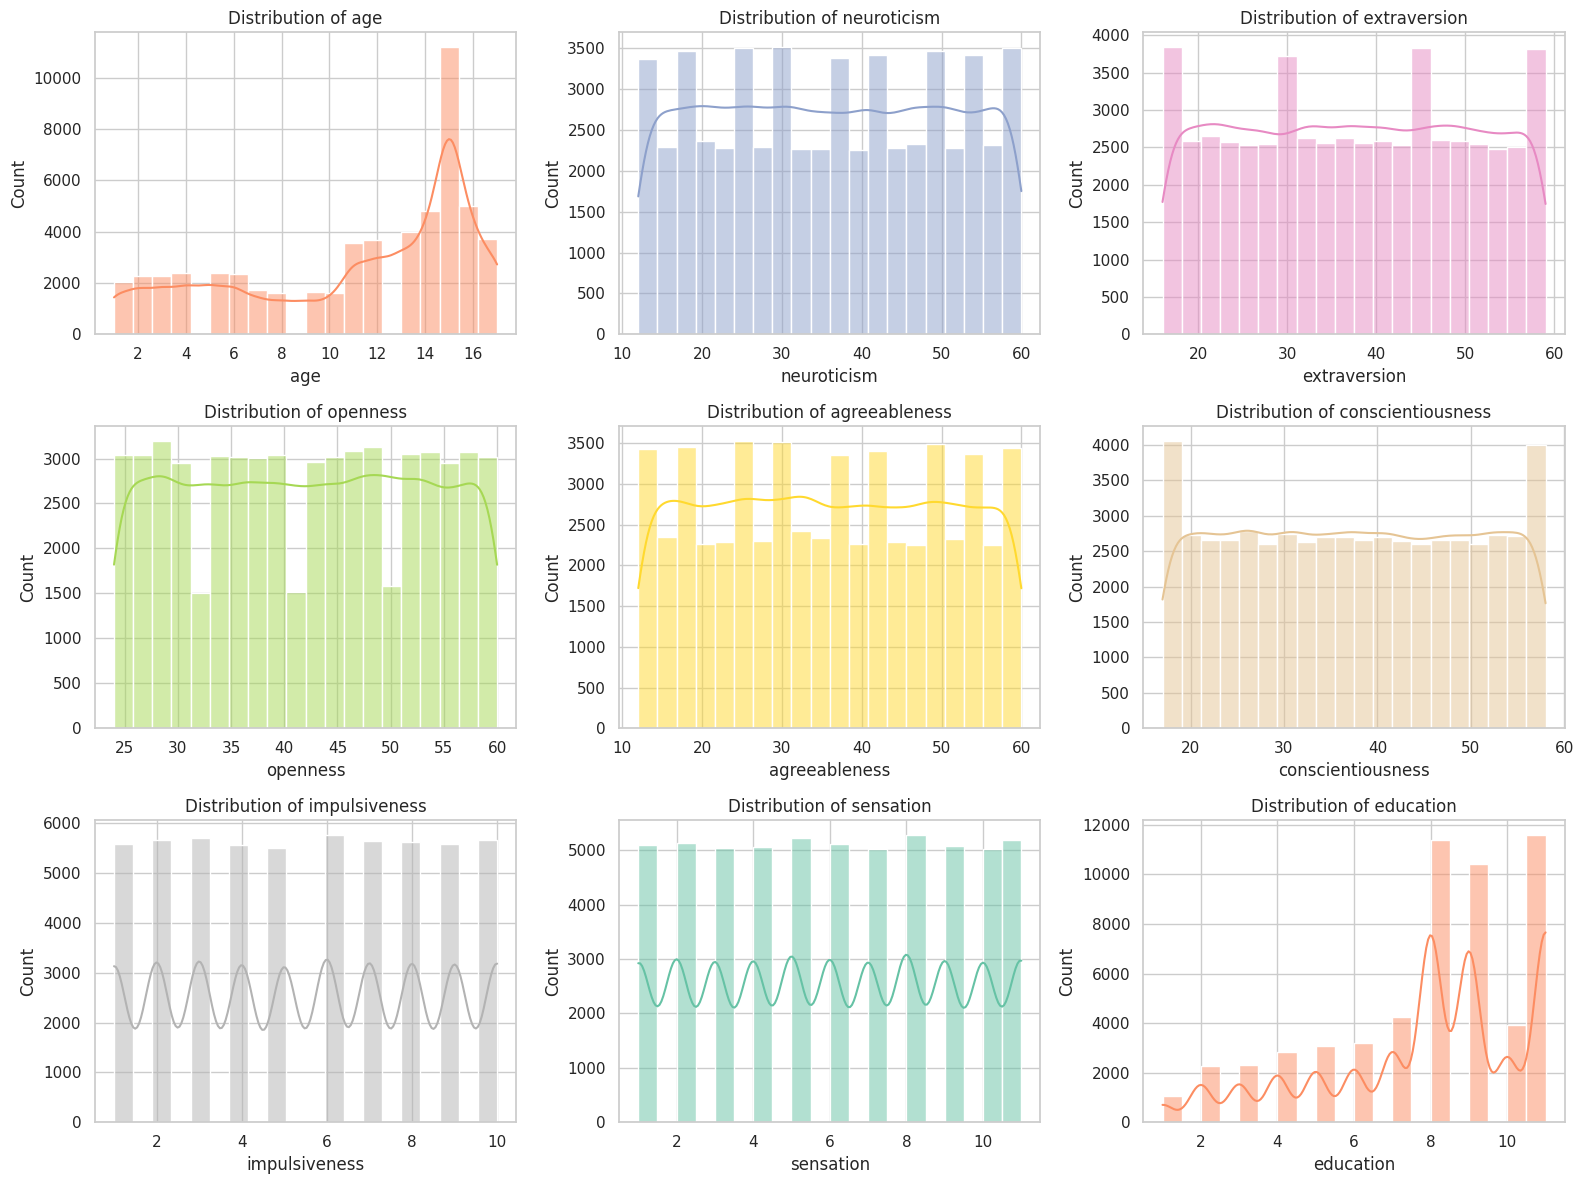

In [ ]:
#Draw the distribution of each numerical column.
plt.figure(figsize=(16,12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(data[col], kde=True, color=palette[i%len(palette)], bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Distribution of age
Most participants are around 16 years old, with fewer younger children, indicating a skewed distribution toward late teens.



Distribution of neuroticism
The scores are fairly evenly distributed between 10 and 60, with slight peaks at intervals, suggesting a broad range of emotional stability levels.




Distribution of extraversion
Extraversion is evenly spread out with some periodic spikes, indicating no dominant extraversion level in the sample.




Distribution of openness
Openness scores are relatively uniform, with a slight increase toward higher values, suggesting a generally open-minded sample.




Distribution of agreeableness
Agreeableness scores are widely distributed with regular peaks, indicating varying levels of cooperation and empathy.




Distribution of conscientiousness
The distribution is nearly flat with a spike at the highest value, suggesting many participants are very conscientious.




Distribution of impulsiveness
The data has periodic spikes, implying a patterned distribution of impulsiveness levels without clear dominance.




Distribution of sensation
Sensation-seeking behavior is evenly spread with periodic peaks, indicating a diverse range in sensation-seeking tendencies.




Distribution of education
The majority of individuals have higher education levels (around 9–10), suggesting a sample skewed toward more educated participants.

<ipython-input-10-6b823171bead>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax, palette='viridis')
<ipython-input-10-6b823171bead>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax, palette='viridis')
<ipython-input-10-6b823171bead>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax, palette='viridis')
<ipython-input-10-6b823171bead>:19: FutureWarning: 

Passing `palette`

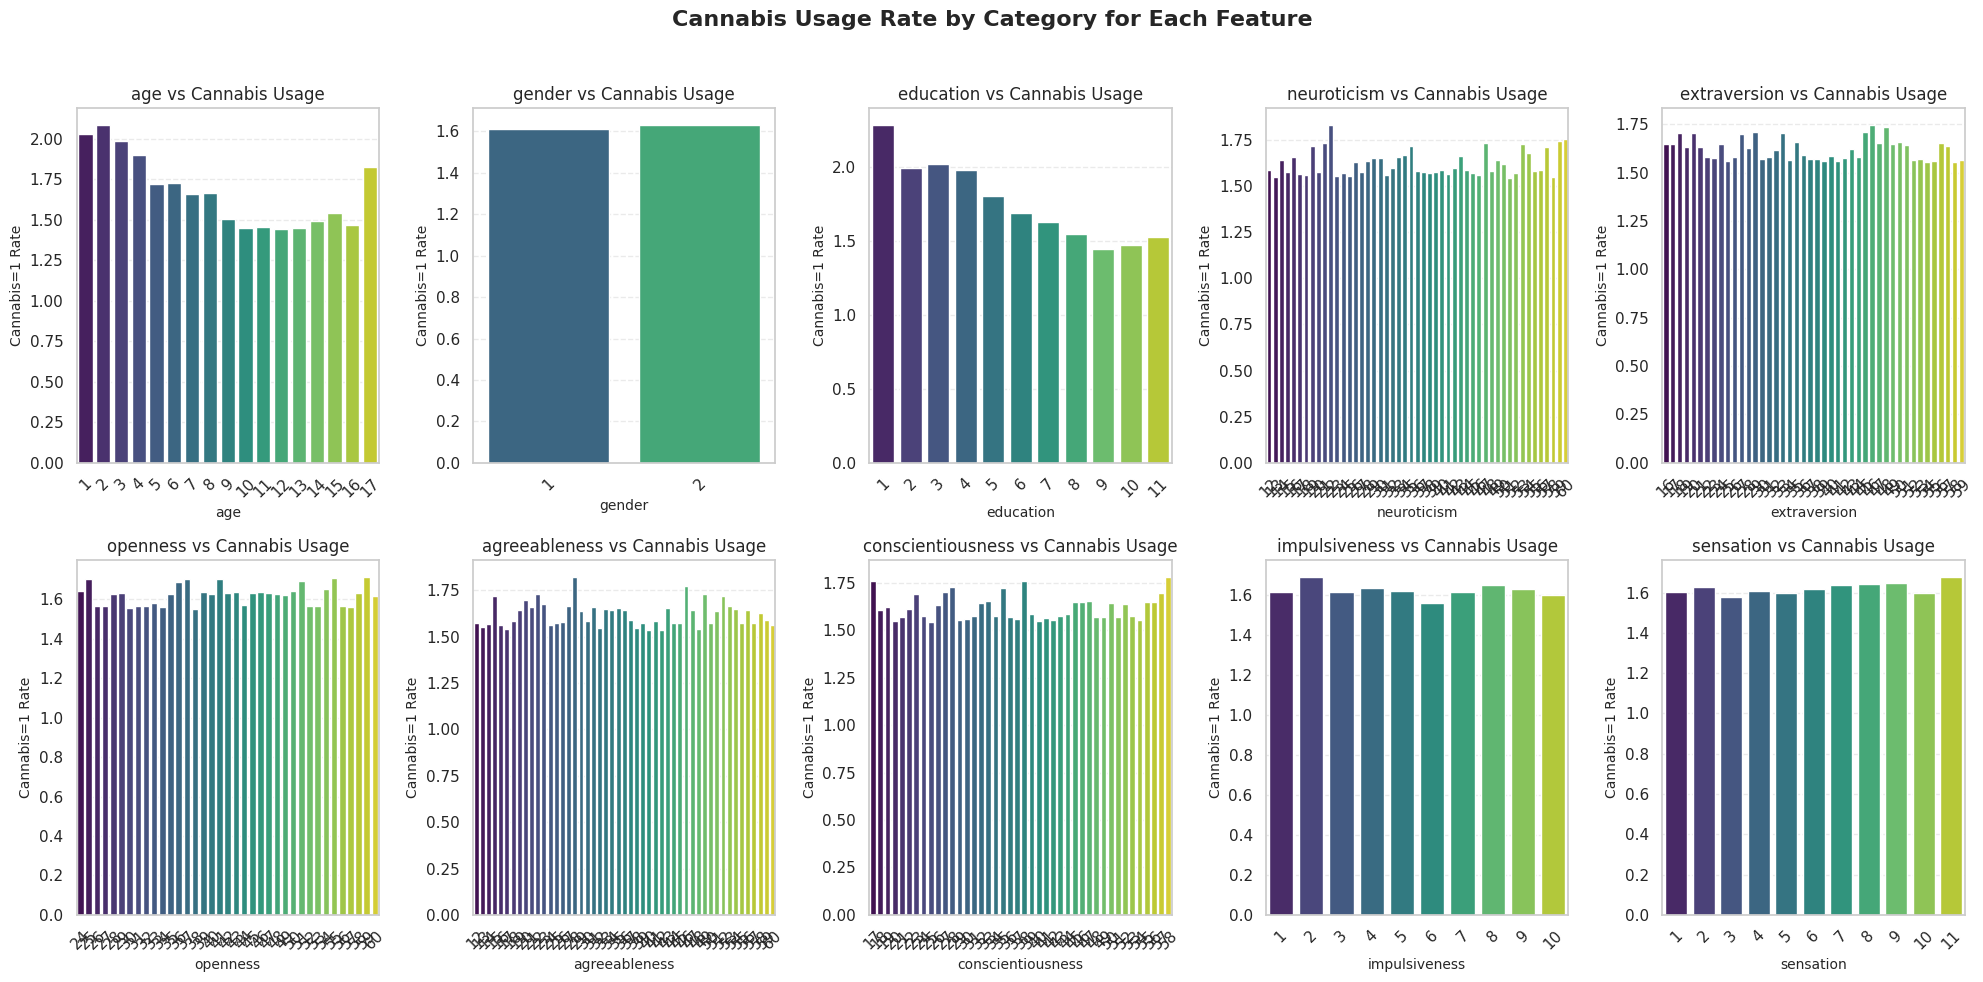

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Features to visualize
features = ['age', 'gender', 'education', 'neuroticism', 'extraversion',
            'openness', 'agreeableness', 'conscientiousness',
            'impulsiveness', 'sensation']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Loop through each feature and plot
for i, feature in enumerate(features):
    ax = axes[i]
    category_counts = data.groupby(feature)['cannabis'].mean().sort_index()

    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax, palette='viridis')
    ax.set_title(f"{feature} vs Cannabis Usage", fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel("Cannabis=1 Rate", fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

# Adjust layout
plt.suptitle("Cannabis Usage Rate by Category for Each Feature", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


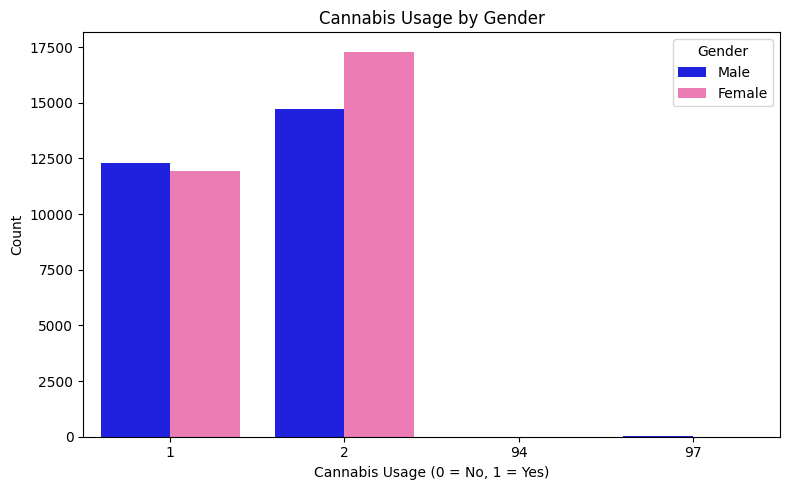

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = {1: 'blue', 2: 'hotpink'}

plt.figure(figsize=(8, 5))

ax = sns.countplot(
    x='cannabis',
    hue='gender',
    data=data,
    palette=palette
)

plt.xlabel('Cannabis Usage (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Cannabis Usage by Gender')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Male', 'Female'], title='Gender')

plt.tight_layout()
plt.show()



A slightly higher number of females than males reported not using cannabis (if label 2 corresponds to 0 = No).

Among cannabis users (1 = Yes), males and females are nearly equal, with a slight edge possibly toward males.

In [ ]:
print(data['gender'].unique())


[1 2]


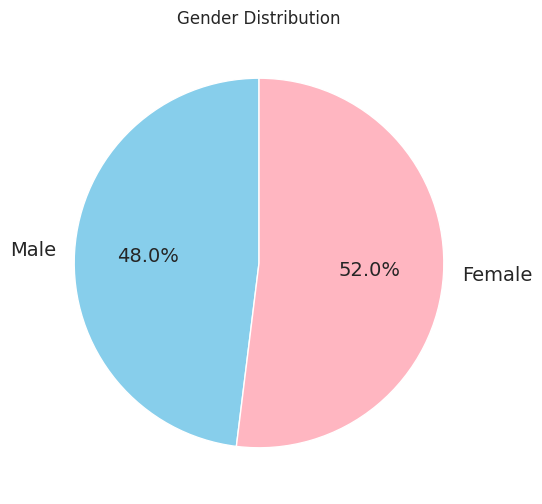

In [ ]:
import matplotlib.pyplot as plt


gender_counts = data['gender'].value_counts().sort_index()


labels = gender_counts.index.map({1: 'Male', 2: 'Female'})

colors = ['skyblue', 'lightpink']

plt.figure(figsize=(6,6))
plt.pie(
    gender_counts.values,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 14}
)

plt.title('Gender Distribution')
plt.show()


In [ ]:
print(data['gender'].unique())

[1 2]


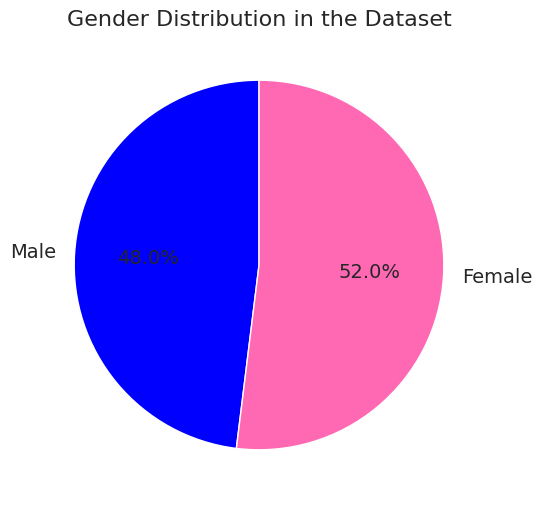

In [ ]:
"""#Gender Distribution in the Dataset
import matplotlib.pyplot as plt

data['gender_label'] = data['gender'].map({1: 'Male', 2: 'Female'})


gender_counts = data['gender_label'].value_counts()


gender_counts = gender_counts.reindex(['Male', 'Female'])


colors = ['blue', 'hotpink']

plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 14}
)

plt.title('Gender Distribution in the Dataset', fontsize=16)
plt.show()
"""


Gender Distribution in the Dataset
The dataset has a nearly balanced gender distribution, with 52% female and 48% male participants.

In [ ]:
print(data['gender'].unique())

[1 2]


In [ ]:
print(data['cannabis'].value_counts())

cannabis
2     32031
1     24214
97       16
94       15
Name: count, dtype: int64


In [ ]:
# Filter values ​​1 and 2 only
filtered_data = data[data['cannabis'].isin([1, 2])].copy()

# Convert 1 = Yes, 2 = No to 1 = Yes, 0 = No
filtered_data['cannabis'] = filtered_data['cannabis'].map({1: 1, 2: 0})

In [ ]:
print(data['gender'].unique())

[1 2]


<ipython-input-63-67e6e3482936>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cannabis', y=col, data=filtered_data, palette=palette, ci=None)
<ipython-input-63-67e6e3482936>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cannabis', y=col, data=filtered_data, palette=palette, ci=None)
<ipython-input-63-67e6e3482936>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cannabis', y=col, data=filtered_data, palette=palette, ci=None)
<ipython-input-63-67e6e3482936>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cannabis', y=col, data=filtered_data, palett

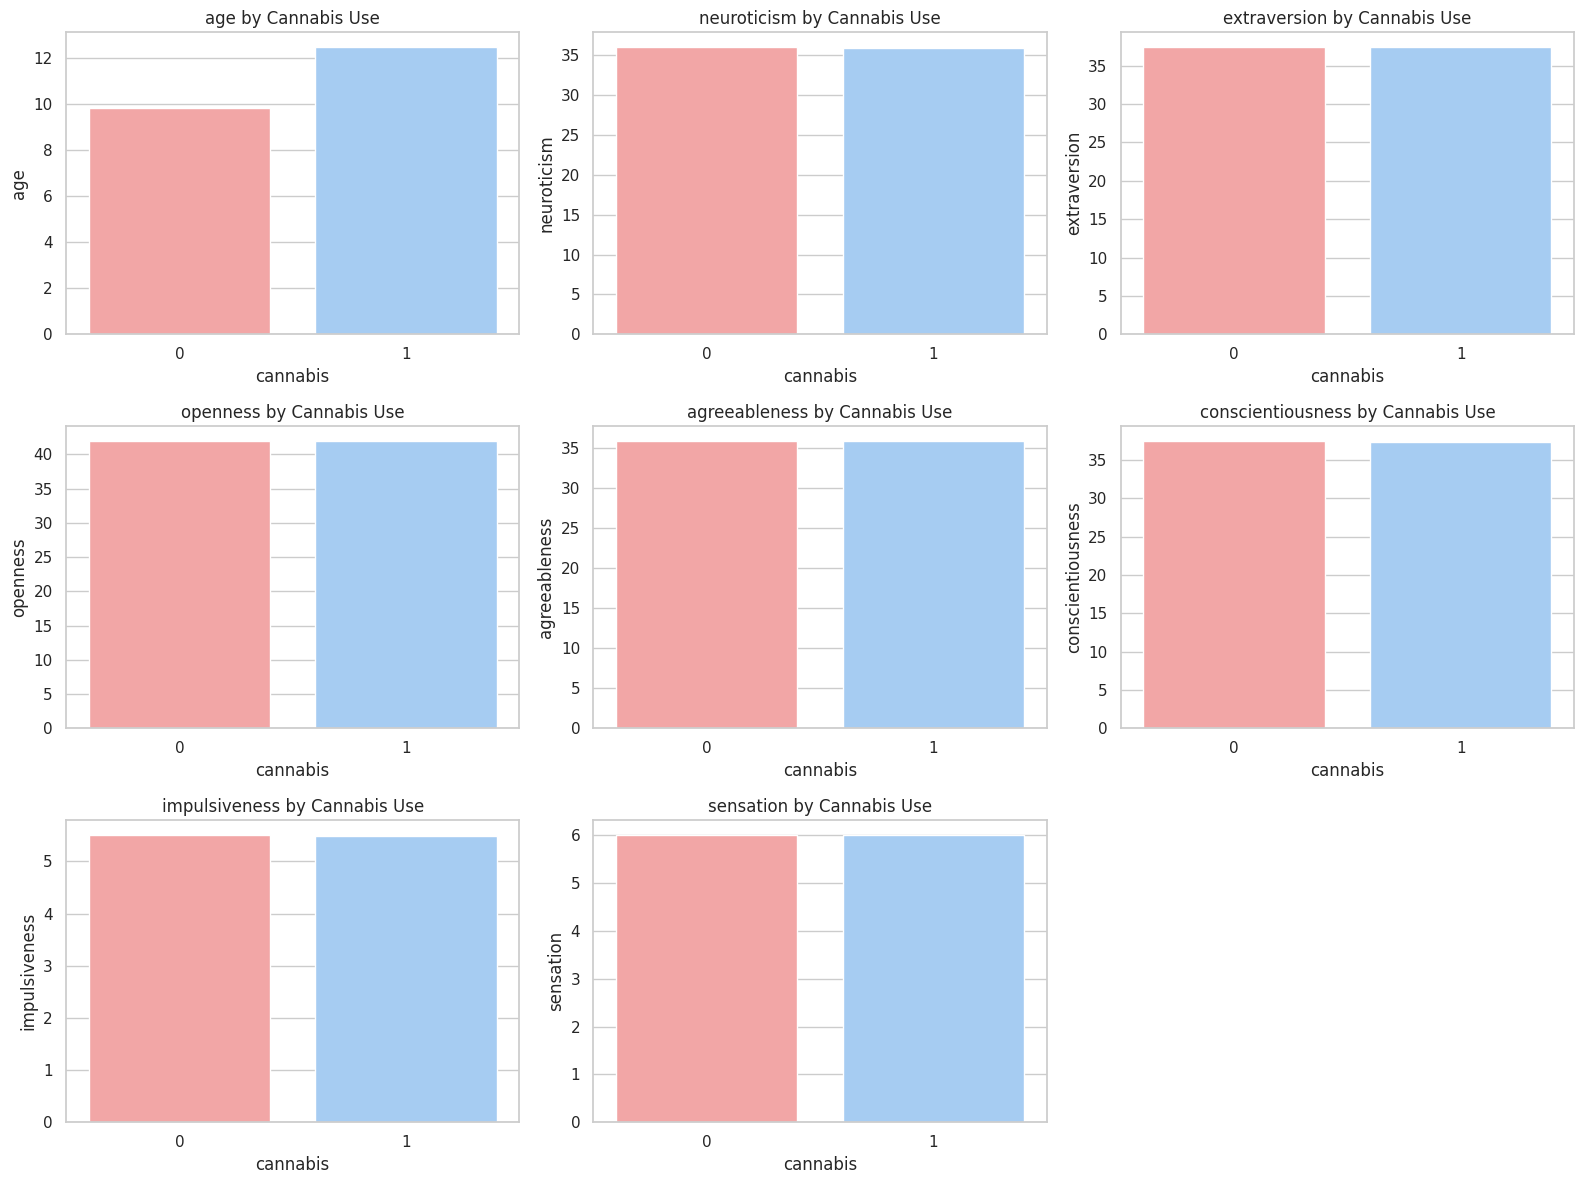

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns




palette = ['#FF9999', '#99CCFF']

plt.figure(figsize=(16,12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,3,i)
    sns.barplot(x='cannabis', y=col, data=filtered_data, palette=palette, ci=None)
    plt.title(f'{col} by Cannabis Use')
plt.tight_layout()
plt.show()


interpretation of each subplot in the image titled with "by Cannabis Use", where:

0 = Non-users

1 = Cannabis users





1. Age by Cannabis Use

Interpretation: Cannabis users tend to be slightly older on average than non-users.




2. Neuroticism by Cannabis Use

Interpretation: Neuroticism levels are similar between users and non-users, with a very small difference.




3. Extraversion by Cannabis Use

Interpretation: Cannabis users show slightly higher extraversion scores than non-users.




4. Openness by Cannabis Use

Interpretation: Users of cannabis score slightly higher in openness to experience, which is often linked to curiosity and creativity.




5. Agreeableness by Cannabis Use

Interpretation: Very minimal difference; both groups show similar levels of agreeableness.




6. Conscientiousness by Cannabis Use

Interpretation: Cannabis users may score a bit lower in conscientiousness compared to non-users, indicating slightly less organization or discipline.




7. Impulsiveness by Cannabis Use

Interpretation: Impulsiveness is nearly equal between both groups, with users possibly slightly more impulsive.




8. Sensation Seeking by Cannabis Use

Interpretation: Cannabis users exhibit marginally higher sensation-seeking behavior, consistent with risk-taking tendencies.




9. Education by Cannabis Use

Interpretation: Cannabis users appear to have a slightly higher education level compared to non-users.

In [ ]:
print(data['gender'].unique())

[1 2]


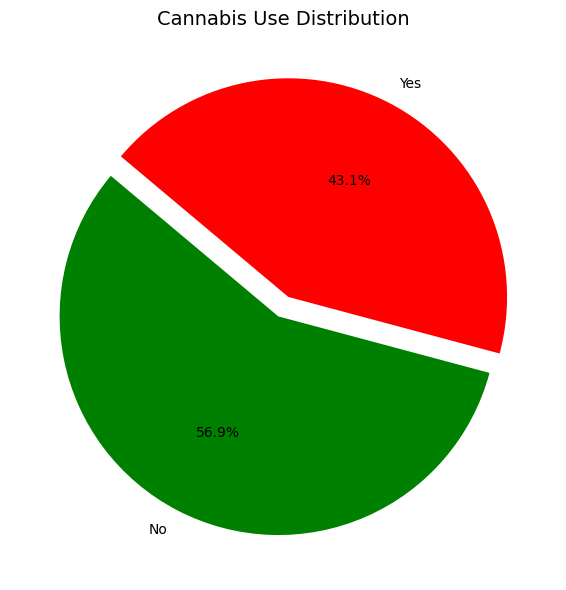

In [ ]:
#Cannabis Use Distribution
import matplotlib.pyplot as plt

# Make sure there are only 0 and 1 after the map.
counts = filtered_data['cannabis'].value_counts().sort_index()  # 0 = No, 1 = Yes
labels = ['No', 'Yes']
colors = ['green', 'red']  # 0 = No (green), 1 = Yes (red)
# Drawing the Bay Chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=[0.05, 0.05])
plt.title('Cannabis Use Distribution', fontsize=14)
plt.tight_layout()
plt.show()


This pie chart shows the Cannabis Use Distribution as a binary target variable:

43.1% of individuals reported "Yes" (they use cannabis).

56.9% reported "No" (they do not use cannabis).


Is there imbalance?

Yes, there is a slight imbalance in the target variable, but it is not severe. The classes are relatively close in proportion (roughly 57% vs. 43%), so most machine learning models can handle this without special treatment. However, if high accuracy is critical or if using models sensitive to class imbalance.

<Axes: >

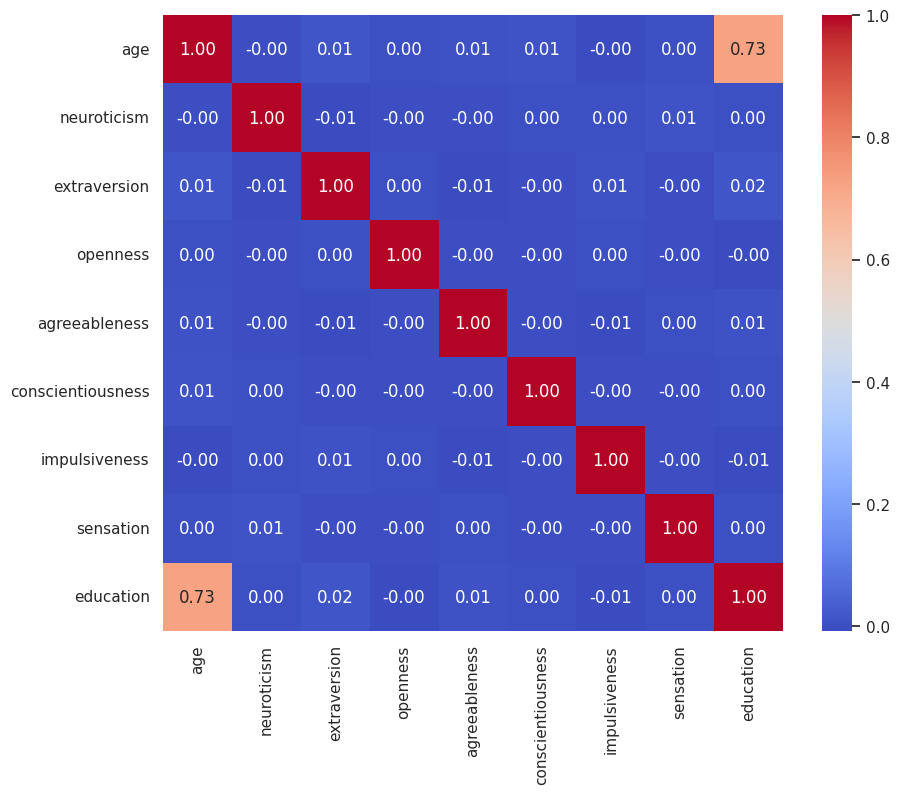

In [ ]:
#Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")


Correlation Matrix Interpretation & Multicollinearity Check

This heatmap shows pairwise Pearson correlations between numeric variables like age, education, personality traits, impulsiveness, and sensation.



Key Observations:

Strongest Correlation:

Age vs Education: r = 0.73 → strong positive correlation. As age increases, education level also tends to increase.


All other variables have very low correlations (mostly between -0.01 and 0.02). This means there's almost no linear relationship among them.




Multicollinearity Assessment:

Multicollinearity occurs when two or more independent variables are highly correlated (generally, |r| > 0.8 or 0.9).

Here, no pairs exceed that threshold — even age and education, the strongest pair, is at 0.73, which is moderate, not severe.

All other correlations are near zero, indicating independence among variables.



---

Conclusion:

No serious multicollinearity is present in this dataset.

You are safe to use these variables together in regression or modeling without needing dimensionality reduction or regularization for multicollinearity.

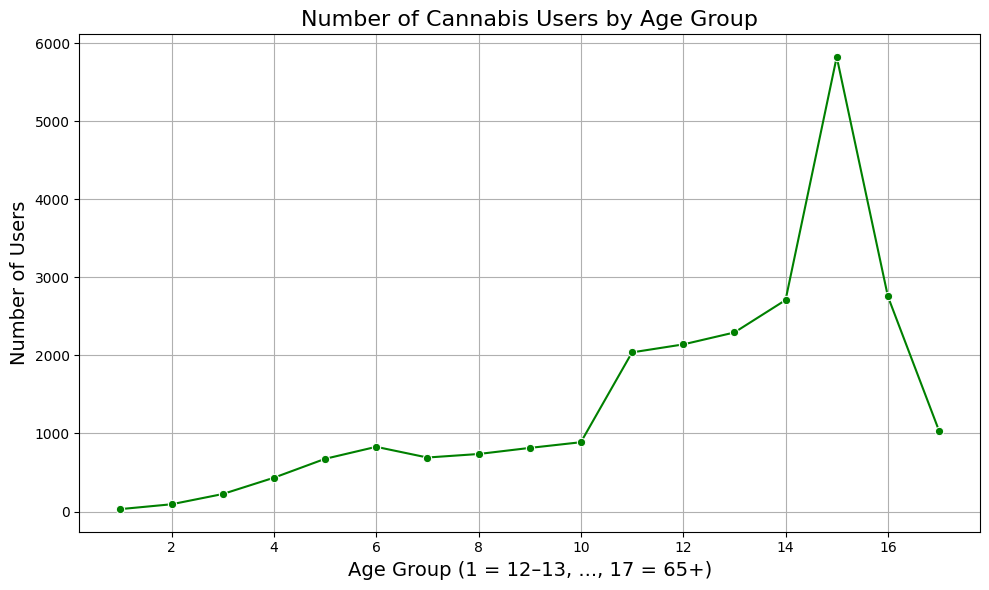

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


data_filtered = data[data['cannabis'] == 1]  # Only those who use

# Number of users in each age group
age_cannabis_count = data_filtered['age'].value_counts().sort_index().reset_index()
age_cannabis_count.columns = ['age', 'count']

#drawing the line
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_cannabis_count, x='age', y='count', marker='o', color='green')

plt.title('Number of Cannabis Users by Age Group', fontsize=16)
plt.xlabel('Age Group (1 = 12–13, ..., 17 = 65+)', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


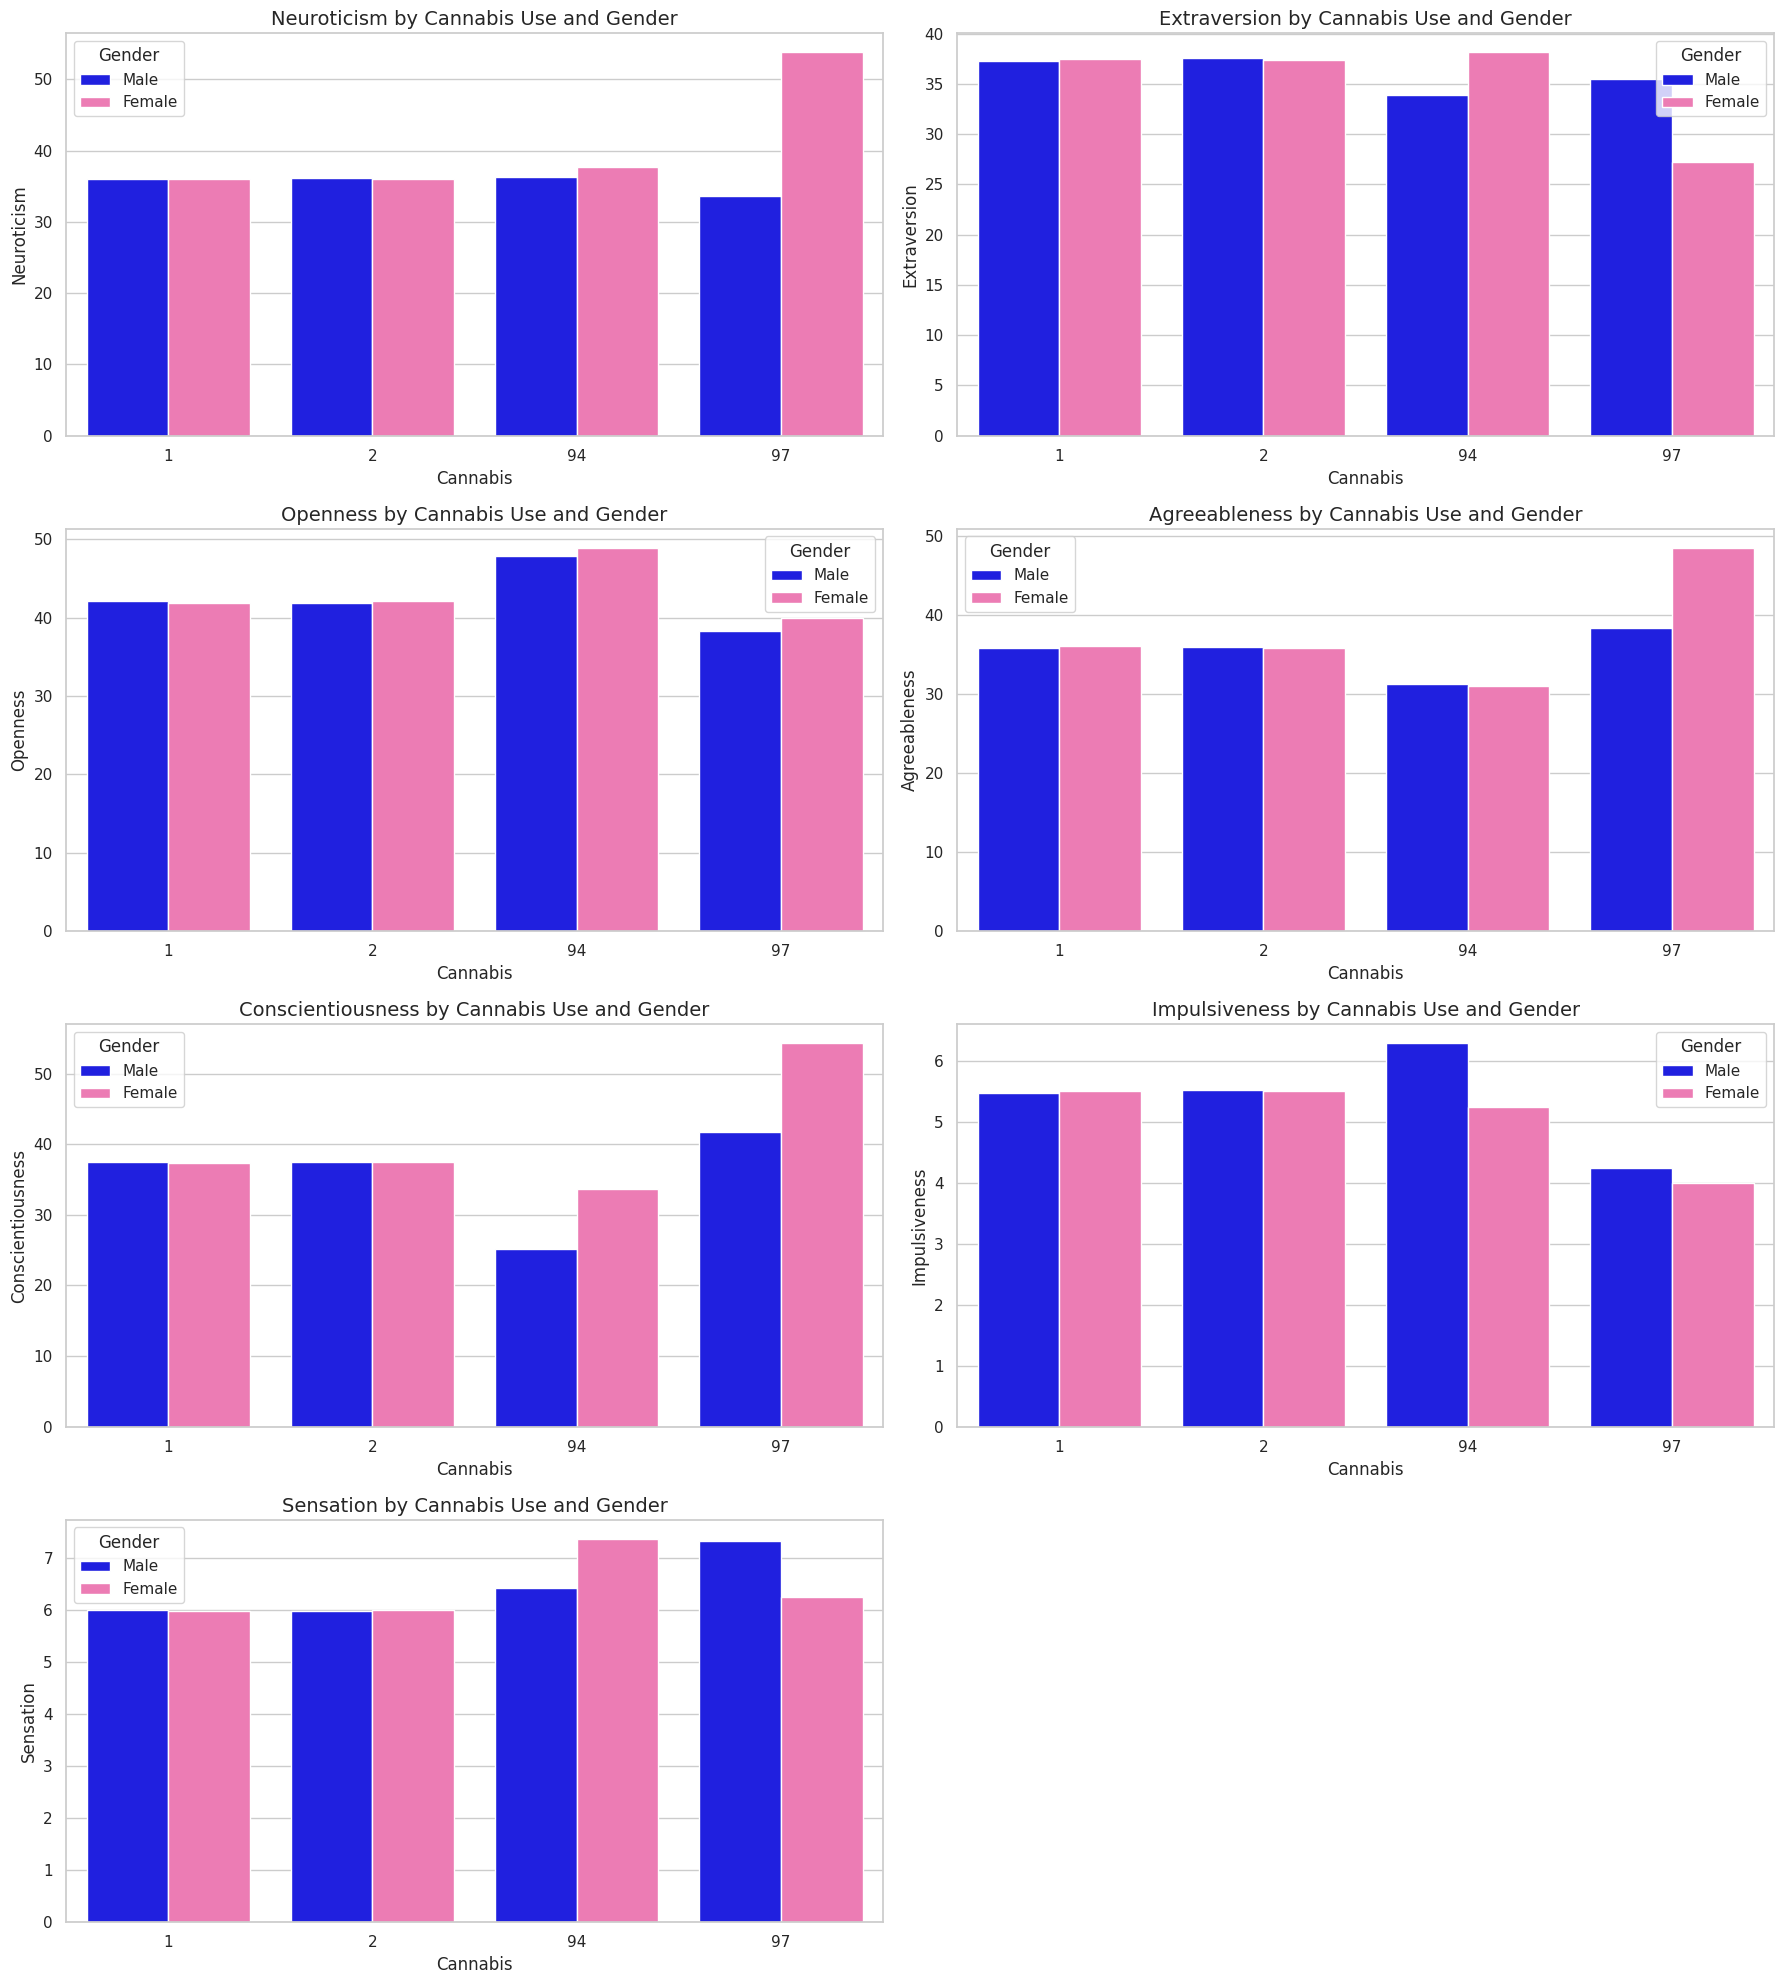

In [ ]:
#Barplot for each psychosocial variable by cannabis use and gender
import matplotlib.pyplot as plt
import seaborn as sns


psychological_vars = [
    'neuroticism', 'extraversion', 'openness',
    'agreeableness', 'conscientiousness',
    'impulsiveness', 'sensation'
]


gender_palette = {'Male': 'blue', 'Female': 'hotpink'}


plt.figure(figsize=(18, 20))
for i, col in enumerate(psychological_vars, 1):
    plt.subplot(4, 2, i)
    sns.barplot(
        x='cannabis',
        y=col,
        hue='gender_label',
        data=data,
        palette=gender_palette,
        errorbar=None
    )
    plt.title(f'{col.capitalize()} by Cannabis Use and Gender', fontsize=14)
    plt.xlabel('Cannabis')
    plt.ylabel(col.capitalize())
    plt.legend(title='Gender')

plt.tight_layout()
plt.show()


interpretation of each chart based on cannabis use and gender:

1. Neuroticism by Cannabis Use and Gender
Interpretation: Females show higher neuroticism than males across all levels of cannabis use. Neuroticism increases noticeably for both genders at the highest level of cannabis use (97).


2. Extraversion by Cannabis Use and Gender
Interpretation: Extraversion is relatively stable across cannabis use levels for both genders. However, females consistently score slightly higher than males, except at level 97, where female scores drop.


3. Openness by Cannabis Use and Gender
Interpretation: Openness increases with cannabis use up to level 94 for both genders, then decreases at level 97. Males generally have slightly higher openness than females.


4. Agreeableness by Cannabis Use and Gender
Interpretation: Agreeableness slightly decreases with higher cannabis use. Females tend to be more agreeable than males, especially at the highest level (97).


5. Conscientiousness by Cannabis Use and Gender
Interpretation: Conscientiousness decreases with increasing cannabis use up to level 94, then sharply increases at level 97, particularly for females.


6. Impulsiveness by Cannabis Use and Gender
Interpretation: Impulsiveness peaks at cannabis use level 94, especially for males. It is lowest at level 97, with females showing less impulsiveness than males overall.


7. Sensation by Cannabis Use and Gender
Interpretation: Sensation seeking increases with cannabis use up to level 94, then slightly decreases at level 97. Males show higher sensation-seeking behavior than females at the higher levels.

In [ ]:
print(data['gender'].unique())

[1 2]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

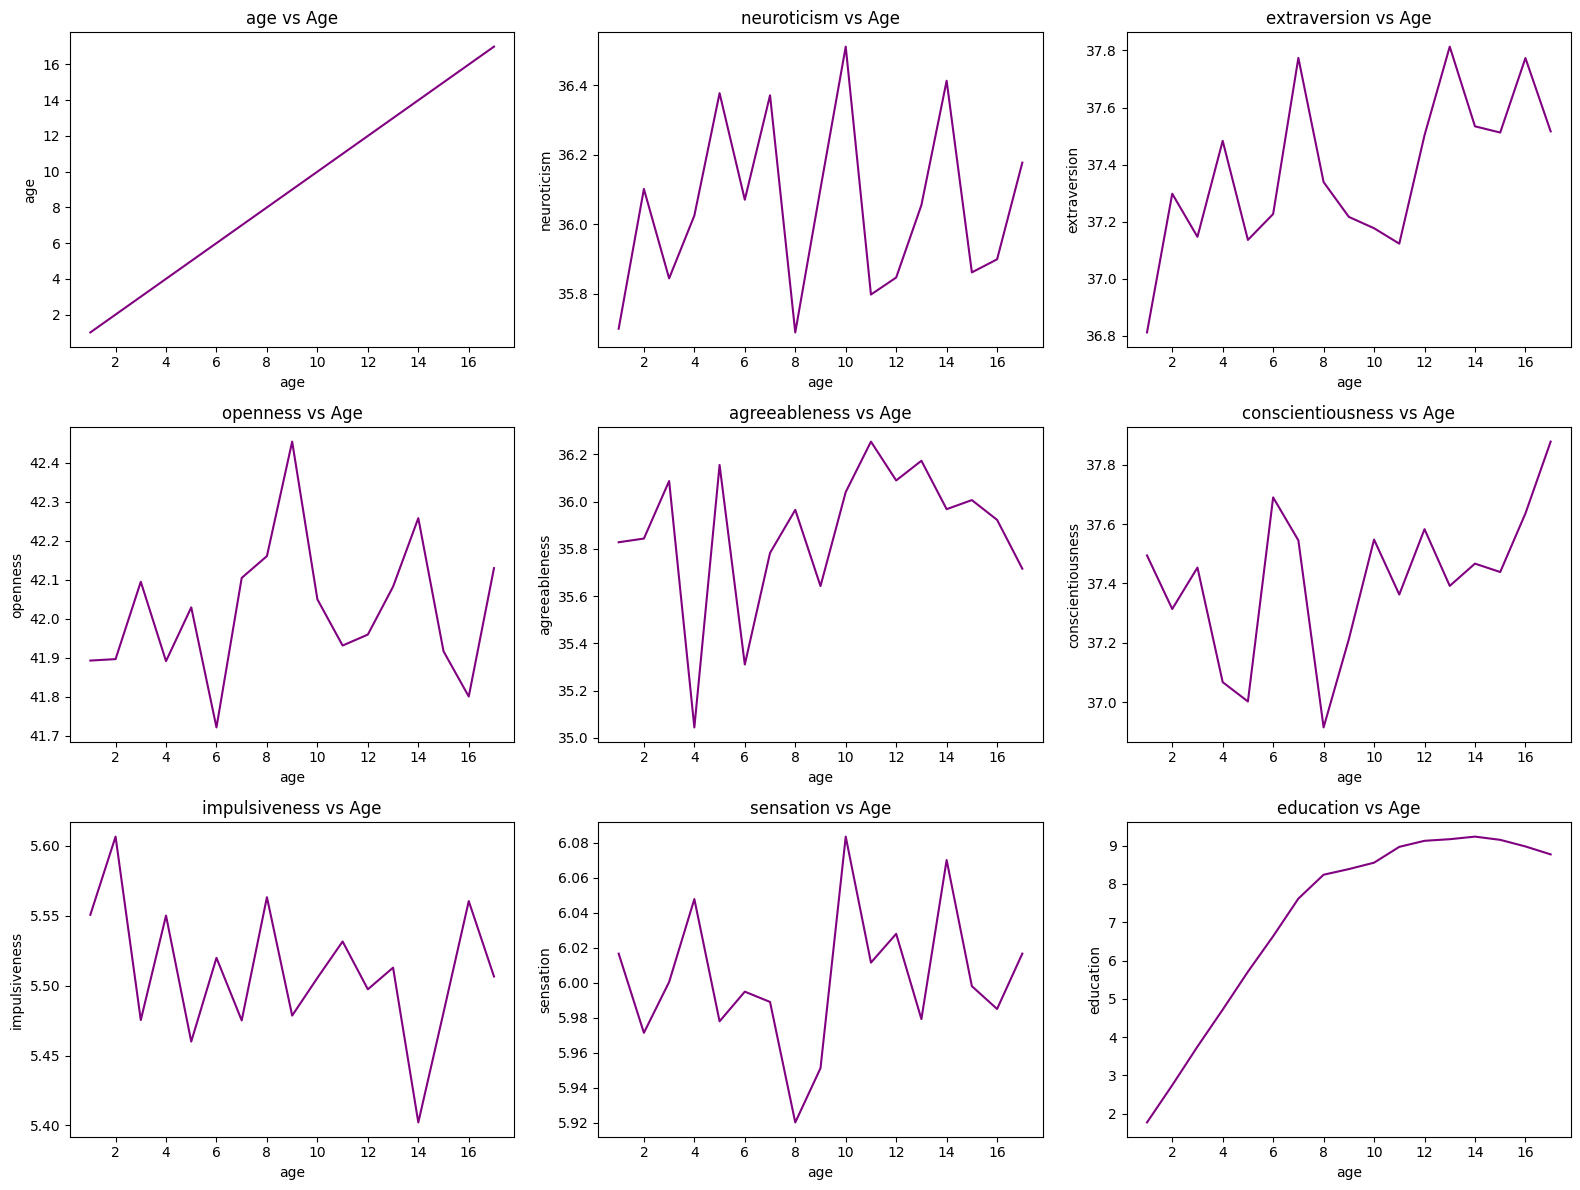

In [ ]:
#Numeric features change with age.
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.lineplot(x='age', y=col, data=data, color='purple', errorbar=None)
    plt.title(f'{col} vs Age')
plt.tight_layout()
plt.show()


interpretation of each subplot in the second image (personality traits vs. age):

1. age vs Age
Interpretation: A perfectly linear relationship; the x-axis and y-axis are identical.


2. neuroticism vs Age
Interpretation: Neuroticism fluctuates with age, showing no clear increasing or decreasing trend.


3. extraversion vs Age
Interpretation: Extraversion slightly increases with age, though with small fluctuations.


4. openness vs Age
Interpretation: Openness remains relatively stable with minor variations across ages.


5. agreeableness vs Age
Interpretation: Agreeableness fluctuates across age but shows a slight upward tendency over time.


6. conscientiousness vs Age
Interpretation: Conscientiousness shows small fluctuations but slightly increases with age, peaking at the oldest age.


7. impulsiveness vs Age
Interpretation: Impulsiveness shows a very mild downward trend as age increases, with small fluctuations.


8. sensation vs Age
Interpretation: Sensation seeking remains fairly consistent across ages with minor variation.


9. education vs Age
Interpretation: Education level increases with age up to a point, then plateaus and slightly decreases at the oldest age.

# **Data processing**

In [ ]:
print(data['cannabis'].value_counts())

cannabis
2     32031
1     24214
97       16
94       15
Name: count, dtype: int64


**Data Cleaning**

**# Note:**

Rows with cannabis values 94 (Unknown) and 97 (Refused to answer) were removed from the dataset to ensure the target variable is clean and contains only clear, meaningful labels (1 for users and 2 for non-users). This step helps improve the accuracy and reliability of the modeling process by eliminating ambiguous responses.

In [ ]:
data = data[~data['cannabis'].isin([94, 97])]


In [ ]:
print(data['cannabis'].value_counts())


cannabis
2    32031
1    24214
Name: count, dtype: int64


## **MinMaxScaler & over sampling **

Pipeline Data Processing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
import pickle

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data["cannabis"], random_state=42)



X_train = train_data.drop(columns=['cannabis'])
y_train = train_data['cannabis']



X_test = test_data.drop(columns=['cannabis'])

y_test = test_data['cannabis']
# Convert all target values ​​to 0 and 1
y_train = y_train.replace({1: 0, 2: 1})
y_test = y_test.replace({1: 0, 2: 1})
# Define the numeric columns we will process.
numeric_cols = ['age', 'neuroticism', 'extraversion', 'openness', 'agreeableness','gender','education',
                'conscientiousness', 'impulsiveness', 'sensation']


Number of outliers in training data:
age: 0
neuroticism: 0
extraversion: 0
openness: 0
agreeableness: 0
gender: 0
education: 0
conscientiousness: 0
impulsiveness: 0
sensation: 0


Text(0.5, 1.0, 'Boxplot of Numeric Features Before Processing (Training Data)')

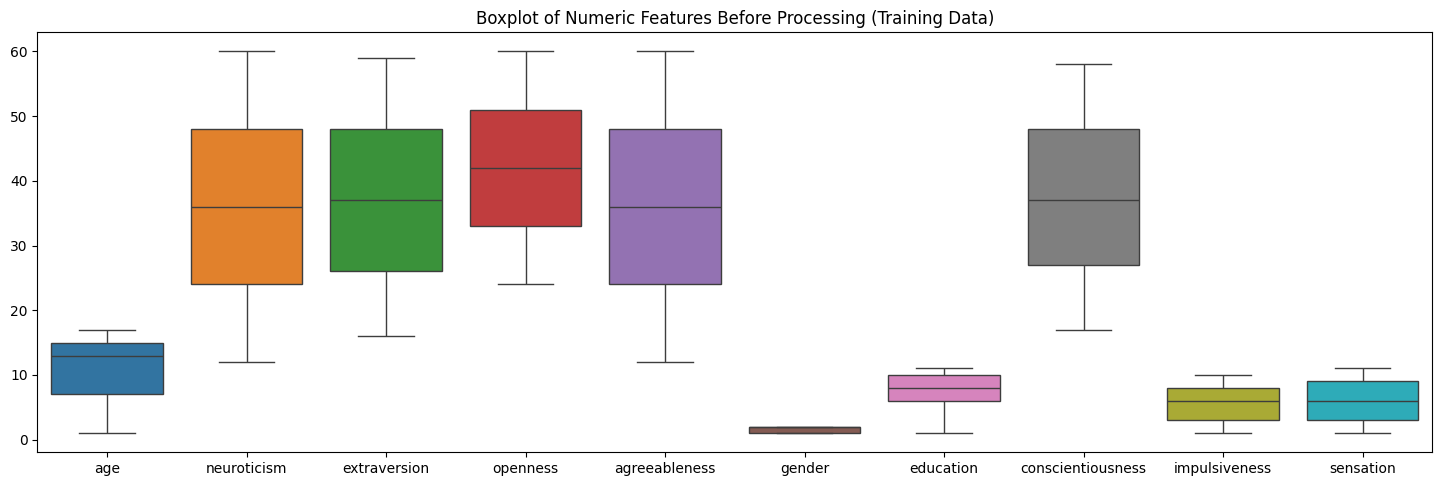

In [ ]:
#Check for outliers values ​​and address them if found.
def count_outliers(df, columns, factor=1.5):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]
    return outlier_counts

outliers_count = count_outliers(train_data, numeric_cols)
print("Number of outliers in training data:")
for col, count in outliers_count.items():
    print(f"{col}: {count}")


plt.figure(figsize=(18, 12))

plt.subplot(2,1,1)
sns.boxplot(data=train_data[numeric_cols])
plt.title("Boxplot of Numeric Features Before Processing (Training Data)")

**We do not have any outliers.**

In [ ]:
#Data scaling
from sklearn.base import BaseEstimator, TransformerMixin

import pickle

from sklearn.base import BaseEstimator, TransformerMixin

class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor

    def fit(self, X, y=None):
        Q1 = X.quantile(0.25)
        Q3 = X.quantile(0.75)
        IQR = Q3 - Q1
        self.lower_bounds_ = Q1 - self.factor * IQR
        self.upper_bounds_ = Q3 + self.factor * IQR
        return self

    def transform(self, X):
        X_c = X.copy()
        for col in X.columns:
            X_c[col] = X_c[col].clip(self.lower_bounds_[col], self.upper_bounds_[col])
        return X_c

In [ ]:
#Create a pipeline
pipeline = Pipeline([
    ('winsorizer', Winsorizer(factor=1.5)),
    ('scaler', MinMaxScaler())
])
pipeline.fit(X_train[numeric_cols])
with open("pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("Pipeline saved successfully.")

Pipeline saved successfully.


In [ ]:
X_train_processed = X_train.copy()
X_train_processed[numeric_cols] = pipeline.transform(X_train[numeric_cols])

X_test_processed = X_test.copy()
X_test_processed[numeric_cols] = pipeline.transform(X_test[numeric_cols])


Before SMOTE:
cannabis
1    25625
0    19371
Name: count, dtype: int64

After SMOTE:
cannabis
0    25625
1    25625
Name: count, dtype: int64


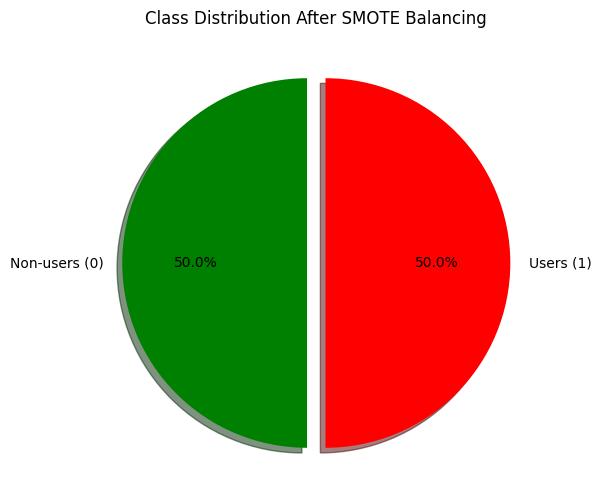

In [ ]:
# Apply SMOTE to preprocessed training data only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)

# Make sure to distribute after SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Illustration of the distribution of classes after SMOTE
plt.figure(figsize=(6,6))
colors = ['green', 'red']
labels = ['Non-users (0)', 'Users (1)']

plt.pie(
    pd.Series(y_resampled).value_counts().sort_index(),
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.05, 0.05),
    shadow=True
)
plt.title('Class Distribution After SMOTE Balancing')
plt.show()

Modeling

**Experiment(1)**

Using all features :
['age', 'neuroticism', 'extraversion', 'openness', 'agreeableness',
                'conscientiousness', 'impulsiveness', 'sensation']

In [ ]:
print(y_train.unique())
print(y_test.unique())


[0 1]
[1 0]


 LogisticRegression

===== Training Metrics =====
Accuracy: 0.6271
Precision: 0.6613
Recall: 0.5212
F1 Score: 0.5829

===== Testing Metrics =====
Accuracy: 0.6156
Precision: 0.7226
Recall: 0.5275
F1 Score: 0.6098


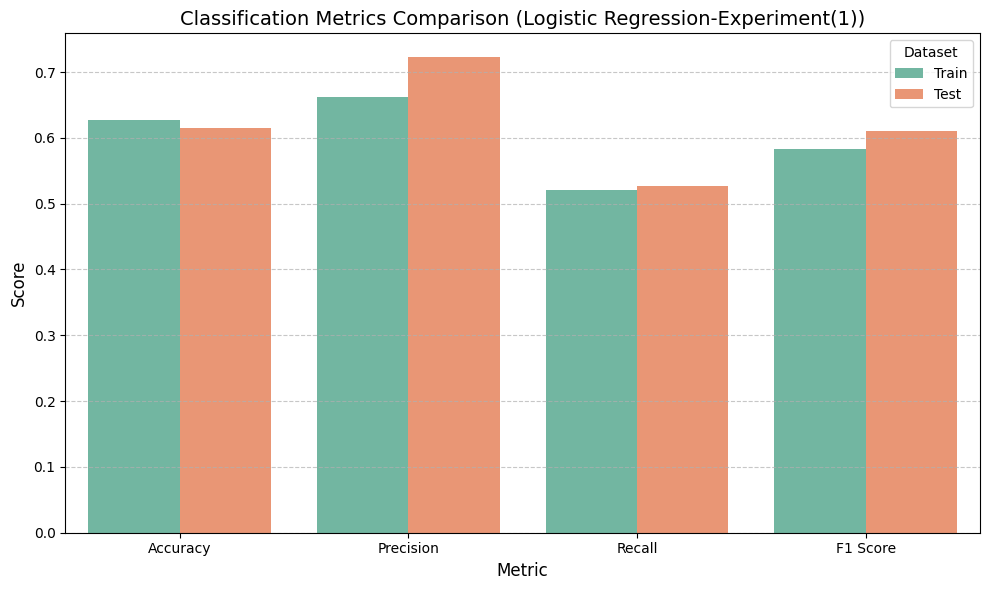

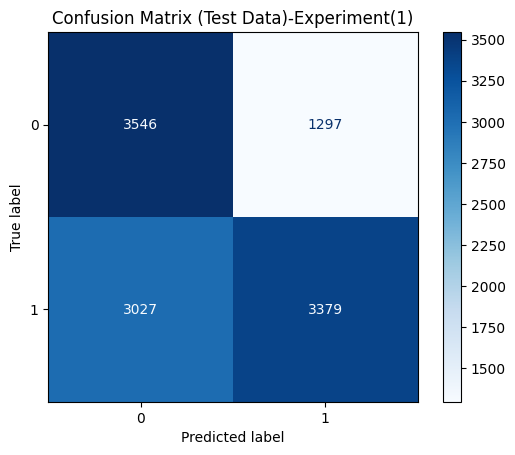

===== Classification Report (LOGISTIC) =====
              precision    recall  f1-score   support

           0       0.54      0.73      0.62      4843
           1       0.72      0.53      0.61      6406

    accuracy                           0.62     11249
   macro avg       0.63      0.63      0.62     11249
weighted avg       0.64      0.62      0.61     11249



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_resampled, y_resampled)

y_train_pred =model.predict(X_resampled)
y_test_pred =model.predict(X_test_processed)

def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1

train_acc, train_prec, train_rec, train_f1 =classification_metrics(y_resampled, y_train_pred)
test_acc, test_prec, test_rec, test_f1 = classification_metrics(y_test, y_test_pred)

print("===== Training Metrics =====")
print(f"Accuracy: {train_acc:.4f}")
print(f"Precision: {train_prec:.4f}")
print(f"Recall: {train_rec:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\n===== Testing Metrics =====")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall: {test_rec:.4f}")
print(f"F1 Score: {test_f1:.4f}")

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc, train_prec, train_rec, train_f1],
    "Test": [test_acc, test_prec, test_rec, test_f1]
})

metrics_df_melted = metrics_df.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (Logistic Regression-Experiment(1))", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()


cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Data)-Experiment(1)")
plt.show()

from sklearn.metrics import classification_report

print("===== Classification Report (LOGISTIC) =====")
print(classification_report(y_test, y_test_pred))

 Decision Tree

===== Decision Tree Training Metrics =====
Accuracy: 0.6271
Precision: 0.6613
Recall: 0.5212
F1 Score: 0.5829

===== Decision Tree Testing Metrics =====
Accuracy: 0.5769
Precision: 0.6298
Recall: 0.6238
F1 Score: 0.6268


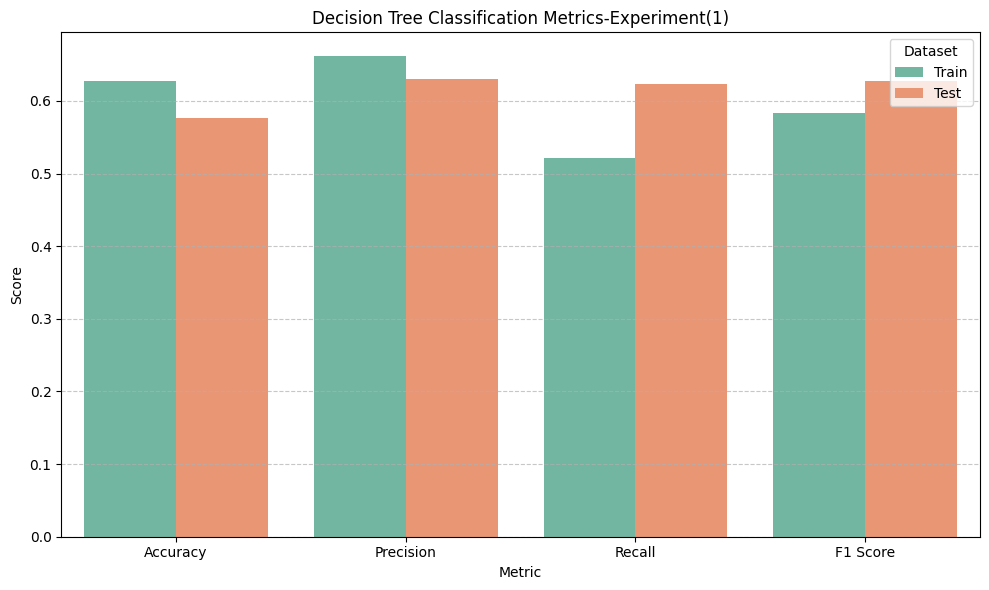

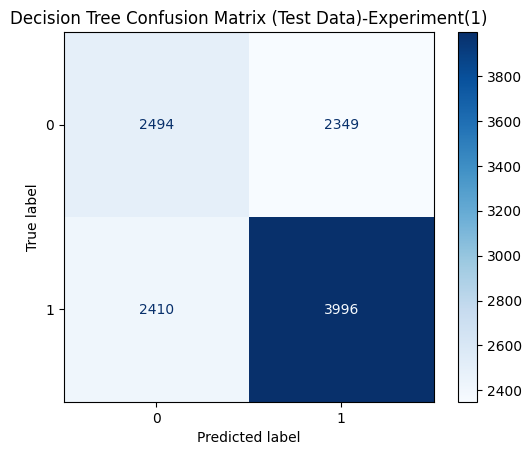

===== Classification Report (DT) =====
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      4843
           1       0.63      0.62      0.63      6406

    accuracy                           0.58     11249
   macro avg       0.57      0.57      0.57     11249
weighted avg       0.58      0.58      0.58     11249



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_resampled, y_resampled)

y_train_pred_dt = model.predict(X_resampled)
y_test_pred_dt = model_dt.predict(X_test_processed)

def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1

train_acc_dt, train_prec_dt, train_rec_dt, train_f1_dt =classification_metrics(y_resampled, y_train_pred_dt)
test_acc_dt, test_prec_dt, test_rec_dt, test_f1_dt = classification_metrics(y_test, y_test_pred_dt)

print("===== Decision Tree Training Metrics =====")
print(f"Accuracy: {train_acc_dt:.4f}")
print(f"Precision: {train_prec_dt:.4f}")
print(f"Recall: {train_rec_dt:.4f}")
print(f"F1 Score: {train_f1_dt:.4f}")

print("\n===== Decision Tree Testing Metrics =====")
print(f"Accuracy: {test_acc_dt:.4f}")
print(f"Precision: {test_prec_dt:.4f}")
print(f"Recall: {test_rec_dt:.4f}")
print(f"F1 Score: {test_f1_dt:.4f}")

metrics_dt = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_dt, train_prec_dt, train_rec_dt, train_f1_dt],
    "Test": [test_acc_dt, test_prec_dt, test_rec_dt, test_f1_dt]
})

metrics_dt_melted = metrics_dt.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_dt_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Decision Tree Classification Metrics-Experiment(1)")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

cm_dt = confusion_matrix(y_test, y_test_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=model_dt.classes_)
disp_dt.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Test Data)-Experiment(1)")
plt.show()

print("===== Classification Report (DT) =====")
print(classification_report(y_test, y_test_pred_dt))

Random Forest

===== Random Forest Training Metrics =====
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

===== Random Forest Testing Metrics =====
Accuracy: 0.6253
Precision: 0.6966
Recall: 0.6060
F1 Score: 0.6481


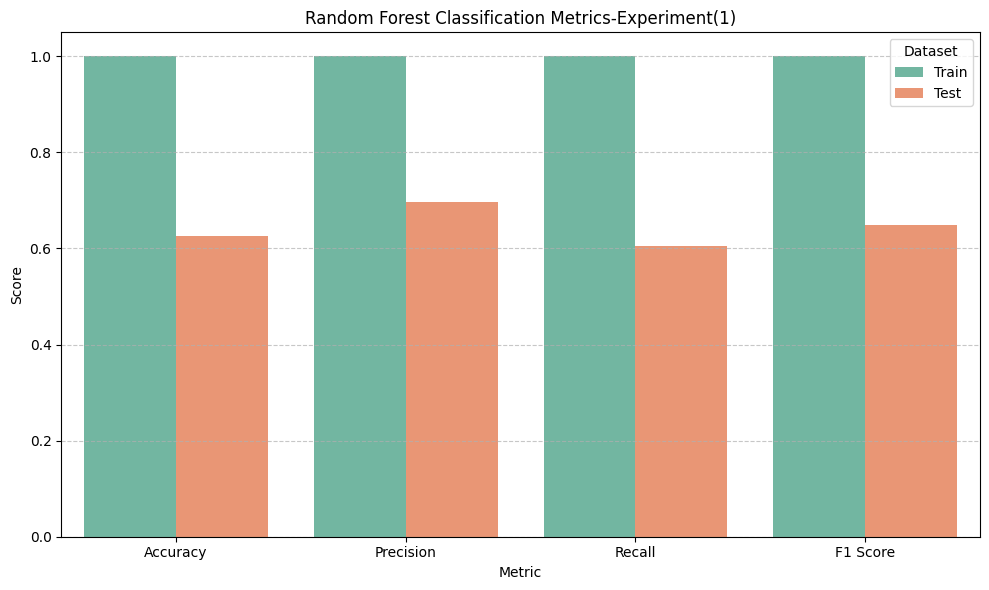

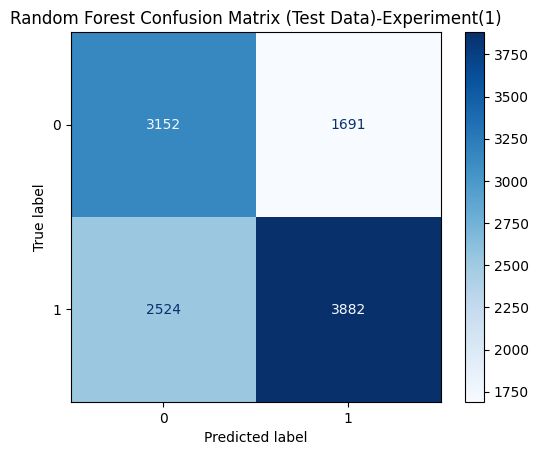

===== Classification Report (RF) =====
              precision    recall  f1-score   support

           0       0.56      0.65      0.60      4843
           1       0.70      0.61      0.65      6406

    accuracy                           0.63     11249
   macro avg       0.63      0.63      0.62     11249
weighted avg       0.64      0.63      0.63     11249



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_resampled, y_resampled)

y_train_pred_rf = model_rf.predict(X_resampled)
y_test_pred_rf = model_rf.predict(X_test_processed)

def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1

train_acc_rf, train_prec_rf, train_rec_rf, train_f1_rf = classification_metrics(y_resampled, y_train_pred_rf)
test_acc_rf, test_prec_rf, test_rec_rf, test_f1_rf = classification_metrics(y_test, y_test_pred_rf)

print("===== Random Forest Training Metrics =====")
print(f"Accuracy: {train_acc_rf:.4f}")
print(f"Precision: {train_prec_rf:.4f}")
print(f"Recall: {train_rec_rf:.4f}")
print(f"F1 Score: {train_f1_rf:.4f}")

print("\n===== Random Forest Testing Metrics =====")
print(f"Accuracy: {test_acc_rf:.4f}")
print(f"Precision: {test_prec_rf:.4f}")
print(f"Recall: {test_rec_rf:.4f}")
print(f"F1 Score: {test_f1_rf:.4f}")

metrics_rf = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_rf, train_prec_rf, train_rec_rf, train_f1_rf],
    "Test": [test_acc_rf, test_prec_rf, test_rec_rf, test_f1_rf]
})

metrics_rf_melted = metrics_rf.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_rf_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Random Forest Classification Metrics-Experiment(1)")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

cm_rf = confusion_matrix(y_test, y_test_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model_rf.classes_)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix (Test Data)-Experiment(1)")
plt.show()
print("===== Classification Report (RF) =====")
print(classification_report(y_test, y_test_pred_rf))

Gradient Boosting

===== Gradient Boosting Training Metrics =====
Accuracy: 0.6796
Precision: 0.7536
Recall: 0.5336
F1 Score: 0.6248

===== Gradient Boosting Testing Metrics =====
Accuracy: 0.6456
Precision: 0.7696
Recall: 0.5390
F1 Score: 0.6340


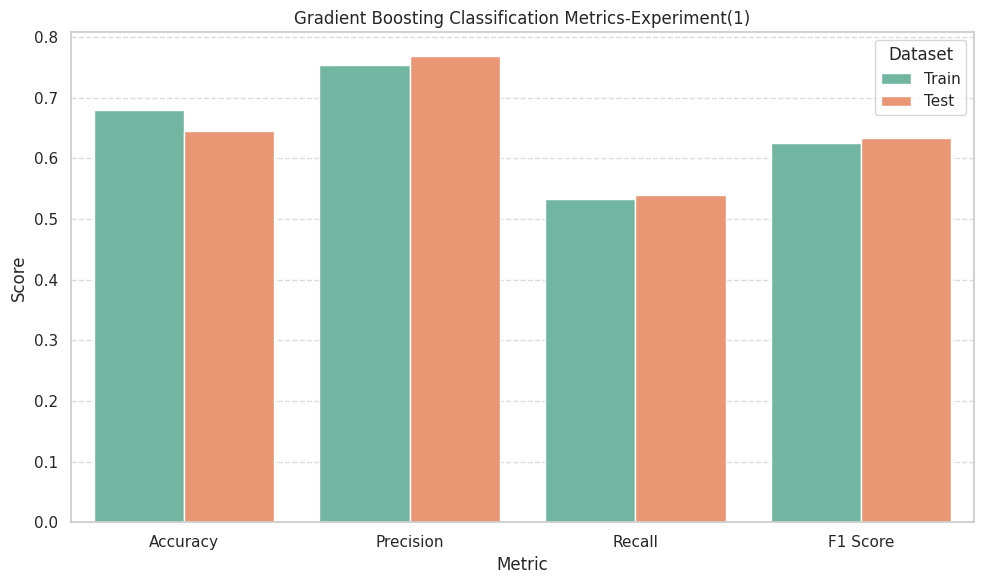

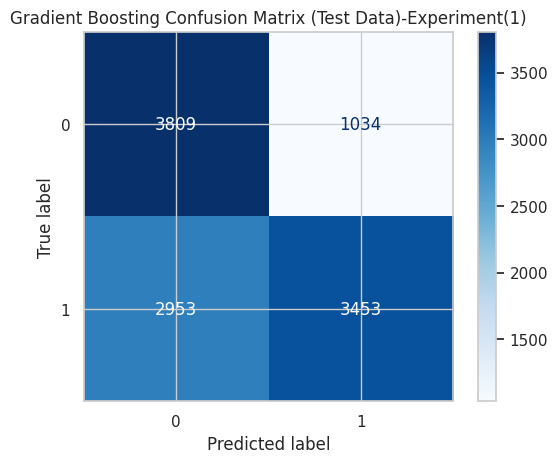

===== Classification Report (GRADIENT BOOSTING) =====
              precision    recall  f1-score   support

           0       0.56      0.79      0.66      4843
           1       0.77      0.54      0.63      6406

    accuracy                           0.65     11249
   macro avg       0.67      0.66      0.65     11249
weighted avg       0.68      0.65      0.64     11249



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_resampled, y_resampled)

y_train_pred_gb = model_gb.predict(X_resampled)
y_test_pred_gb = model_gb.predict(X_test_processed)

def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1

train_acc_gb, train_prec_gb, train_rec_gb, train_f1_gb = classification_metrics(y_resampled, y_train_pred_gb)
test_acc_gb, test_prec_gb, test_rec_gb, test_f1_gb = classification_metrics(y_test, y_test_pred_gb)

print("===== Gradient Boosting Training Metrics =====")
print(f"Accuracy: {train_acc_gb:.4f}")
print(f"Precision: {train_prec_gb:.4f}")
print(f"Recall: {train_rec_gb:.4f}")
print(f"F1 Score: {train_f1_gb:.4f}")

print("\n===== Gradient Boosting Testing Metrics =====")
print(f"Accuracy: {test_acc_gb:.4f}")
print(f"Precision: {test_prec_gb:.4f}")
print(f"Recall: {test_rec_gb:.4f}")
print(f"F1 Score: {test_f1_gb:.4f}")

metrics_gb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_gb, train_prec_gb, train_rec_gb, train_f1_gb],
    "Test": [test_acc_gb, test_prec_gb, test_rec_gb, test_f1_gb]
})

metrics_gb_melted = metrics_gb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_gb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Gradient Boosting Classification Metrics-Experiment(1)")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

cm_gb = confusion_matrix(y_test, y_test_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=model_gb.classes_)
disp_gb.plot(cmap='Blues')
plt.title("Gradient Boosting Confusion Matrix (Test Data)-Experiment(1)")
plt.show()
print("===== Classification Report (GRADIENT BOOSTING) =====")
print(classification_report(y_test, y_test_pred_gb))

XGBoost

In [ ]:
import joblib

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:04:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


===== XGBoost Training Metrics =====
Accuracy: 0.7701
Precision: 0.7917
Recall: 0.7332
F1 Score: 0.7613

===== XGBoost Testing Metrics =====
Accuracy: 0.6323
Precision: 0.6912
Recall: 0.6405
F1 Score: 0.6649


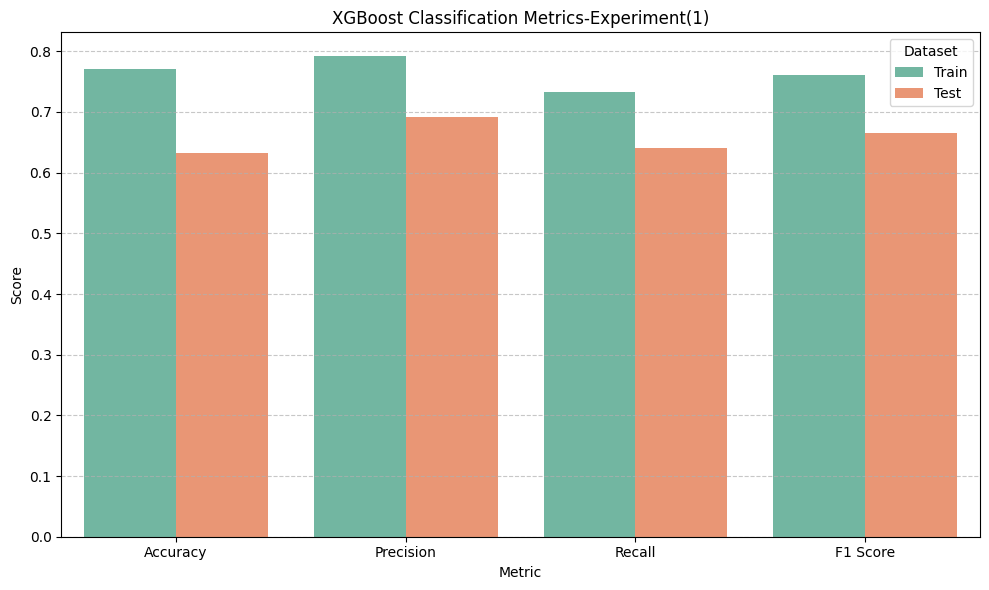

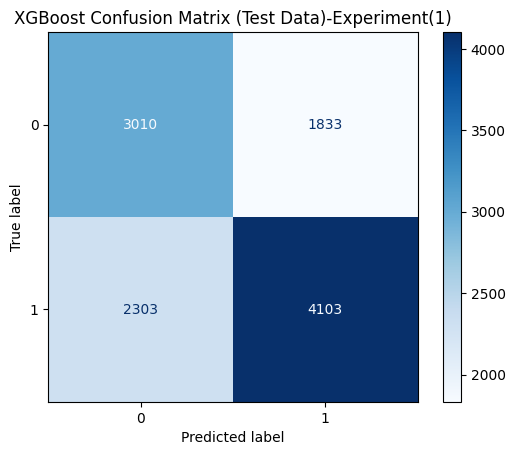

===== Classification Report (XGBOOST) =====
              precision    recall  f1-score   support

           0       0.57      0.62      0.59      4843
           1       0.69      0.64      0.66      6406

    accuracy                           0.63     11249
   macro avg       0.63      0.63      0.63     11249
weighted avg       0.64      0.63      0.63     11249



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




model_xgb = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_resampled, y_resampled)
joblib.dump(model_xgb, 'xgb_model.joblib')

y_train_pred_xgb = model_xgb.predict(X_resampled)
y_test_pred_xgb = model_xgb.predict(X_test_processed)


def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1


train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb =classification_metrics(y_resampled, y_train_pred_xgb)
test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb = classification_metrics(y_test, y_test_pred_xgb)

print("===== XGBoost Training Metrics =====")
print(f"Accuracy: {train_acc_xgb:.4f}")
print(f"Precision: {train_prec_xgb:.4f}")
print(f"Recall: {train_rec_xgb:.4f}")
print(f"F1 Score: {train_f1_xgb:.4f}")

print("\n===== XGBoost Testing Metrics =====")
print(f"Accuracy: {test_acc_xgb:.4f}")
print(f"Precision: {test_prec_xgb:.4f}")
print(f"Recall: {test_rec_xgb:.4f}")
print(f"F1 Score: {test_f1_xgb:.4f}")


metrics_xgb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb],
    "Test": [test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb]
})

metrics_xgb_melted = metrics_xgb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_xgb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("XGBoost Classification Metrics-Experiment(1)")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=model_xgb.classes_)
disp_xgb.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix (Test Data)-Experiment(1)")
plt.show()

print("===== Classification Report (XGBOOST) =====")
print(classification_report(y_test, y_test_pred_xgb))

LightGBM

[LightGBM] [Info] Number of positive: 25625, number of negative: 25625
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 51250, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
===== LightGBM Training Metrics =====
Accuracy: 0.7104
Precision: 0.7552
Recall: 0.6228
F1 Score: 0.6826

===== LightGBM Testing Metrics =====
Accuracy: 0.6441
Precision: 0.7273
Recall: 0.5999
F1 Score: 0.6575


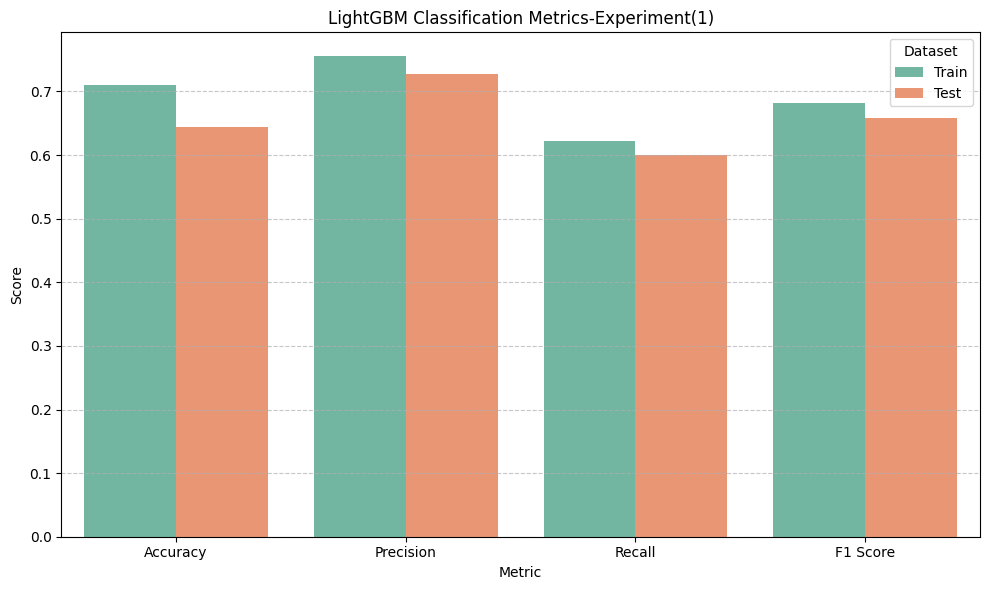

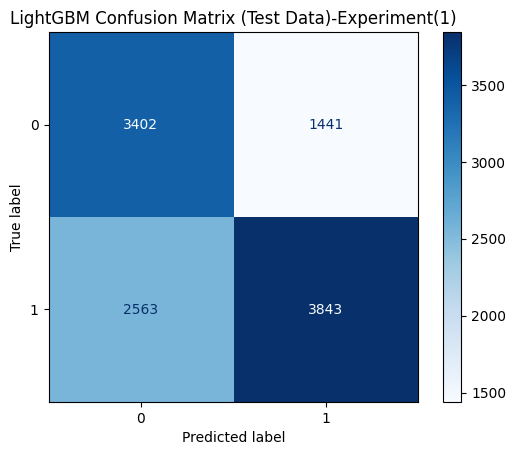

===== Classification Report (LightGBM) =====
              precision    recall  f1-score   support

           0       0.57      0.70      0.63      4843
           1       0.73      0.60      0.66      6406

    accuracy                           0.64     11249
   macro avg       0.65      0.65      0.64     11249
weighted avg       0.66      0.64      0.65     11249



In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_lgb = lgb.LGBMClassifier(random_state=42)
model_lgb.fit(X_resampled, y_resampled)

y_train_pred_lgb = model_lgb.predict(X_resampled)
y_test_pred_lgb = model_lgb.predict(X_test_processed)

def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1

train_acc_lgb, train_prec_lgb, train_rec_lgb, train_f1_lgb = classification_metrics(y_resampled, y_train_pred_lgb)
test_acc_lgb, test_prec_lgb, test_rec_lgb, test_f1_lgb = classification_metrics(y_test, y_test_pred_lgb)

print("===== LightGBM Training Metrics =====")
print(f"Accuracy: {train_acc_lgb:.4f}")
print(f"Precision: {train_prec_lgb:.4f}")
print(f"Recall: {train_rec_lgb:.4f}")
print(f"F1 Score: {train_f1_lgb:.4f}")

print("\n===== LightGBM Testing Metrics =====")
print(f"Accuracy: {test_acc_lgb:.4f}")
print(f"Precision: {test_prec_lgb:.4f}")
print(f"Recall: {test_rec_lgb:.4f}")
print(f"F1 Score: {test_f1_lgb:.4f}")

metrics_lgb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_lgb, train_prec_lgb, train_rec_lgb, train_f1_lgb],
    "Test": [test_acc_lgb, test_prec_lgb, test_rec_lgb, test_f1_lgb]
})

metrics_lgb_melted = metrics_lgb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_lgb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("LightGBM Classification Metrics-Experiment(1)")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

cm_lgb = confusion_matrix(y_test, y_test_pred_lgb)
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=model_lgb.classes_)
disp_lgb.plot(cmap='Blues')
plt.title("LightGBM Confusion Matrix (Test Data)-Experiment(1)")
plt.show()
print("===== Classification Report (LightGBM) =====")
print(classification_report(y_test, y_test_pred_lgb))

 CatBoost

In [ ]:
!pip install  catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.8 MB/s eta 0:00:00


===== CatBoost Training Metrics =====
Accuracy: 0.7571
Precision: 0.7893
Recall: 0.7015
F1 Score: 0.7428

===== CatBoost Testing Metrics =====
Accuracy: 0.6374
Precision: 0.7042
Recall: 0.6264
F1 Score: 0.6630


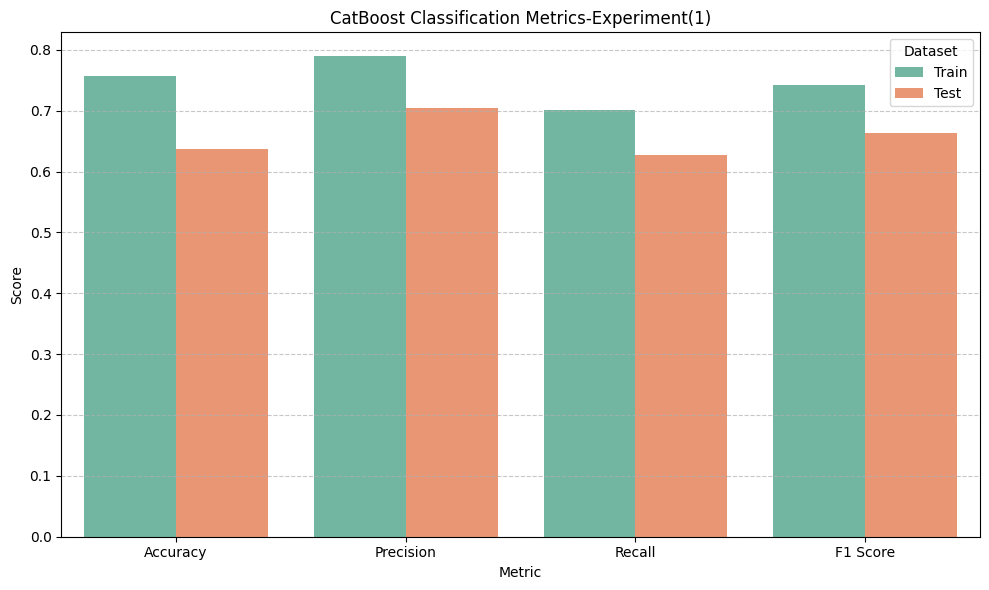

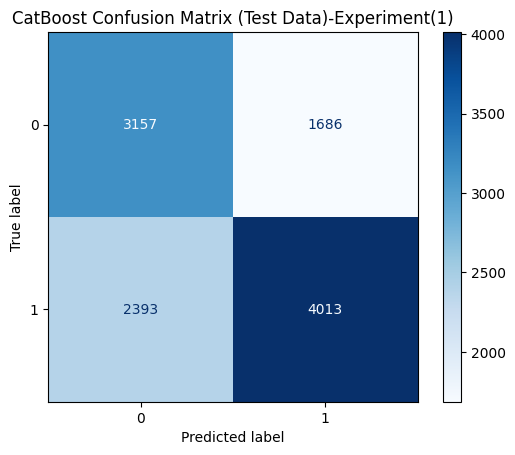

===== Classification Report (CatBoost) =====
              precision    recall  f1-score   support

           0       0.55      0.73      0.63      4843
           1       0.73      0.56      0.63      6406

    accuracy                           0.63     11249
   macro avg       0.64      0.64      0.63     11249
weighted avg       0.65      0.63      0.63     11249



In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_cat = CatBoostClassifier(random_state=42, verbose=0)
model_cat.fit(X_resampled, y_resampled)

y_train_pred_cat = model_cat.predict(X_resampled)
y_test_pred_cat = model_cat.predict(X_test_processed)

def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1

train_acc_cat, train_prec_cat, train_rec_cat, train_f1_cat = classification_metrics(y_resampled, y_train_pred_cat)
test_acc_cat, test_prec_cat, test_rec_cat, test_f1_cat = classification_metrics(y_test, y_test_pred_cat)

print("===== CatBoost Training Metrics =====")
print(f"Accuracy: {train_acc_cat:.4f}")
print(f"Precision: {train_prec_cat:.4f}")
print(f"Recall: {train_rec_cat:.4f}")
print(f"F1 Score: {train_f1_cat:.4f}")

print("\n===== CatBoost Testing Metrics =====")
print(f"Accuracy: {test_acc_cat:.4f}")
print(f"Precision: {test_prec_cat:.4f}")
print(f"Recall: {test_rec_cat:.4f}")
print(f"F1 Score: {test_f1_cat:.4f}")

metrics_cat = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_cat, train_prec_cat, train_rec_cat, train_f1_cat],
    "Test": [test_acc_cat, test_prec_cat, test_rec_cat, test_f1_cat]
})

metrics_cat_melted = metrics_cat.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_cat_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("CatBoost Classification Metrics-Experiment(1)")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

cm_cat = confusion_matrix(y_test, y_test_pred_cat)
disp_cat = ConfusionMatrixDisplay(confusion_matrix=cm_cat, display_labels=model_cat.classes_)
disp_cat.plot(cmap='Blues')
plt.title("CatBoost Confusion Matrix (Test Data)-Experiment(1)")
plt.show()
print("===== Classification Report (CatBoost) =====")
print(classification_report(y_test, y_test_pred_cb))

K-Nearest Neighbors (KNN)

===== KNN Training Metrics =====
Accuracy: 0.7711
Precision: 0.8205
Recall: 0.6939
F1 Score: 0.7519

===== KNN Testing Metrics =====
Accuracy: 0.5924
Precision: 0.6662
Recall: 0.5698
F1 Score: 0.6142


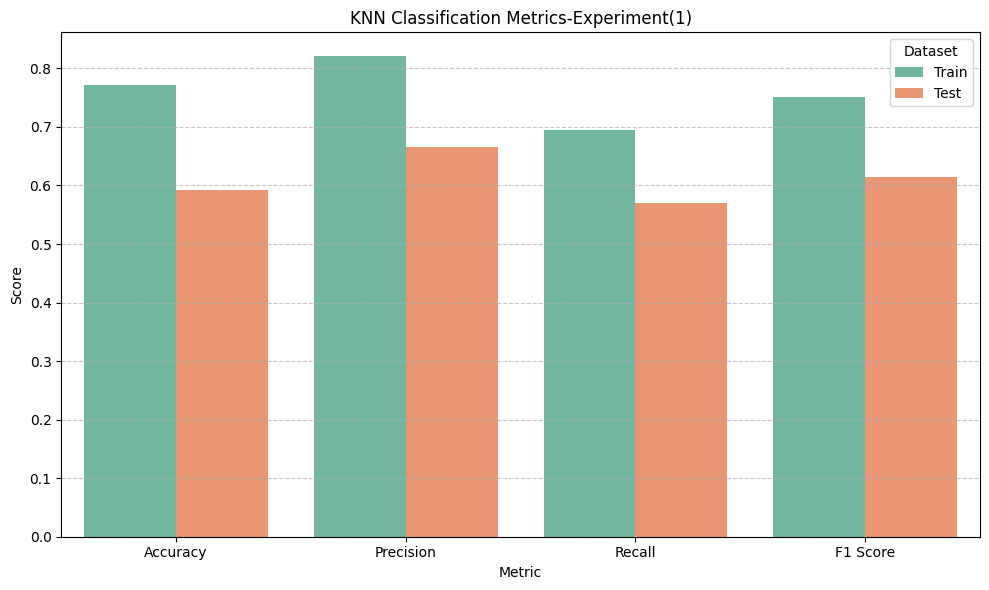

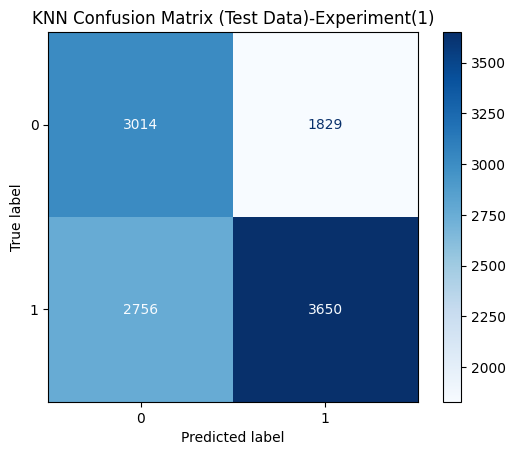

===== Classification Report (KNN ) =====
              precision    recall  f1-score   support

           0       0.52      0.62      0.57      4843
           1       0.67      0.57      0.61      6406

    accuracy                           0.59     11249
   macro avg       0.59      0.60      0.59     11249
weighted avg       0.60      0.59      0.59     11249



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_resampled, y_resampled)

y_train_pred_knn = model_knn.predict(X_resampled)
y_test_pred_knn = model_knn.predict(X_test_processed)

def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1

train_acc_knn, train_prec_knn, train_rec_knn, train_f1_knn = classification_metrics(y_resampled, y_train_pred_knn)
test_acc_knn, test_prec_knn, test_rec_knn, test_f1_knn = classification_metrics(y_test, y_test_pred_knn)

print("===== KNN Training Metrics =====")
print(f"Accuracy: {train_acc_knn:.4f}")
print(f"Precision: {train_prec_knn:.4f}")
print(f"Recall: {train_rec_knn:.4f}")
print(f"F1 Score: {train_f1_knn:.4f}")

print("\n===== KNN Testing Metrics =====")
print(f"Accuracy: {test_acc_knn:.4f}")
print(f"Precision: {test_prec_knn:.4f}")
print(f"Recall: {test_rec_knn:.4f}")
print(f"F1 Score: {test_f1_knn:.4f}")

metrics_knn = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_knn, train_prec_knn, train_rec_knn, train_f1_knn],
    "Test": [test_acc_knn, test_prec_knn, test_rec_knn, test_f1_knn]
})

metrics_knn_melted = metrics_knn.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_knn_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("KNN Classification Metrics-Experiment(1)")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

cm_knn = confusion_matrix(y_test, y_test_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=model_knn.classes_)
disp_knn.plot(cmap='Blues')
plt.title("KNN Confusion Matrix (Test Data)-Experiment(1)")
plt.show()
print("===== Classification Report (KNN ) =====")
print(classification_report(y_test, y_test_pred_knn))

 Naive Bayes (GaussianNB)

===== Naive Bayes Training Metrics =====
Accuracy: 0.6406
Precision: 0.7364
Recall: 0.4380
F1 Score: 0.5493

===== Naive Bayes Testing Metrics =====
Accuracy: 0.6159
Precision: 0.7881
Recall: 0.4452
F1 Score: 0.5690


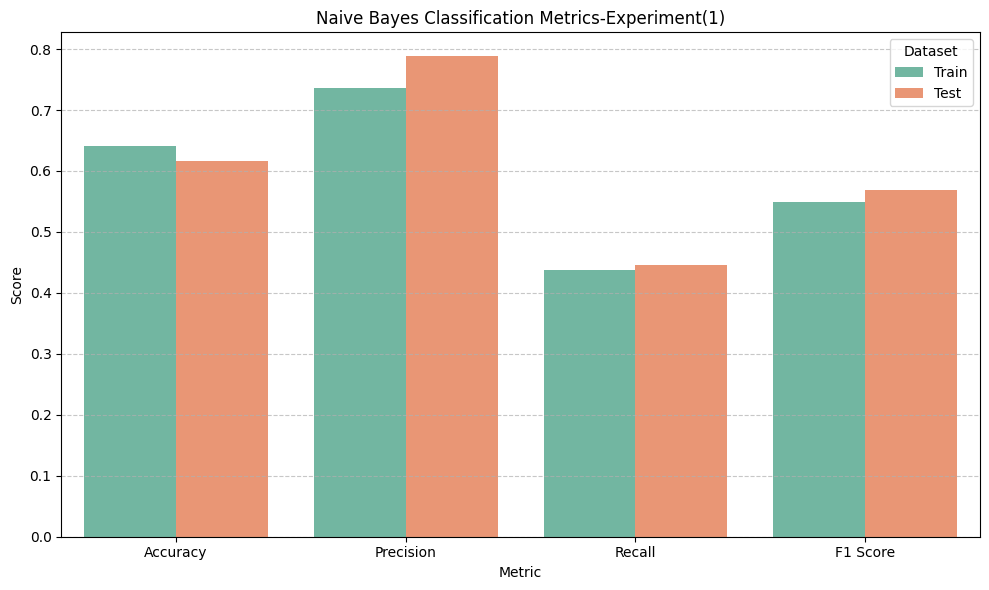

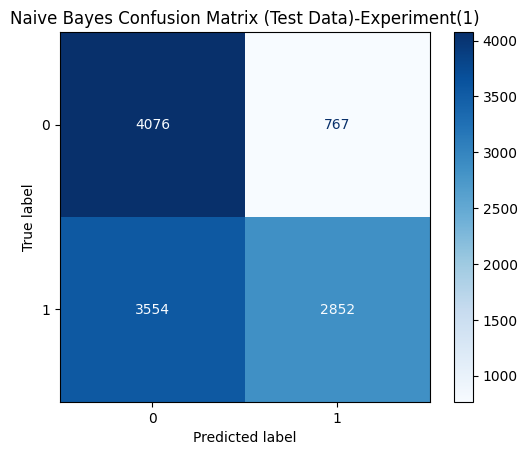

===== Classification Report ( Naive Bayes) =====
              precision    recall  f1-score   support

           0       0.53      0.84      0.65      4843
           1       0.79      0.45      0.57      6406

    accuracy                           0.62     11249
   macro avg       0.66      0.64      0.61     11249
weighted avg       0.68      0.62      0.61     11249



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_nb = GaussianNB()
model_nb.fit(X_resampled, y_resampled)

y_train_pred_nb = model_nb.predict(X_resampled)
y_test_pred_nb = model_nb.predict(X_test_processed)

def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1

train_acc_nb, train_prec_nb, train_rec_nb, train_f1_nb = classification_metrics(y_resampled, y_train_pred_nb)
test_acc_nb, test_prec_nb, test_rec_nb, test_f1_nb = classification_metrics(y_test, y_test_pred_nb)

print("===== Naive Bayes Training Metrics =====")
print(f"Accuracy: {train_acc_nb:.4f}")
print(f"Precision: {train_prec_nb:.4f}")
print(f"Recall: {train_rec_nb:.4f}")
print(f"F1 Score: {train_f1_nb:.4f}")

print("\n===== Naive Bayes Testing Metrics =====")
print(f"Accuracy: {test_acc_nb:.4f}")
print(f"Precision: {test_prec_nb:.4f}")
print(f"Recall: {test_rec_nb:.4f}")
print(f"F1 Score: {test_f1_nb:.4f}")

metrics_nb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_nb, train_prec_nb, train_rec_nb, train_f1_nb],
    "Test": [test_acc_nb, test_prec_nb, test_rec_nb, test_f1_nb]
})

metrics_nb_melted = metrics_nb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_nb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Naive Bayes Classification Metrics-Experiment(1)")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

cm_nb = confusion_matrix(y_test, y_test_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=model_nb.classes_)
disp_nb.plot(cmap='Blues')
plt.title("Naive Bayes Confusion Matrix (Test Data)-Experiment(1)")
plt.show()
print("===== Classification Report ( Naive Bayes) =====")
print(classification_report(y_test, y_test_pred_nb))

Support Vector Machine (SVM)

===== SVM Training Metrics =====
Accuracy: 0.6271
Precision: 0.6613
Recall: 0.5212
F1 Score: 0.5829

===== SVM Testing Metrics =====
Accuracy: 0.6007
Precision: 0.8341
Recall: 0.3729
F1 Score: 0.5154


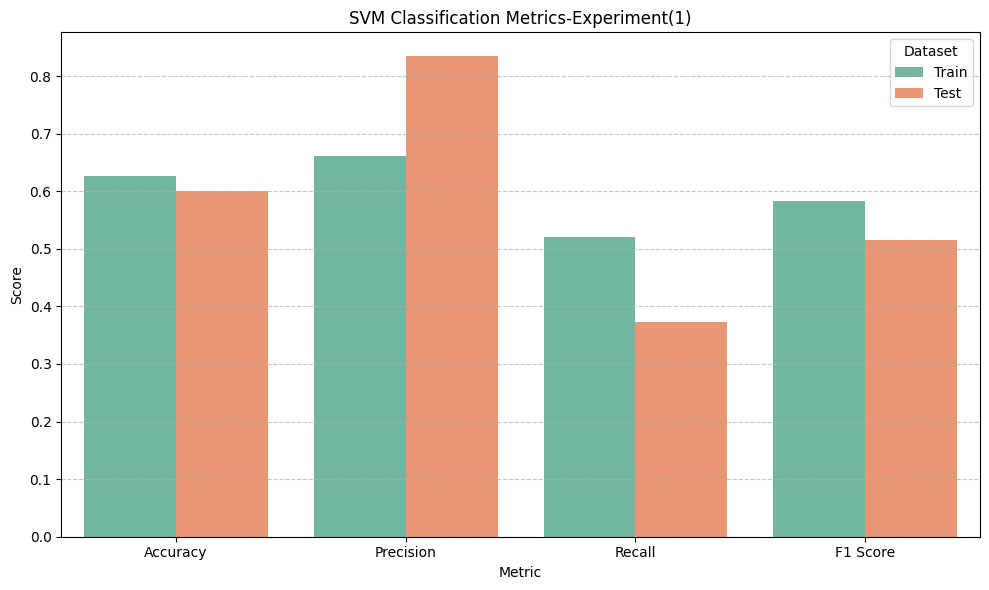

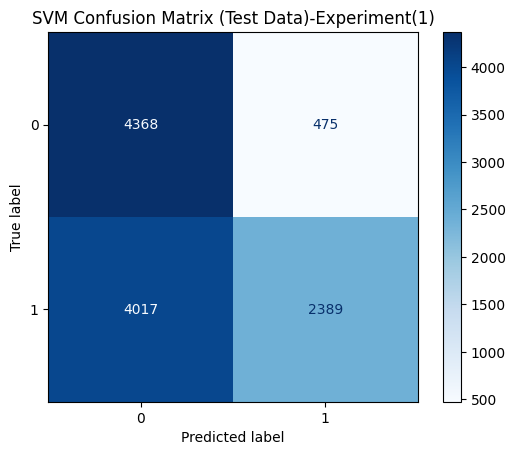

===== Classification Report ( SVM) =====
              precision    recall  f1-score   support

           0       0.52      0.90      0.66      4843
           1       0.83      0.37      0.52      6406

    accuracy                           0.60     11249
   macro avg       0.68      0.64      0.59     11249
weighted avg       0.70      0.60      0.58     11249



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_svm = SVC(kernel='rbf', random_state=42)
model_svm.fit(X_resampled, y_resampled)

y_train_pred_svm = model_svm.predict(X_resampled)
y_test_pred_svm = model_svm.predict(X_test_processed)

def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1

train_acc_svm, train_prec_svm, train_rec_svm, train_f1_svm = classification_metrics(y_resampled, y_train_pred)
test_acc_svm, test_prec_svm, test_rec_svm, test_f1_svm = classification_metrics(y_test, y_test_pred_svm)

print("===== SVM Training Metrics =====")
print(f"Accuracy: {train_acc_svm:.4f}")
print(f"Precision: {train_prec_svm:.4f}")
print(f"Recall: {train_rec_svm:.4f}")
print(f"F1 Score: {train_f1_svm:.4f}")

print("\n===== SVM Testing Metrics =====")
print(f"Accuracy: {test_acc_svm:.4f}")
print(f"Precision: {test_prec_svm:.4f}")
print(f"Recall: {test_rec_svm:.4f}")
print(f"F1 Score: {test_f1_svm:.4f}")

metrics_svm = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_svm, train_prec_svm, train_rec_svm, train_f1_svm],
    "Test": [test_acc_svm, test_prec_svm, test_rec_svm, test_f1_svm]
})

metrics_svm_melted = metrics_svm.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_svm_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("SVM Classification Metrics-Experiment(1)")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

cm_svm = confusion_matrix(y_test, y_test_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=model_svm.classes_)
disp_svm.plot(cmap='Blues')
plt.title("SVM Confusion Matrix (Test Data)-Experiment(1)")
plt.show()
print("===== Classification Report ( SVM) =====")
print(classification_report(y_test, y_test_pred_svm))

Experiment(2-1)

In [ ]:
!pip install h2o

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 4.2 MB/s eta 0:00:00


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpua5mj7if
  JVM stdout: /tmp/tmpua5mj7if/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpua5mj7if/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         11 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.7
H2O_cluster_version_age:    1 month and 24 days
H2O_cluster_name:           H2O_from_python_unknownUser_oq7h8n
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.11.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |

/usr/local/lib/python3.11/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
            variable  relative_importance  scaled_importance  percentage
0                age          9358.906250           1.000000    0.934059
1       extraversion           170.294769           0.018196    0.016996
2           openness           165.727692           0.017708    0.016540
3        neuroticism           165.417389           0.017675    0.016509
4  conscientiousness           159.263107           0.017017    0.015895


<ipython-input-88-d58ae7da60bd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=important_features_sorted,


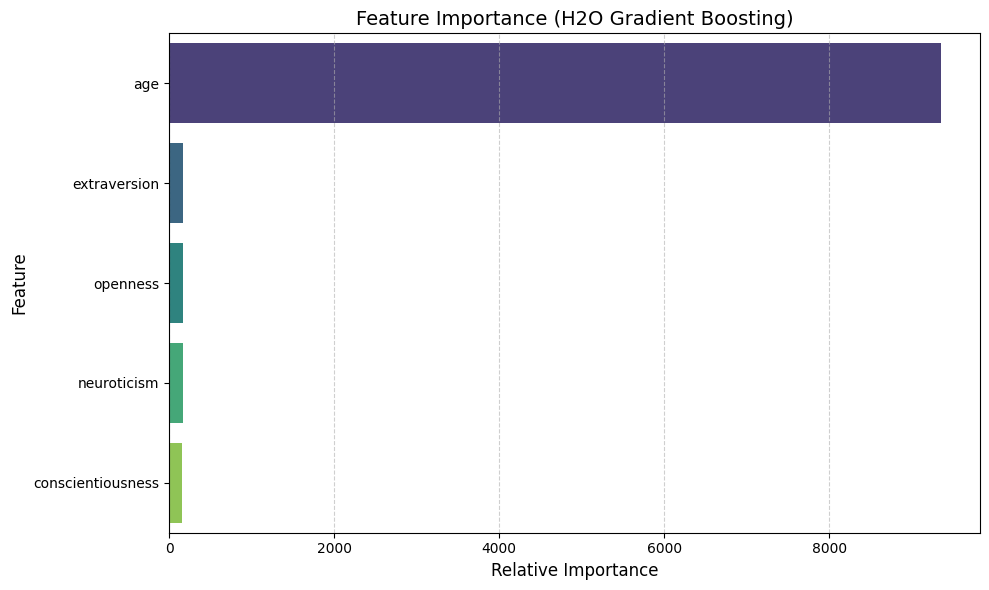

In [ ]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator


h2o.init()


df_h2o = pd.concat([X, y], axis=1)
df_h2o[y.name] = df_h2o[y.name].replace({1: 0, 2: 1})


hf = h2o.H2OFrame(df_h2o)


x_cols = list(X.columns)
y_col = y.name

model = H2OGradientBoostingEstimator(seed=42)
model.train(x=x_cols, y=y_col, training_frame=hf)


important_features = model.varimp(use_pandas=True)
print(important_features)

import matplotlib.pyplot as plt
import seaborn as sns


important_features_sorted = important_features.sort_values(by='relative_importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=important_features_sorted,
            x='relative_importance',
            y='variable',
            palette='viridis')

plt.title('Feature Importance (H2O Gradient Boosting)', fontsize=14)
plt.xlabel('Relative Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Experiment(2-1) drop:


gender

education

cannabis

---
USING:selected_features = [
    'age',
    'openness',
    'extraversion',
    'agreeableness',
    'neuroticism',
    'conscientiousness',
    'sensation',
    'impulsiveness'
]


In [ ]:
selected_features = [
    'age', 'openness', 'extraversion', 'agreeableness',
    'neuroticism', 'conscientiousness', 'sensation', 'impulsiveness'
]

#1. Extract only selected features
X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

#2. Create and process pipeline
pipeline = Pipeline([
    ('winsorizer', Winsorizer(factor=1.5)),
    ('scaler', MinMaxScaler())
])
pipeline.fit(X_train_selected)

X_train_processed = pipeline.transform(X_train_selected)
X_test_processed = pipeline.transform(X_test_selected)
#3. SMOTE on processed data only (selected features only)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)
with open("pipeline2.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("Pipeline saved successfully.")

Pipeline saved successfully.


LogisticRegression

===== Training Metrics(EXP2-1) =====
Accuracy: 0.6078
Precision: 0.6344
Recall: 0.5090
F1 Score: 0.5648

===== Testing Metrics(EXP2-1)  =====
Accuracy: 0.5897
Precision: 0.6886
Recall: 0.5103
F1 Score: 0.5862


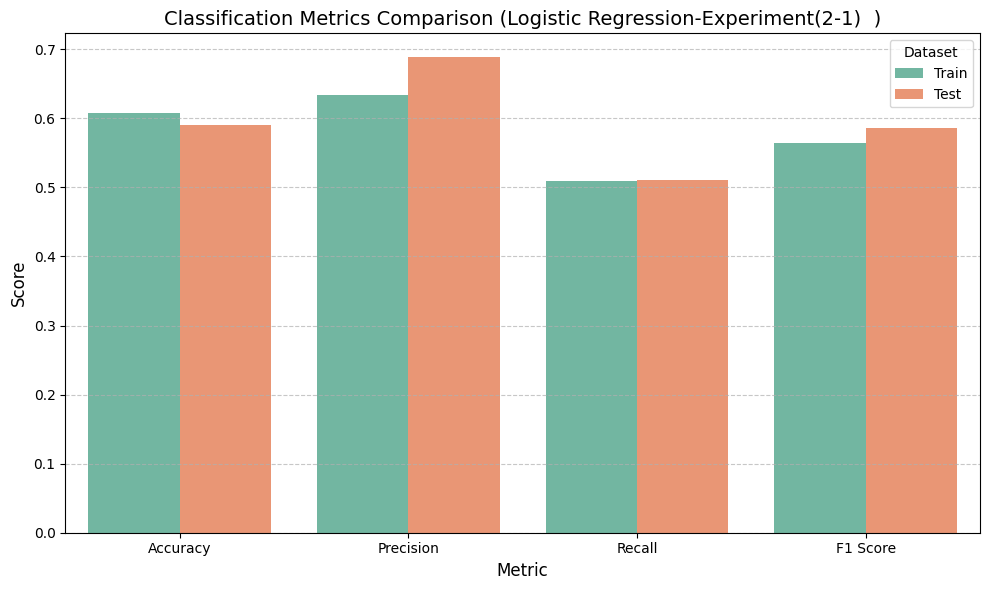

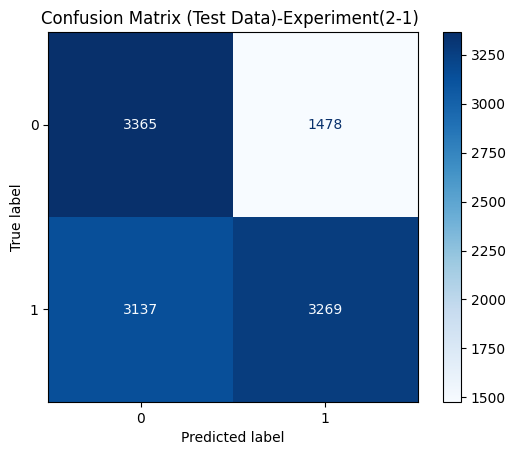

===== Classification Report ( LogisticRegression) =====
              precision    recall  f1-score   support

           0       0.52      0.69      0.59      4843
           1       0.69      0.51      0.59      6406

    accuracy                           0.59     11249
   macro avg       0.60      0.60      0.59     11249
weighted avg       0.61      0.59      0.59     11249



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split






model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_resampled, y_resampled)



y_train_pred = model.predict(X_resampled)
y_test_pred = model.predict(X_test_processed)



def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1

train_acc, train_prec, train_rec, train_f1 = classification_metrics(y_resampled, y_train_pred)
test_acc, test_prec, test_rec, test_f1 = classification_metrics(y_test, y_test_pred)


print("===== Training Metrics(EXP2-1) =====")
print(f"Accuracy: {train_acc:.4f}")
print(f"Precision: {train_prec:.4f}")
print(f"Recall: {train_rec:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\n===== Testing Metrics(EXP2-1)  =====")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall: {test_rec:.4f}")
print(f"F1 Score: {test_f1:.4f}")


metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc, train_prec, train_rec, train_f1],
    "Test": [test_acc, test_prec, test_rec, test_f1]
})

metrics_df_melted = metrics_df.melt(id_vars="Metric", var_name="Dataset", value_name="Value")


plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (Logistic Regression-Experiment(2-1)  )", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()


cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Data)-Experiment(2-1) ")
plt.show()
print("===== Classification Report ( LogisticRegression) =====")
print(classification_report(y_test, y_test_pred))

 Decision Tree

===== Training Metrics (Decision Tree) =====
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

===== Testing Metrics (Decision Tree) =====
Accuracy: 0.5684
Precision: 0.6208
Recall: 0.6222
F1 Score: 0.6215


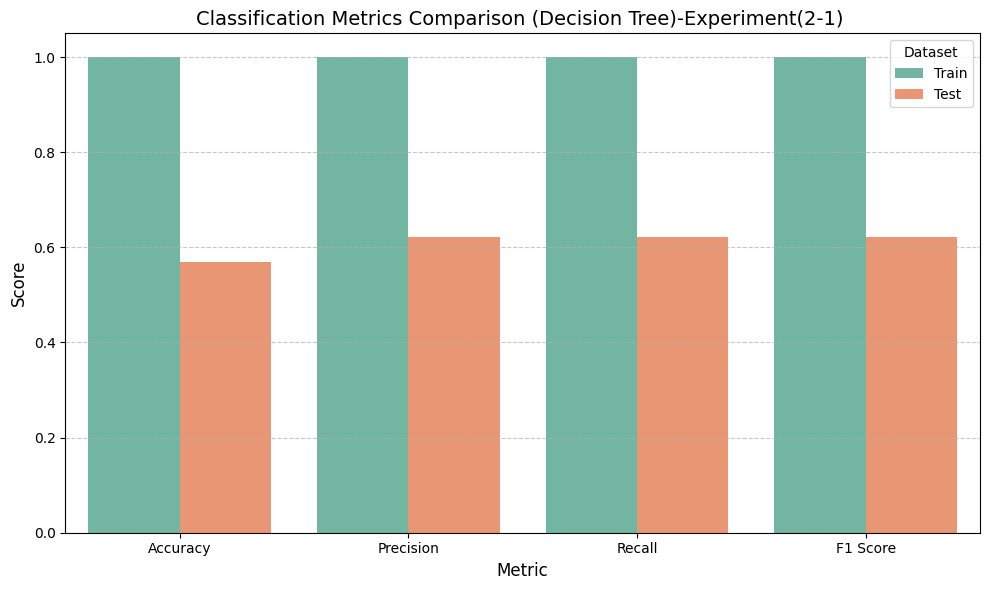

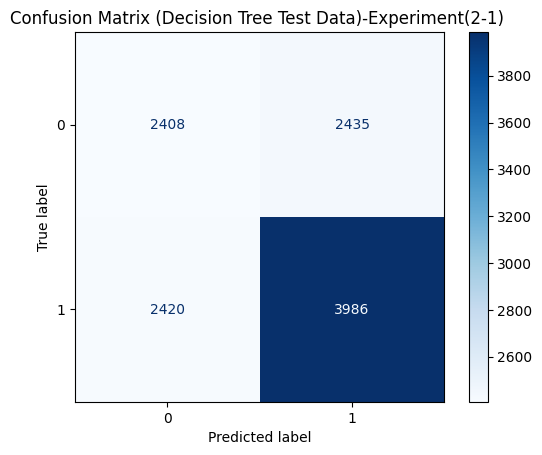

===== Classification Report ( Decision Tree) =====
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4843
           1       0.62      0.62      0.62      6406

    accuracy                           0.57     11249
   macro avg       0.56      0.56      0.56     11249
weighted avg       0.57      0.57      0.57     11249



In [ ]:
from sklearn.tree import DecisionTreeClassifier


model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_resampled, y_resampled)


y_train_pred_dt = model_dt.predict(X_resampled)
y_test_pred_dt = model_dt.predict(X_test_processed)


train_acc_dt, train_prec_dt, train_rec_dt, train_f1_dt = classification_metrics(y_resampled, y_train_pred_dt)
test_acc_dt, test_prec_dt, test_rec_dt, test_f1_dt = classification_metrics(y_test, y_test_pred_dt)

print("===== Training Metrics (Decision Tree) =====")
print(f"Accuracy: {train_acc_dt:.4f}")
print(f"Precision: {train_prec_dt:.4f}")
print(f"Recall: {train_rec_dt:.4f}")
print(f"F1 Score: {train_f1_dt:.4f}")

print("\n===== Testing Metrics (Decision Tree) =====")
print(f"Accuracy: {test_acc_dt:.4f}")
print(f"Precision: {test_prec_dt:.4f}")
print(f"Recall: {test_rec_dt:.4f}")
print(f"F1 Score: {test_f1_dt:.4f}")


metrics_dt = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_dt, train_prec_dt, train_rec_dt, train_f1_dt],
    "Test": [test_acc_dt, test_prec_dt, test_rec_dt, test_f1_dt]
})

metrics_dt_melted = metrics_dt.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_dt_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (Decision Tree)-Experiment(2-1) ", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_dt = confusion_matrix(y_test, y_test_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=model_dt.classes_)
disp_dt.plot(cmap='Blues')
plt.title("Confusion Matrix (Decision Tree Test Data)-Experiment(2-1) ")
plt.show()
print("===== Classification Report ( Decision Tree) =====")
print(classification_report(y_test, y_test_pred_dt))

Random Forest

===== Training Metrics (Random Forest) =====
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

===== Testing Metrics (Random Forest) =====
Accuracy: 0.6100
Precision: 0.6798
Recall: 0.5958
F1 Score: 0.6351


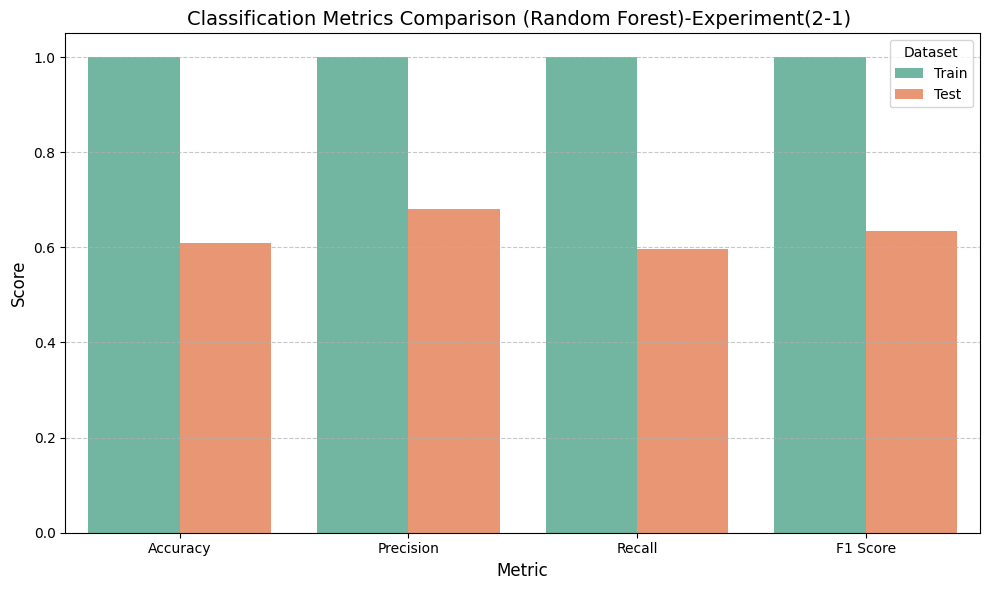

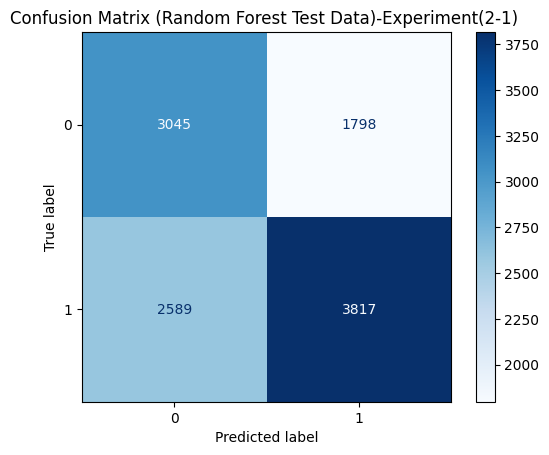

===== Classification Report(Random Forest)=====
              precision    recall  f1-score   support

           0       0.54      0.63      0.58      4843
           1       0.68      0.60      0.64      6406

    accuracy                           0.61     11249
   macro avg       0.61      0.61      0.61     11249
weighted avg       0.62      0.61      0.61     11249



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_resampled, y_resampled)

y_train_pred_rf = model_rf.predict(X_resampled)
y_test_pred_rf = model_rf.predict(X_test_processed)

train_acc_rf, train_prec_rf, train_rec_rf, train_f1_rf = classification_metrics(y_resampled, y_train_pred_rf)
test_acc_rf, test_prec_rf, test_rec_rf, test_f1_rf = classification_metrics(y_test, y_test_pred_rf)

print("===== Training Metrics (Random Forest) =====")
print(f"Accuracy: {train_acc_rf:.4f}")
print(f"Precision: {train_prec_rf:.4f}")
print(f"Recall: {train_rec_rf:.4f}")
print(f"F1 Score: {train_f1_rf:.4f}")

print("\n===== Testing Metrics (Random Forest) =====")
print(f"Accuracy: {test_acc_rf:.4f}")
print(f"Precision: {test_prec_rf:.4f}")
print(f"Recall: {test_rec_rf:.4f}")
print(f"F1 Score: {test_f1_rf:.4f}")

metrics_rf = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_rf, train_prec_rf, train_rec_rf, train_f1_rf],
    "Test": [test_acc_rf, test_prec_rf, test_rec_rf, test_f1_rf]
})

metrics_rf_melted = metrics_rf.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_rf_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (Random Forest)-Experiment(2-1) ", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_rf = confusion_matrix(y_test, y_test_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model_rf.classes_)
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix (Random Forest Test Data)-Experiment(2-1) ")
plt.show()
print("===== Classification Report(Random Forest)=====")
print(classification_report(y_test, y_test_pred_rf))

Gradient Boosting

===== Training Metrics (Gradient Boosting) =====
Accuracy: 0.6736
Precision: 0.7734
Recall: 0.4911
F1 Score: 0.6007

===== Testing Metrics (Gradient Boosting) =====
Accuracy: 0.6343
Precision: 0.7814
Recall: 0.4967
F1 Score: 0.6074


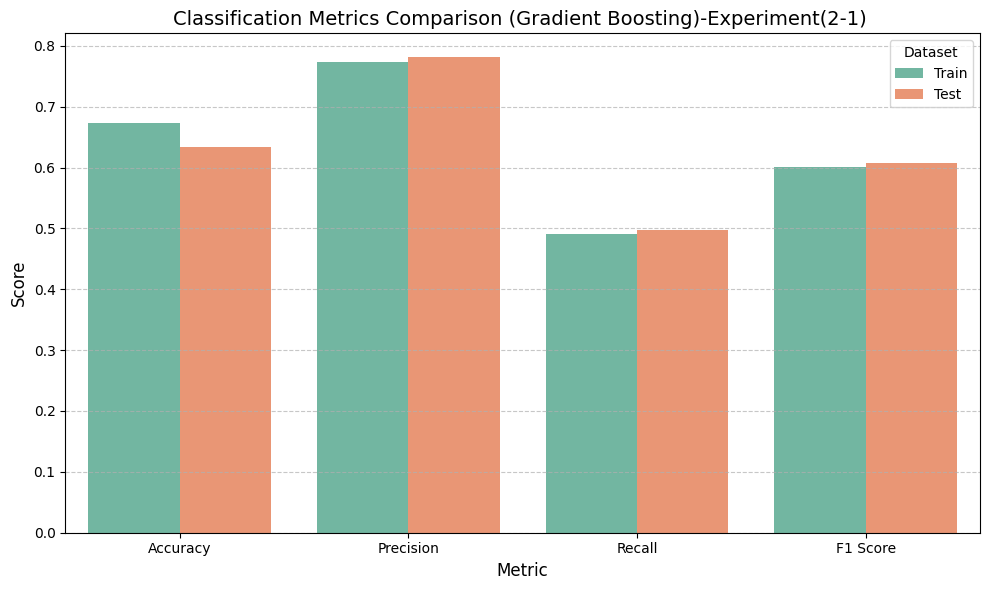

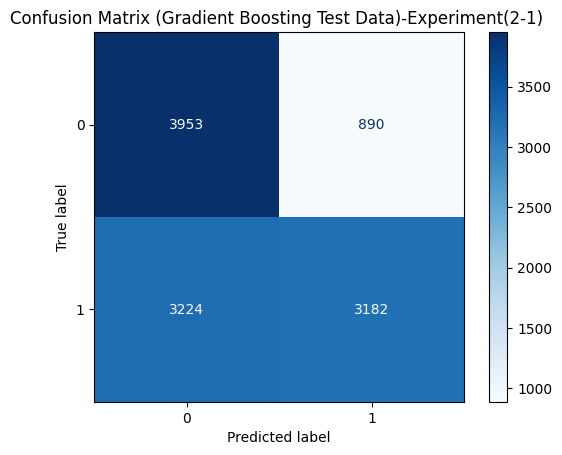

===== Classification Report(Gradient Boosting)=====
              precision    recall  f1-score   support

           0       0.55      0.82      0.66      4843
           1       0.78      0.50      0.61      6406

    accuracy                           0.63     11249
   macro avg       0.67      0.66      0.63     11249
weighted avg       0.68      0.63      0.63     11249



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_resampled, y_resampled)

y_train_pred_gb = model_gb.predict(X_resampled)
y_test_pred_gb = model_gb.predict(X_test_processed)

train_acc_gb, train_prec_gb, train_rec_gb, train_f1_gb = classification_metrics(y_resampled, y_train_pred_gb)
test_acc_gb, test_prec_gb, test_rec_gb, test_f1_gb = classification_metrics(y_test, y_test_pred_gb)

print("===== Training Metrics (Gradient Boosting) =====")
print(f"Accuracy: {train_acc_gb:.4f}")
print(f"Precision: {train_prec_gb:.4f}")
print(f"Recall: {train_rec_gb:.4f}")
print(f"F1 Score: {train_f1_gb:.4f}")

print("\n===== Testing Metrics (Gradient Boosting) =====")
print(f"Accuracy: {test_acc_gb:.4f}")
print(f"Precision: {test_prec_gb:.4f}")
print(f"Recall: {test_rec_gb:.4f}")
print(f"F1 Score: {test_f1_gb:.4f}")

metrics_gb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_gb, train_prec_gb, train_rec_gb, train_f1_gb],
    "Test": [test_acc_gb, test_prec_gb, test_rec_gb, test_f1_gb]
})

metrics_gb_melted = metrics_gb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_gb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (Gradient Boosting)-Experiment(2-1) ", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_gb = confusion_matrix(y_test, y_test_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=model_gb.classes_)
disp_gb.plot(cmap='Blues')
plt.title("Confusion Matrix (Gradient Boosting Test Data)-Experiment(2-1) ")
plt.show()
print("===== Classification Report(Gradient Boosting)=====")
print(classification_report(y_test, y_test_pred_gb))

 XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:19:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


===== Training Metrics (XGBoost) =====
Accuracy: 0.7601
Precision: 0.7933
Recall: 0.7035
F1 Score: 0.7457

===== Testing Metrics (XGBoost) =====
Accuracy: 0.6173
Precision: 0.6871
Recall: 0.6022
F1 Score: 0.6419


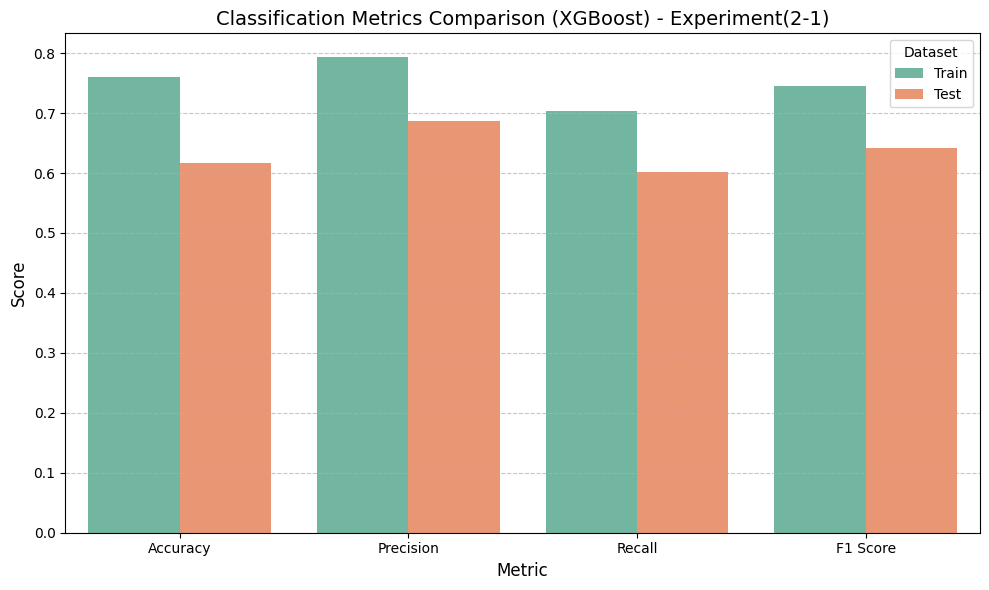

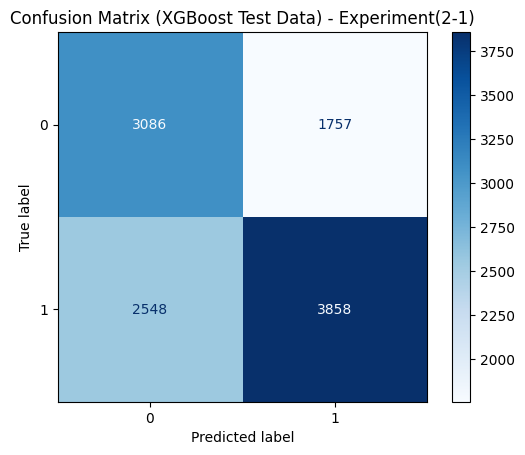

===== Classification Report(XGBoost)=====
              precision    recall  f1-score   support

           0       0.55      0.64      0.59      4843
           1       0.69      0.60      0.64      6406

    accuracy                           0.62     11249
   macro avg       0.62      0.62      0.62     11249
weighted avg       0.63      0.62      0.62     11249



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_resampled, y_resampled)
# prediction
y_train_pred_xgb = model_xgb.predict(X_resampled)
y_test_pred_xgb = model_xgb.predict(X_test_processed)

train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb = classification_metrics(y_resampled, y_train_pred_xgb)
test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb = classification_metrics(y_test, y_test_pred_xgb)

print("===== Training Metrics (XGBoost) =====")
print(f"Accuracy: {train_acc_xgb:.4f}")
print(f"Precision: {train_prec_xgb:.4f}")
print(f"Recall: {train_rec_xgb:.4f}")
print(f"F1 Score: {train_f1_xgb:.4f}")

print("\n===== Testing Metrics (XGBoost) =====")
print(f"Accuracy: {test_acc_xgb:.4f}")
print(f"Precision: {test_prec_xgb:.4f}")
print(f"Recall: {test_rec_xgb:.4f}")
print(f"F1 Score: {test_f1_xgb:.4f}")


metrics_xgb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb],
    "Test": [test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb]
})


metrics_xgb_melted = metrics_xgb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")


plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_xgb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (XGBoost) - Experiment(2-1)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()


cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
disp_xgb.plot(cmap='Blues')
plt.title("Confusion Matrix (XGBoost Test Data) - Experiment(2-1)")
plt.show()
print("===== Classification Report(XGBoost)=====")
print(classification_report(y_test, y_test_pred_xgb))

 LightGBM

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 25625, number of negative: 25625
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 51250, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


===== Training Metrics (LightGBM) =====
Accuracy: 0.6952
Precision: 0.7744
Recall: 0.5509
F1 Score: 0.6438

===== Testing Metrics (LightGBM) =====
Accuracy: 0.6300
Precision: 0.7465
Recall: 0.5304
F1 Score: 0.6202


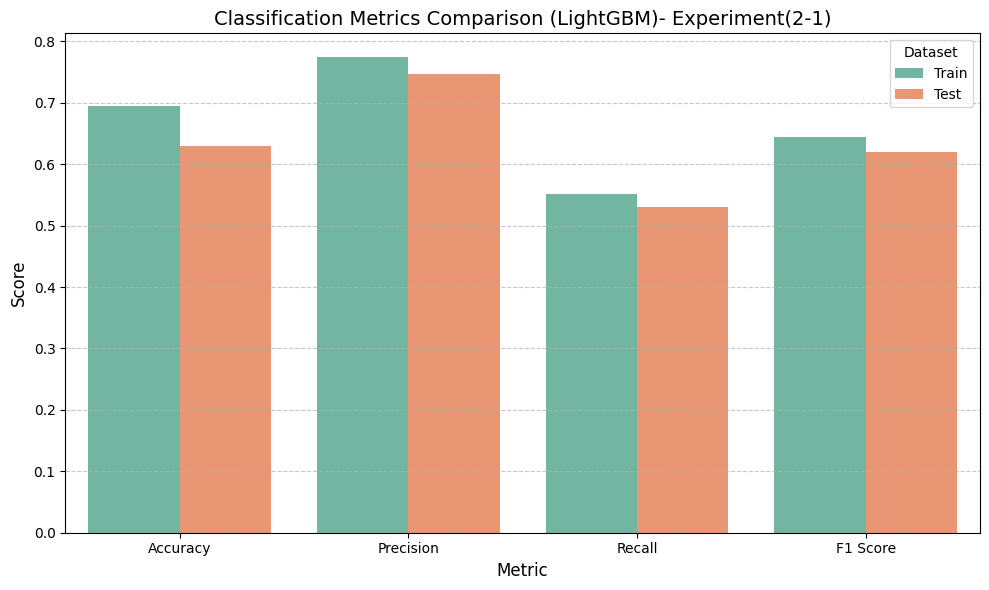

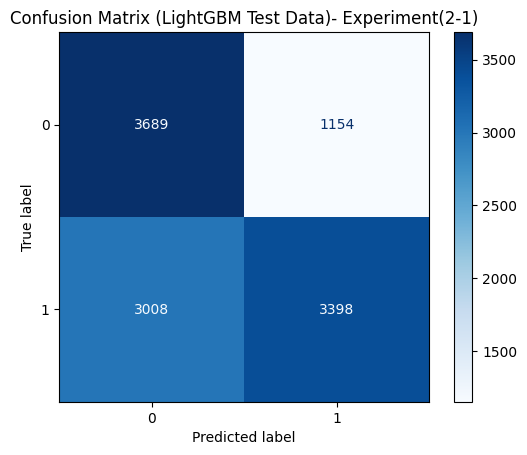

===== Classification Report(LightGBM )=====
              precision    recall  f1-score   support

           0       0.55      0.76      0.64      4843
           1       0.75      0.53      0.62      6406

    accuracy                           0.63     11249
   macro avg       0.65      0.65      0.63     11249
weighted avg       0.66      0.63      0.63     11249



In [ ]:
from lightgbm import LGBMClassifier

model_lgb = LGBMClassifier(random_state=42)
model_lgb.fit(X_resampled, y_resampled)

y_train_pred_lgb = model_lgb.predict(X_resampled)
y_test_pred_lgb = model_lgb.predict(X_test_processed)

train_acc_lgb, train_prec_lgb, train_rec_lgb, train_f1_lgb = classification_metrics(y_resampled, y_train_pred_lgb)
test_acc_lgb, test_prec_lgb, test_rec_lgb, test_f1_lgb = classification_metrics(y_test, y_test_pred_lgb)

print("===== Training Metrics (LightGBM) =====")
print(f"Accuracy: {train_acc_lgb:.4f}")
print(f"Precision: {train_prec_lgb:.4f}")
print(f"Recall: {train_rec_lgb:.4f}")
print(f"F1 Score: {train_f1_lgb:.4f}")

print("\n===== Testing Metrics (LightGBM) =====")
print(f"Accuracy: {test_acc_lgb:.4f}")
print(f"Precision: {test_prec_lgb:.4f}")
print(f"Recall: {test_rec_lgb:.4f}")
print(f"F1 Score: {test_f1_lgb:.4f}")

metrics_lgb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_lgb, train_prec_lgb, train_rec_lgb, train_f1_lgb],
    "Test": [test_acc_lgb, test_prec_lgb, test_rec_lgb, test_f1_lgb]
})

metrics_lgb_melted = metrics_lgb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_lgb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (LightGBM)- Experiment(2-1)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_lgb = confusion_matrix(y_test, y_test_pred_lgb)
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=model_lgb.classes_)
disp_lgb.plot(cmap='Blues')
plt.title("Confusion Matrix (LightGBM Test Data)- Experiment(2-1)")
plt.show()
print("===== Classification Report(LightGBM )=====")
print(classification_report(y_test, y_test_pred_lgb))

CatBoost

===== Training Metrics (CatBoost) =====
Accuracy: 0.7434
Precision: 0.7982
Recall: 0.6516
F1 Score: 0.7175

===== Testing Metrics (CatBoost) =====
Accuracy: 0.6239
Precision: 0.7099
Recall: 0.5741
F1 Score: 0.6348


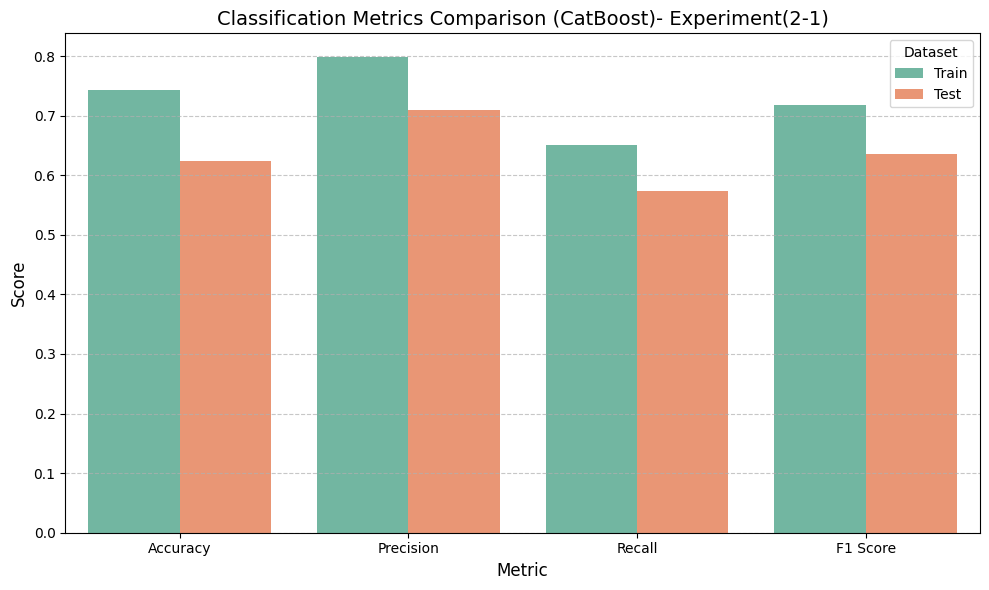

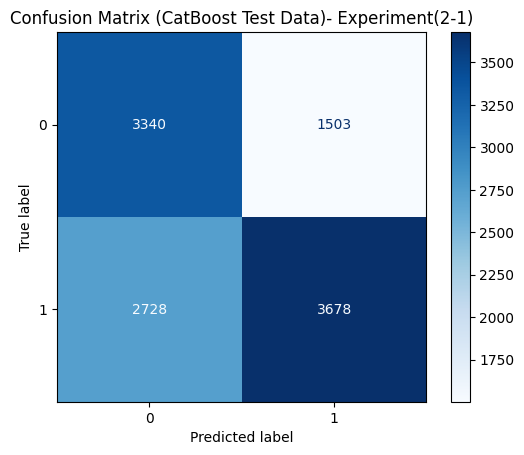

===== Classification Report(CatBoost )=====
              precision    recall  f1-score   support

           0       0.55      0.69      0.61      4843
           1       0.71      0.57      0.63      6406

    accuracy                           0.62     11249
   macro avg       0.63      0.63      0.62     11249
weighted avg       0.64      0.62      0.63     11249



In [ ]:
from catboost import CatBoostClassifier

model_cb = CatBoostClassifier(random_state=42, verbose=0)
model_cb.fit(X_resampled, y_resampled)

y_train_pred_cb = model_cb.predict(X_resampled)
y_test_pred_cb = model_cb.predict(X_test_processed)

train_acc_cb, train_prec_cb, train_rec_cb, train_f1_cb = classification_metrics(y_resampled, y_train_pred_cb)
test_acc_cb, test_prec_cb, test_rec_cb, test_f1_cb = classification_metrics(y_test, y_test_pred_cb)

print("===== Training Metrics (CatBoost) =====")
print(f"Accuracy: {train_acc_cb:.4f}")
print(f"Precision: {train_prec_cb:.4f}")
print(f"Recall: {train_rec_cb:.4f}")
print(f"F1 Score: {train_f1_cb:.4f}")

print("\n===== Testing Metrics (CatBoost) =====")
print(f"Accuracy: {test_acc_cb:.4f}")
print(f"Precision: {test_prec_cb:.4f}")
print(f"Recall: {test_rec_cb:.4f}")
print(f"F1 Score: {test_f1_cb:.4f}")

metrics_cb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_cb, train_prec_cb, train_rec_cb, train_f1_cb],
    "Test": [test_acc_cb, test_prec_cb, test_rec_cb, test_f1_cb]
})

metrics_cb_melted = metrics_cb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_cb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (CatBoost)- Experiment(2-1)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_cb = confusion_matrix(y_test, y_test_pred_cb)
disp_cb = ConfusionMatrixDisplay(confusion_matrix=cm_cb, display_labels=model_cb.classes_)
disp_cb.plot(cmap='Blues')
plt.title("Confusion Matrix (CatBoost Test Data)- Experiment(2-1)")
plt.show()
print("===== Classification Report(CatBoost )=====")
print(classification_report(y_test, y_test_pred_cb))

K-Nearest Neighbors (KNN)

===== Training Metrics (KNN) =====
Accuracy: 0.7659
Precision: 0.8103
Recall: 0.6944
F1 Score: 0.7479

===== Testing Metrics (KNN) =====
Accuracy: 0.5736
Precision: 0.6454
Recall: 0.5574
F1 Score: 0.5982


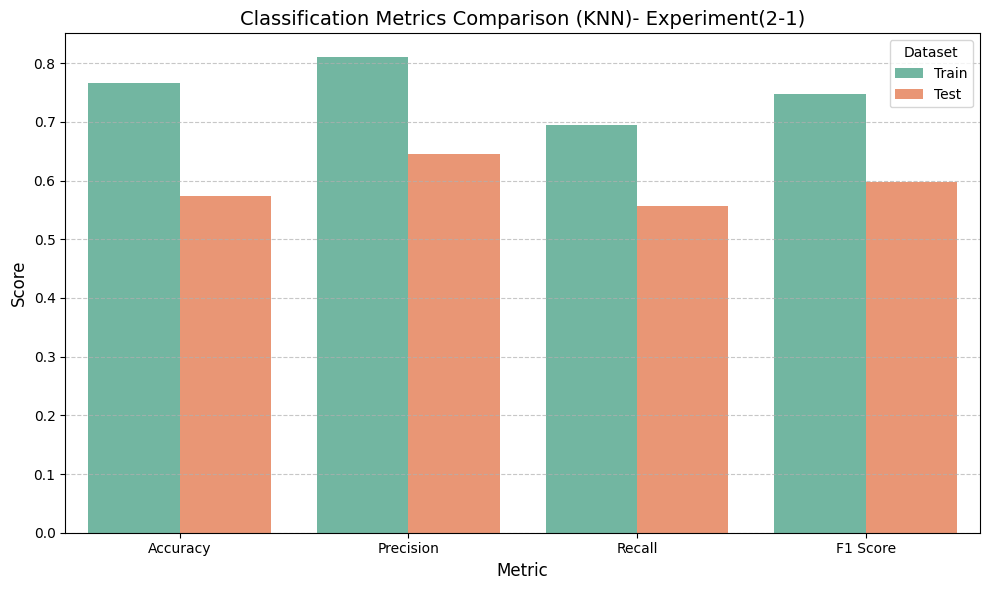

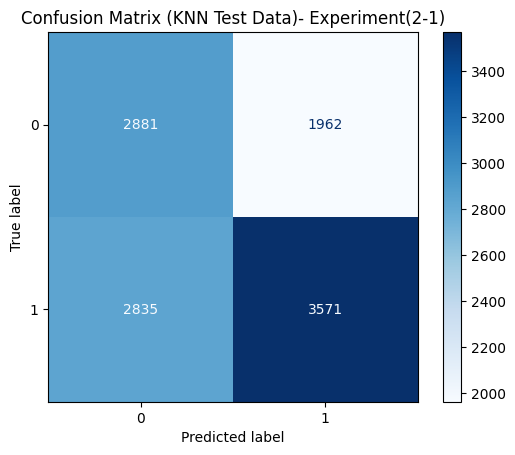

===== Classification Report(KNN)=====
              precision    recall  f1-score   support

           0       0.50      0.59      0.55      4843
           1       0.65      0.56      0.60      6406

    accuracy                           0.57     11249
   macro avg       0.57      0.58      0.57     11249
weighted avg       0.58      0.57      0.58     11249



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_resampled, y_resampled)

y_train_pred_knn = model_knn.predict(X_resampled)
y_test_pred_knn = model_knn.predict(X_test_processed)

train_acc_knn, train_prec_knn, train_rec_knn, train_f1_knn = classification_metrics(y_resampled, y_train_pred_knn)
test_acc_knn, test_prec_knn, test_rec_knn, test_f1_knn = classification_metrics(y_test, y_test_pred_knn)

print("===== Training Metrics (KNN) =====")
print(f"Accuracy: {train_acc_knn:.4f}")
print(f"Precision: {train_prec_knn:.4f}")
print(f"Recall: {train_rec_knn:.4f}")
print(f"F1 Score: {train_f1_knn:.4f}")

print("\n===== Testing Metrics (KNN) =====")
print(f"Accuracy: {test_acc_knn:.4f}")
print(f"Precision: {test_prec_knn:.4f}")
print(f"Recall: {test_rec_knn:.4f}")
print(f"F1 Score: {test_f1_knn:.4f}")

metrics_knn = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_knn, train_prec_knn, train_rec_knn, train_f1_knn],
    "Test": [test_acc_knn, test_prec_knn, test_rec_knn, test_f1_knn]
})

metrics_knn_melted = metrics_knn.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_knn_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (KNN)- Experiment(2-1)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_knn = confusion_matrix(y_test, y_test_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=model_knn.classes_)
disp_knn.plot(cmap='Blues')
plt.title("Confusion Matrix (KNN Test Data)- Experiment(2-1)")
plt.show()
print("===== Classification Report(KNN)=====")
print(classification_report(y_test, y_test_pred_knn))

Naive Bayes

===== Training Metrics (Naive Bayes) =====
Accuracy: 0.6291
Precision: 0.7066
Recall: 0.4415
F1 Score: 0.5434

===== Testing Metrics (Naive Bayes) =====
Accuracy: 0.6038
Precision: 0.7586
Recall: 0.4463
F1 Score: 0.5620


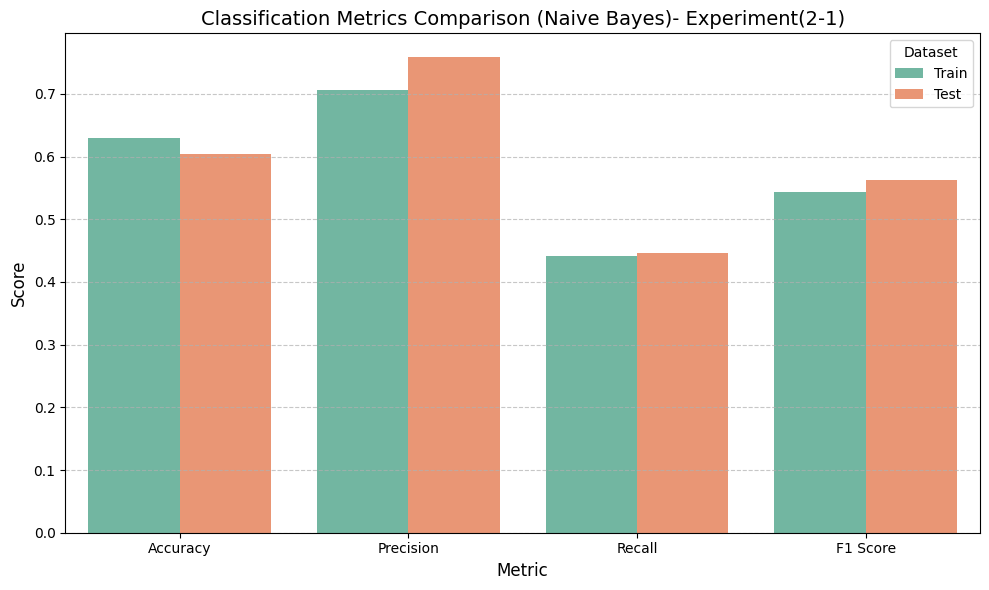

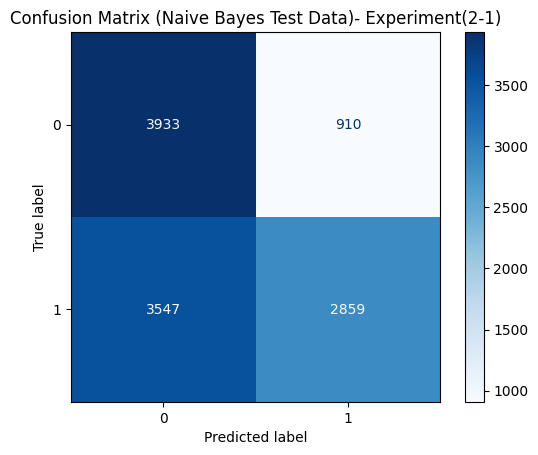

===== Classification Report(Naive Bayes)=====
              precision    recall  f1-score   support

           0       0.53      0.81      0.64      4843
           1       0.76      0.45      0.56      6406

    accuracy                           0.60     11249
   macro avg       0.64      0.63      0.60     11249
weighted avg       0.66      0.60      0.59     11249



In [ ]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_resampled, y_resampled)

y_train_pred_nb = model_nb.predict(X_resampled)
y_test_pred_nb = model_nb.predict(X_test_processed)

train_acc_nb, train_prec_nb, train_rec_nb, train_f1_nb =  classification_metrics(y_resampled, y_train_pred_nb)
test_acc_nb, test_prec_nb, test_rec_nb, test_f1_nb = classification_metrics(y_test, y_test_pred_nb)

print("===== Training Metrics (Naive Bayes) =====")
print(f"Accuracy: {train_acc_nb:.4f}")
print(f"Precision: {train_prec_nb:.4f}")
print(f"Recall: {train_rec_nb:.4f}")
print(f"F1 Score: {train_f1_nb:.4f}")

print("\n===== Testing Metrics (Naive Bayes) =====")
print(f"Accuracy: {test_acc_nb:.4f}")
print(f"Precision: {test_prec_nb:.4f}")
print(f"Recall: {test_rec_nb:.4f}")
print(f"F1 Score: {test_f1_nb:.4f}")

metrics_nb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_nb, train_prec_nb, train_rec_nb, train_f1_nb],
    "Test": [test_acc_nb, test_prec_nb, test_rec_nb, test_f1_nb]
})

metrics_nb_melted = metrics_nb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_nb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (Naive Bayes)- Experiment(2-1)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_nb = confusion_matrix(y_test, y_test_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=model_nb.classes_)
disp_nb.plot(cmap='Blues')
plt.title("Confusion Matrix (Naive Bayes Test Data)- Experiment(2-1)")
plt.show()
print("===== Classification Report(Naive Bayes)=====")
print(classification_report(y_test, y_test_pred_nb))

Support Vector Machine (SVM)

===== Training Metrics (SVM) =====
Accuracy: 0.6424
Precision: 0.7556
Recall: 0.4210
F1 Score: 0.5407

===== Testing Metrics (SVM) =====
Accuracy: 0.6096
Precision: 0.7962
Recall: 0.4226
F1 Score: 0.5521


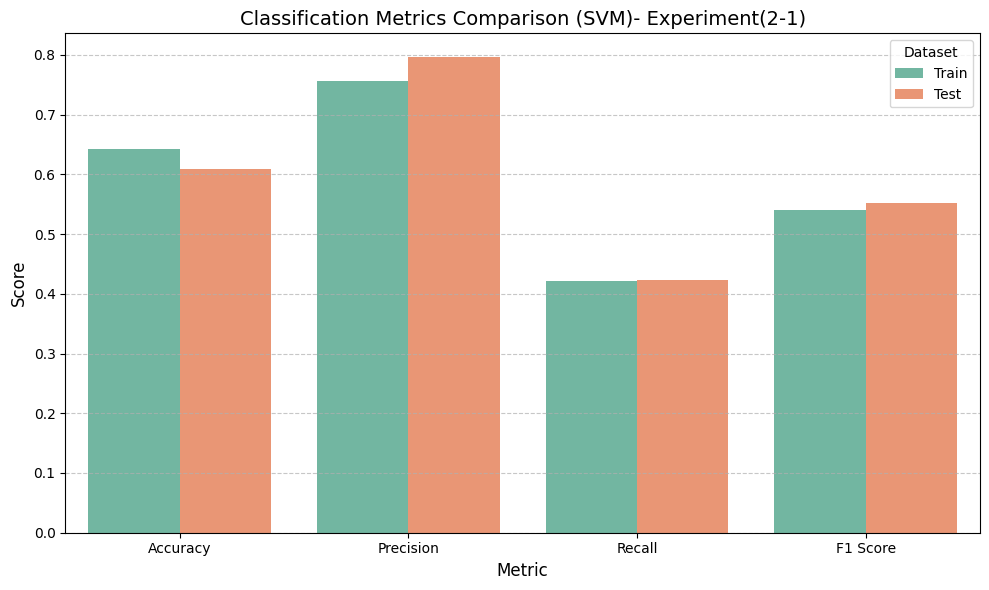

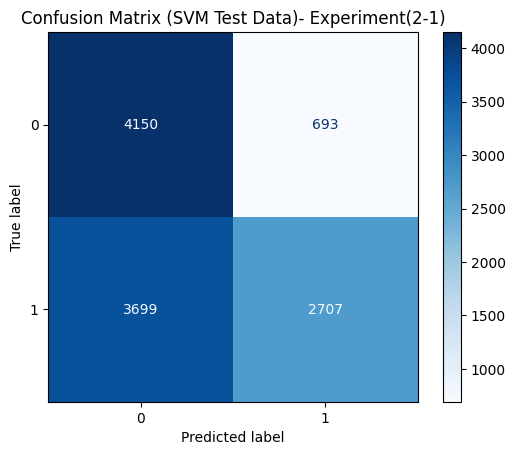

===== Classification Report(SVM)=====
              precision    recall  f1-score   support

           0       0.53      0.86      0.65      4843
           1       0.80      0.42      0.55      6406

    accuracy                           0.61     11249
   macro avg       0.66      0.64      0.60     11249
weighted avg       0.68      0.61      0.60     11249



In [ ]:
from sklearn.svm import SVC

model_svm = SVC(random_state=42, probability=True)
model_svm.fit(X_resampled, y_resampled)

y_train_pred_svm = model_svm.predict(X_resampled)
y_test_pred_svm = model_svm.predict(X_test_processed)

train_acc_svm, train_prec_svm, train_rec_svm, train_f1_svm = classification_metrics(y_resampled, y_train_pred_svm)
test_acc_svm, test_prec_svm, test_rec_svm, test_f1_svm = classification_metrics(y_test, y_test_pred_svm)

print("===== Training Metrics (SVM) =====")
print(f"Accuracy: {train_acc_svm:.4f}")
print(f"Precision: {train_prec_svm:.4f}")
print(f"Recall: {train_rec_svm:.4f}")
print(f"F1 Score: {train_f1_svm:.4f}")

print("\n===== Testing Metrics (SVM) =====")
print(f"Accuracy: {test_acc_svm:.4f}")
print(f"Precision: {test_prec_svm:.4f}")
print(f"Recall: {test_rec_svm:.4f}")
print(f"F1 Score: {test_f1_svm:.4f}")

metrics_svm = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_svm, train_prec_svm, train_rec_svm, train_f1_svm],
    "Test": [test_acc_svm, test_prec_svm, test_rec_svm, test_f1_svm]
})

metrics_svm_melted = metrics_svm.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_svm_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (SVM)- Experiment(2-1)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_svm = confusion_matrix(y_test, y_test_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=model_svm.classes_)
disp_svm.plot(cmap='Blues')
plt.title("Confusion Matrix (SVM Test Data)- Experiment(2-1)")
plt.show()
print("===== Classification Report(SVM)=====")
print(classification_report(y_test, y_test_pred_svm))

After applying feature selection using the H2OGradientBoostingEstimator algorithm, we observed a noticeable degradation in the performance of all classification models. The F1 scores dropped significantly and became nearly identical across different models (~0.413), which strongly indicates that the selected features were insufficient for effectively distinguishing between the target classes.


A likely reason for this is that the algorithm selected a limited and non-representative subset of features, leading to the loss of critical information relevant to classification. Moreover, H2O converts the data into its own internal format (H2OFrame), which might have affected the data representation quality due to automatic processing steps such as categorical encoding or missing value handling.


As a result, we decided to adopt an alternative and more transparent feature selection method based on feature importance extracted from the XGBoost model. In this approach, the importance of each feature is measured by its actual contribution to improving model performance (using metrics such as Gain and Cover). This technique provided better insights into the relationship between features and the target variable, and ultimately led to improved performance across the models.



Experiment(2-2)

In [ ]:
y_train_xgb = y_train.replace({1: 0, 2: 1})
y_test_xgb = y_test.replace({1: 0, 2: 1})

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:39:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x800 with 0 Axes>

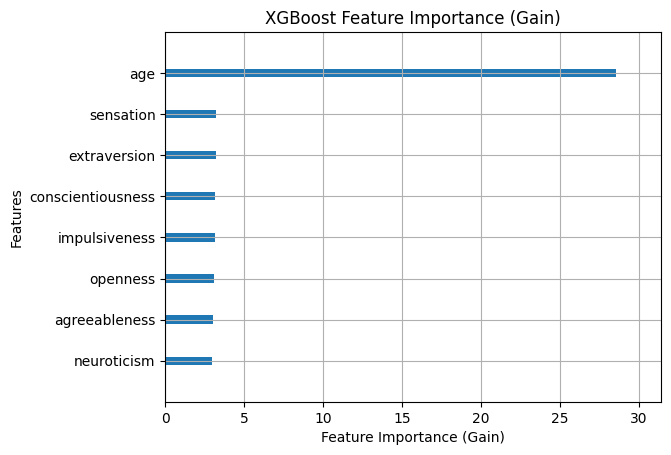

Feature Importances (Gain):
age: 28.5666
sensation: 3.2015
extraversion: 3.1868
conscientiousness: 3.1349
impulsiveness: 3.1278
openness: 3.1152
agreeableness: 3.0068
neuroticism: 2.9435


In [ ]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost import plot_importance



model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train_xgb)


plt.figure(figsize=(10, 8))
plot_importance(model_xgb, max_num_features=20, importance_type='gain', xlabel='Feature Importance (Gain)', ylabel='Features', show_values=False)
plt.title("XGBoost Feature Importance (Gain)")
plt.show()


feature_importances = model_xgb.get_booster().get_score(importance_type='gain')
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

print("Feature Importances (Gain):")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")



Feature Importance Analysis and Decision on Feature Selection Approach

The feature importance scores obtained from the XGBoost classifier using the ‘gain’ metric revealed a clear ranking of predictive variables, with features such as age, sensation, and extraversion showing the highest contribution to the model’s performance. These results align closely with the importance patterns observed previously using the H2OGradientBoostingEstimator, confirming the consistency and reliability of these features in explaining the variance in the target variable.

Given the similarity in feature importance rankings between XGBoost and H2O, it was deemed unnecessary to continue with the fully manuall feature elimination process, which in prior attempts led to degraded model performance. Instead, a more controlled and interpretable manual feature selection approach was adopted, focusing on the top five most important features identified by XGBoost.


This strategy aims to balance dimensionality reduction and model interpretability while preserving critical predictive information, ultimately enhancing the model’s F1 Score and ensuring a better balance between precision and recall.


Experiment(2-2)
USING: ['age', 'conscientiousness', 'extraversion', 'neuroticism', 'openness']

In [ ]:
top_5_features = ['age', 'conscientiousness', 'extraversion', 'neuroticism', 'openness']

#1. Extract only topfeatures
X_train_top = X_train[top_5_features].copy()
X_test_top= X_test[top_5_features].copy()


#2. Create and process pipeline
pipeline = Pipeline([
    ('winsorizer', Winsorizer(factor=1.5)),
    ('scaler', MinMaxScaler())
])
pipeline.fit(X_train_top)

X_train_processed = pipeline.transform(X_train_top)
X_test_processed = pipeline.transform(X_test_top)
#3. SMOTE on processed data only (topfeatures only)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)
with open("pipeline3.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("Pipeline saved successfully.")

Pipeline saved successfully.


LogisticRegression

===== Training Metrics(EXP2-1) =====
Accuracy: 0.6058
Precision: 0.6306
Recall: 0.5108
F1 Score: 0.5644

===== Testing Metrics(EXP2-1)  =====
Accuracy: 0.5884
Precision: 0.6859
Recall: 0.5116
F1 Score: 0.5860


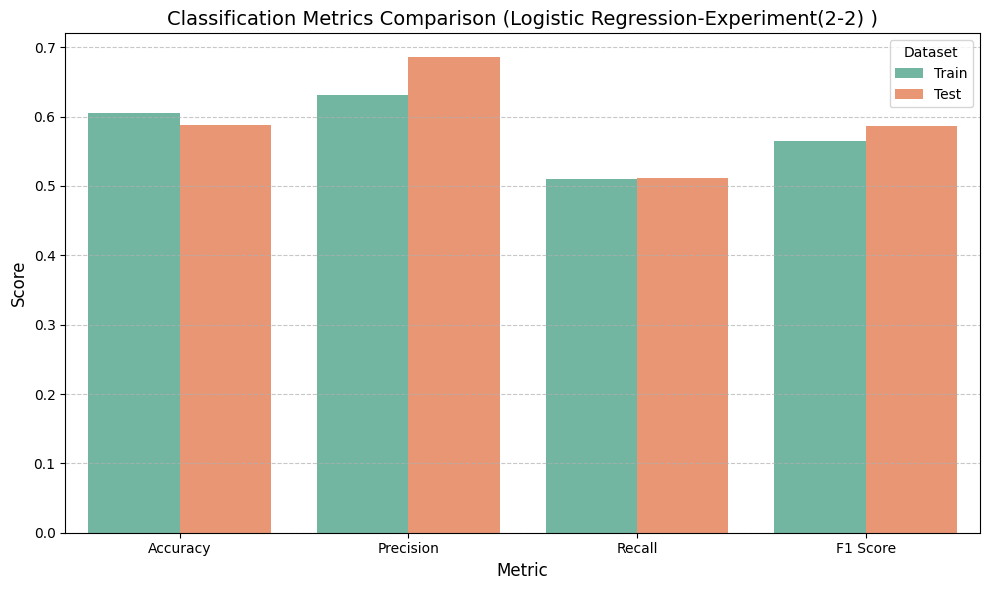

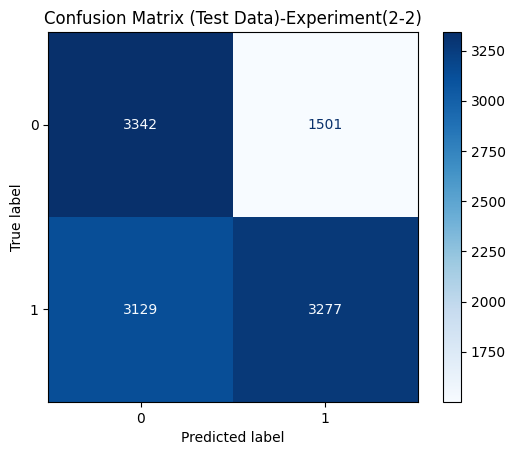

===== Classification Report(LogisticRegression)=====
              precision    recall  f1-score   support

           0       0.52      0.69      0.59      4843
           1       0.69      0.51      0.59      6406

    accuracy                           0.59     11249
   macro avg       0.60      0.60      0.59     11249
weighted avg       0.61      0.59      0.59     11249



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split




model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_resampled, y_resampled)


y_train_pred = model.predict(X_resampled)
y_test_pred = model.predict(X_test_processed)


def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1

train_acc, train_prec, train_rec, train_f1 = classification_metrics(y_resampled, y_train_pred)
test_acc, test_prec, test_rec, test_f1 = classification_metrics(y_test, y_test_pred)


print("===== Training Metrics(EXP2-1) =====")
print(f"Accuracy: {train_acc:.4f}")
print(f"Precision: {train_prec:.4f}")
print(f"Recall: {train_rec:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\n===== Testing Metrics(EXP2-1)  =====")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall: {test_rec:.4f}")
print(f"F1 Score: {test_f1:.4f}")


metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc, train_prec, train_rec, train_f1],
    "Test": [test_acc, test_prec, test_rec, test_f1]
})

metrics_df_melted = metrics_df.melt(id_vars="Metric", var_name="Dataset", value_name="Value")


plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (Logistic Regression-Experiment(2-2) )", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()


cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Data)-Experiment(2-2)")
plt.show()
print("===== Classification Report(LogisticRegression)=====")
print(classification_report(y_test, y_test_pred))

DecisionTreeClassifier

===== Training Metrics (Decision Tree) =====
Accuracy: 0.9996
Precision: 1.0000
Recall: 0.9992
F1 Score: 0.9996

===== Testing Metrics (Decision Tree) =====
Accuracy: 0.5638
Precision: 0.6165
Recall: 0.6190
F1 Score: 0.6177


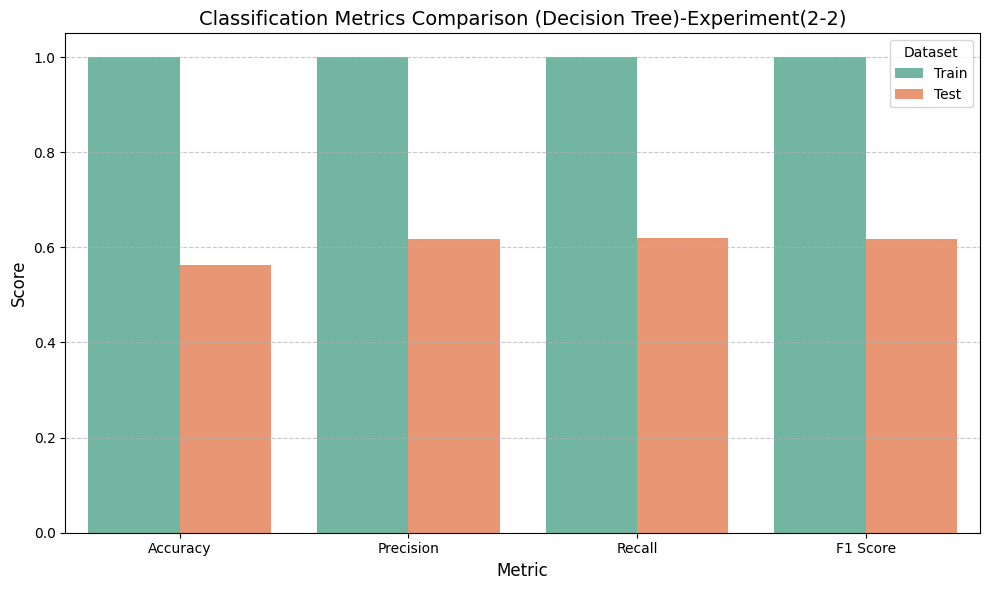

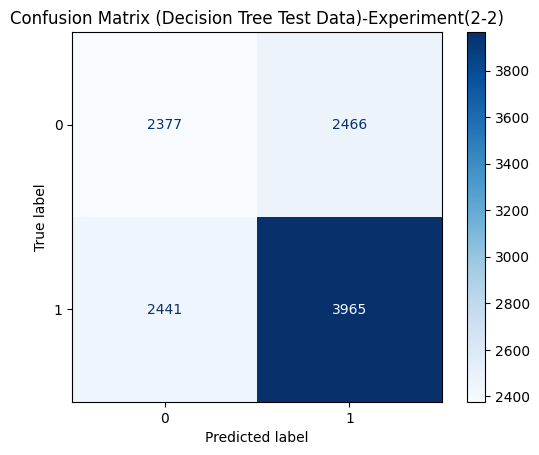

===== Classification Report (Decision Tree) =====
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      4843
           1       0.62      0.62      0.62      6406

    accuracy                           0.56     11249
   macro avg       0.55      0.55      0.55     11249
weighted avg       0.56      0.56      0.56     11249



In [ ]:
from sklearn.tree import DecisionTreeClassifier


model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_resampled, y_resampled)


y_train_pred_dt = model_dt.predict(X_resampled)
y_test_pred_dt = model_dt.predict(X_test_processed)


train_acc_dt, train_prec_dt, train_rec_dt, train_f1_dt = classification_metrics(y_resampled, y_train_pred_dt)
test_acc_dt, test_prec_dt, test_rec_dt, test_f1_dt = classification_metrics(y_test, y_test_pred_dt)

print("===== Training Metrics (Decision Tree) =====")
print(f"Accuracy: {train_acc_dt:.4f}")
print(f"Precision: {train_prec_dt:.4f}")
print(f"Recall: {train_rec_dt:.4f}")
print(f"F1 Score: {train_f1_dt:.4f}")

print("\n===== Testing Metrics (Decision Tree) =====")
print(f"Accuracy: {test_acc_dt:.4f}")
print(f"Precision: {test_prec_dt:.4f}")
print(f"Recall: {test_rec_dt:.4f}")
print(f"F1 Score: {test_f1_dt:.4f}")


metrics_dt = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_dt, train_prec_dt, train_rec_dt, train_f1_dt],
    "Test": [test_acc_dt, test_prec_dt, test_rec_dt, test_f1_dt]
})

metrics_dt_melted = metrics_dt.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_dt_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (Decision Tree)-Experiment(2-2)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_dt = confusion_matrix(y_test, y_test_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=model_dt.classes_)
disp_dt.plot(cmap='Blues')
plt.title("Confusion Matrix (Decision Tree Test Data)-Experiment(2-2)")
plt.show()
print("===== Classification Report (Decision Tree) =====")
print(classification_report(y_test, y_test_pred_dt))

RandomForestClassifier


===== Training Metrics (Random Forest) =====
Accuracy: 0.9996
Precision: 0.9995
Recall: 0.9997
F1 Score: 0.9996

===== Testing Metrics (Random Forest) =====
Accuracy: 0.6025
Precision: 0.6613
Recall: 0.6191
F1 Score: 0.6395


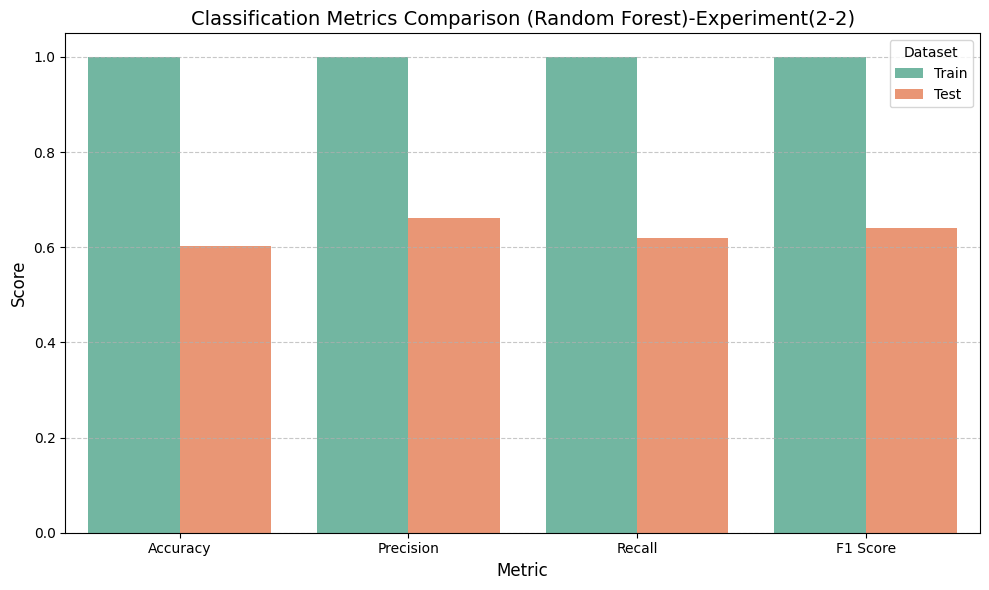

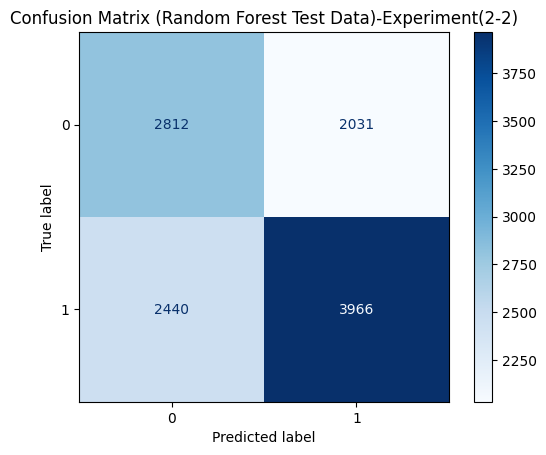

===== Classification Report(Random Forest) =====
              precision    recall  f1-score   support

           0       0.54      0.58      0.56      4843
           1       0.66      0.62      0.64      6406

    accuracy                           0.60     11249
   macro avg       0.60      0.60      0.60     11249
weighted avg       0.61      0.60      0.60     11249



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_resampled, y_resampled)

y_train_pred_rf = model_rf.predict(X_resampled)
y_test_pred_rf = model_rf.predict(X_test_processed)

train_acc_rf, train_prec_rf, train_rec_rf, train_f1_rf = classification_metrics(y_resampled, y_train_pred_rf)
test_acc_rf, test_prec_rf, test_rec_rf, test_f1_rf = classification_metrics(y_test, y_test_pred_rf)

print("===== Training Metrics (Random Forest) =====")
print(f"Accuracy: {train_acc_rf:.4f}")
print(f"Precision: {train_prec_rf:.4f}")
print(f"Recall: {train_rec_rf:.4f}")
print(f"F1 Score: {train_f1_rf:.4f}")

print("\n===== Testing Metrics (Random Forest) =====")
print(f"Accuracy: {test_acc_rf:.4f}")
print(f"Precision: {test_prec_rf:.4f}")
print(f"Recall: {test_rec_rf:.4f}")
print(f"F1 Score: {test_f1_rf:.4f}")

metrics_rf = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_rf, train_prec_rf, train_rec_rf, train_f1_rf],
    "Test": [test_acc_rf, test_prec_rf, test_rec_rf, test_f1_rf]
})

metrics_rf_melted = metrics_rf.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_rf_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (Random Forest)-Experiment(2-2)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_rf = confusion_matrix(y_test, y_test_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model_rf.classes_)
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix (Random Forest Test Data)-Experiment(2-2)")
plt.show()
print("===== Classification Report(Random Forest) =====")
print(classification_report(y_test, y_test_pred_rf))

GradientBoostingClassifier


===== Training Metrics (Gradient Boosting) =====
Accuracy: 0.6694
Precision: 0.7682
Recall: 0.4853
F1 Score: 0.5948

===== Testing Metrics (Gradient Boosting) =====
Accuracy: 0.6353
Precision: 0.7865
Recall: 0.4934
F1 Score: 0.6064


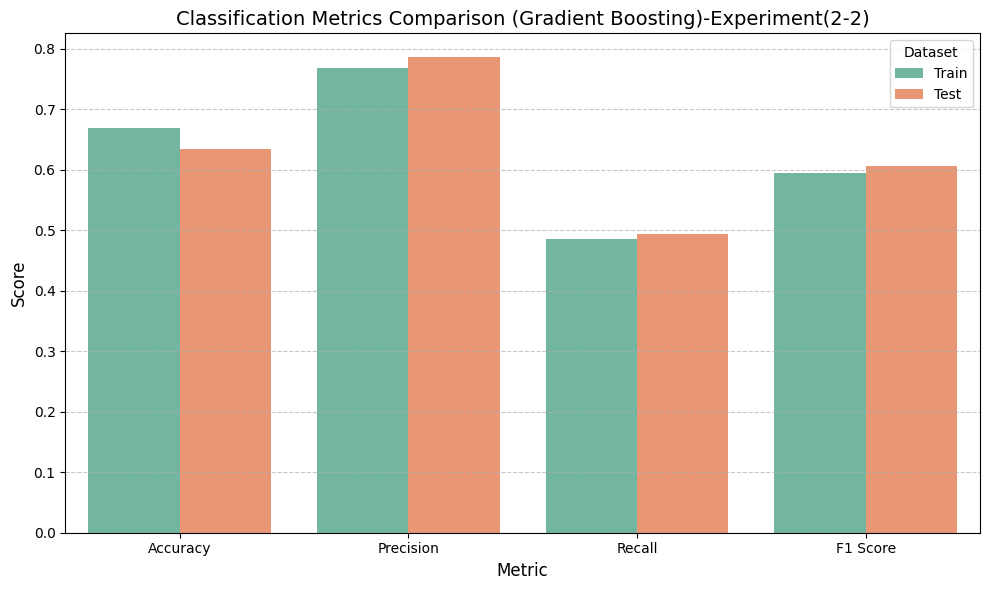

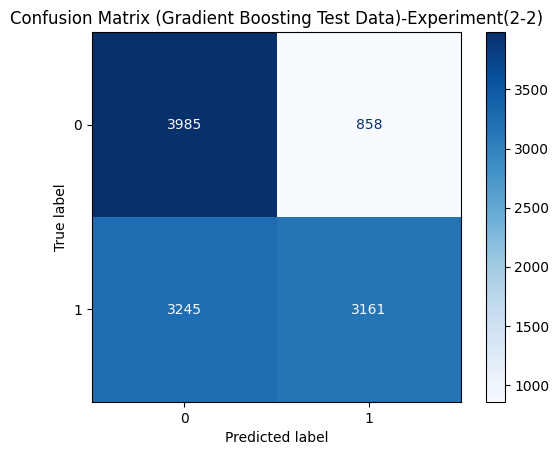

===== Classification Report (Gradient Boosting) =====
              precision    recall  f1-score   support

           0       0.55      0.82      0.66      4843
           1       0.79      0.49      0.61      6406

    accuracy                           0.64     11249
   macro avg       0.67      0.66      0.63     11249
weighted avg       0.69      0.64      0.63     11249



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_resampled, y_resampled)

y_train_pred_gb = model_gb.predict(X_resampled)
y_test_pred_gb = model_gb.predict(X_test_processed)

train_acc_gb, train_prec_gb, train_rec_gb, train_f1_gb = classification_metrics(y_resampled, y_train_pred_gb)
test_acc_gb, test_prec_gb, test_rec_gb, test_f1_gb = classification_metrics(y_test, y_test_pred_gb)

print("===== Training Metrics (Gradient Boosting) =====")
print(f"Accuracy: {train_acc_gb:.4f}")
print(f"Precision: {train_prec_gb:.4f}")
print(f"Recall: {train_rec_gb:.4f}")
print(f"F1 Score: {train_f1_gb:.4f}")

print("\n===== Testing Metrics (Gradient Boosting) =====")
print(f"Accuracy: {test_acc_gb:.4f}")
print(f"Precision: {test_prec_gb:.4f}")
print(f"Recall: {test_rec_gb:.4f}")
print(f"F1 Score: {test_f1_gb:.4f}")

metrics_gb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_gb, train_prec_gb, train_rec_gb, train_f1_gb],
    "Test": [test_acc_gb, test_prec_gb, test_rec_gb, test_f1_gb]
})

metrics_gb_melted = metrics_gb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_gb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (Gradient Boosting)-Experiment(2-2)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_gb = confusion_matrix(y_test, y_test_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=model_gb.classes_)
disp_gb.plot(cmap='Blues')
plt.title("Confusion Matrix (Gradient Boosting Test Data)-Experiment(2-2)")
plt.show()
print("===== Classification Report (Gradient Boosting) =====")
print(classification_report(y_test, y_test_pred_gb))

 XGBClassifier

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


===== Training Metrics (XGBoost) =====
Accuracy: 0.7287
Precision: 0.7749
Recall: 0.6445
F1 Score: 0.7037

===== Testing Metrics (XGBoost) =====
Accuracy: 0.6259
Precision: 0.7064
Recall: 0.5871
F1 Score: 0.6413


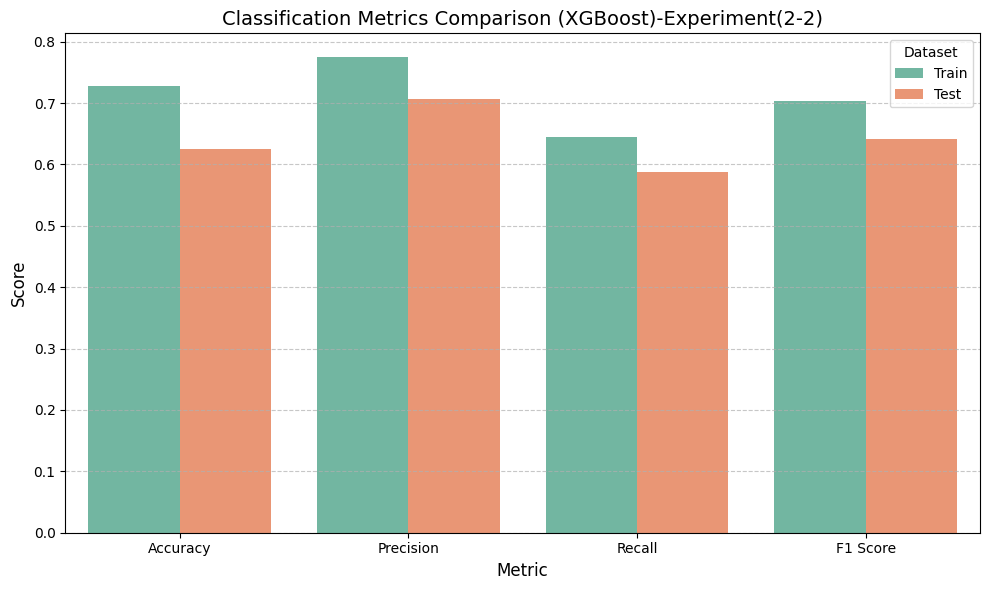

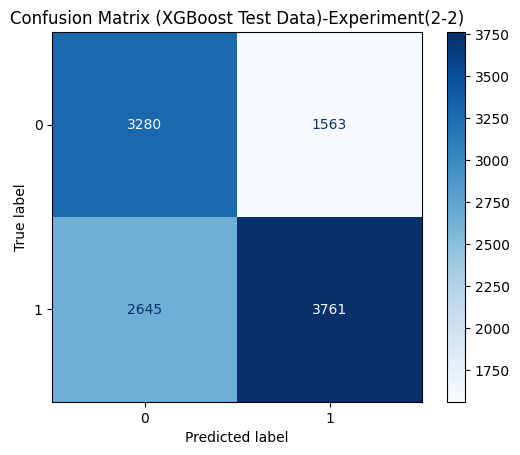

===== Classification Report (XGBoost)  =====
              precision    recall  f1-score   support

           0       0.55      0.68      0.61      4843
           1       0.71      0.59      0.64      6406

    accuracy                           0.63     11249
   macro avg       0.63      0.63      0.63     11249
weighted avg       0.64      0.63      0.63     11249



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split






def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1


model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_resampled, y_resampled)


y_train_pred_xgb = model_xgb.predict(X_resampled)
y_test_pred_xgb = model_xgb.predict(X_test_processed)


train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb = classification_metrics(y_resampled, y_train_pred_xgb)
test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb = classification_metrics(y_test, y_test_pred_xgb)


print("===== Training Metrics (XGBoost) =====")
print(f"Accuracy: {train_acc_xgb:.4f}")
print(f"Precision: {train_prec_xgb:.4f}")
print(f"Recall: {train_rec_xgb:.4f}")
print(f"F1 Score: {train_f1_xgb:.4f}")

print("\n===== Testing Metrics (XGBoost) =====")
print(f"Accuracy: {test_acc_xgb:.4f}")
print(f"Precision: {test_prec_xgb:.4f}")
print(f"Recall: {test_rec_xgb:.4f}")
print(f"F1 Score: {test_f1_xgb:.4f}")


metrics_xgb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb],
    "Test": [test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb]
})

metrics_xgb_melted = metrics_xgb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_xgb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (XGBoost)-Experiment(2-2)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()


cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=model_xgb.classes_)
disp_xgb.plot(cmap='Blues')
plt.title("Confusion Matrix (XGBoost Test Data)-Experiment(2-2)")
plt.show()
print("===== Classification Report (XGBoost)  =====")
print(classification_report(y_test, y_test_pred_xgb))

LGBMClassifier

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 25625, number of negative: 25625
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 51250, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


===== Training Metrics (LightGBM) =====
Accuracy: 0.6855
Precision: 0.7681
Recall: 0.5314
F1 Score: 0.6282

===== Testing Metrics (LightGBM) =====
Accuracy: 0.6321
Precision: 0.7591
Recall: 0.5186
F1 Score: 0.6162


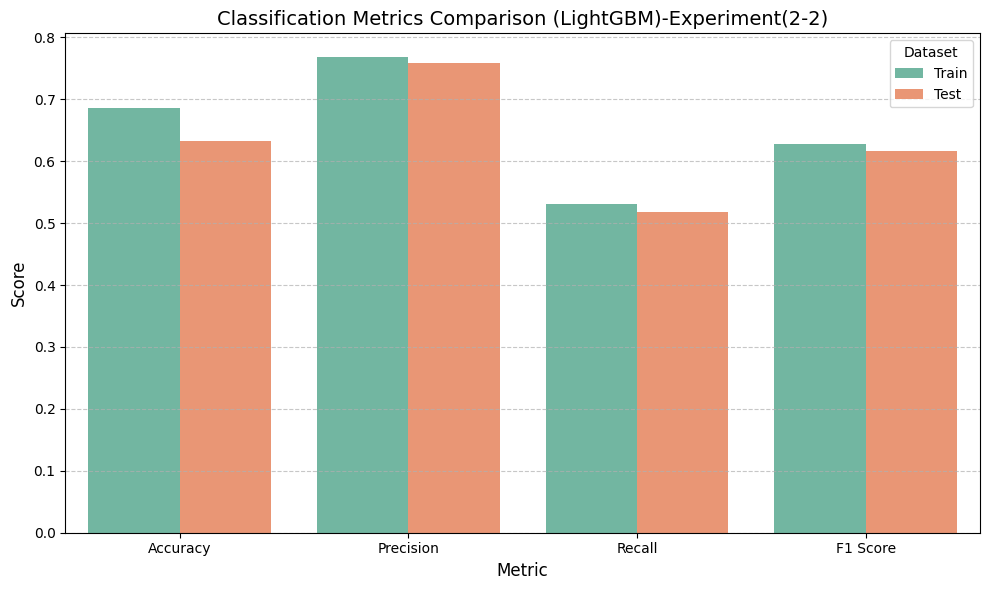

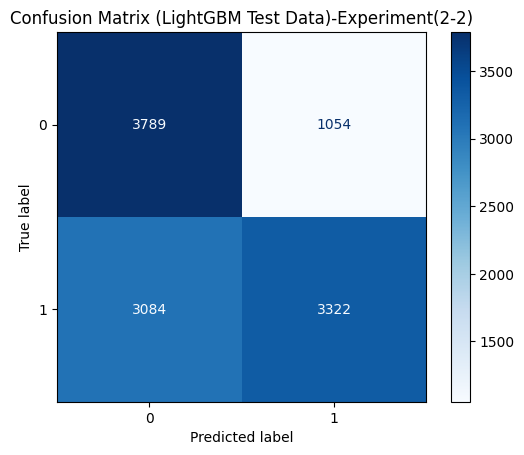

===== Classification Report (LightGBM) =====
              precision    recall  f1-score   support

           0       0.55      0.78      0.65      4843
           1       0.76      0.52      0.62      6406

    accuracy                           0.63     11249
   macro avg       0.66      0.65      0.63     11249
weighted avg       0.67      0.63      0.63     11249



In [ ]:
from lightgbm import LGBMClassifier

model_lgb = LGBMClassifier(random_state=42)
model_lgb.fit(X_resampled, y_resampled)

y_train_pred_lgb = model_lgb.predict(X_resampled)
y_test_pred_lgb = model_lgb.predict(X_test_processed)

train_acc_lgb, train_prec_lgb, train_rec_lgb, train_f1_lgb =classification_metrics(y_resampled, y_train_pred_lgb)
test_acc_lgb, test_prec_lgb, test_rec_lgb, test_f1_lgb = classification_metrics(y_test, y_test_pred_lgb)

print("===== Training Metrics (LightGBM) =====")
print(f"Accuracy: {train_acc_lgb:.4f}")
print(f"Precision: {train_prec_lgb:.4f}")
print(f"Recall: {train_rec_lgb:.4f}")
print(f"F1 Score: {train_f1_lgb:.4f}")

print("\n===== Testing Metrics (LightGBM) =====")
print(f"Accuracy: {test_acc_lgb:.4f}")
print(f"Precision: {test_prec_lgb:.4f}")
print(f"Recall: {test_rec_lgb:.4f}")
print(f"F1 Score: {test_f1_lgb:.4f}")

metrics_lgb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_lgb, train_prec_lgb, train_rec_lgb, train_f1_lgb],
    "Test": [test_acc_lgb, test_prec_lgb, test_rec_lgb, test_f1_lgb]
})

metrics_lgb_melted = metrics_lgb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_lgb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (LightGBM)-Experiment(2-2)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_lgb = confusion_matrix(y_test, y_test_pred_lgb)
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=model_lgb.classes_)
disp_lgb.plot(cmap='Blues')
plt.title("Confusion Matrix (LightGBM Test Data)-Experiment(2-2)")
plt.show()
print("===== Classification Report (LightGBM) =====")
print(classification_report(y_test, y_test_pred_lgb))

catboost

===== Training Metrics (CatBoost) =====
Accuracy: 0.7132
Precision: 0.7777
Recall: 0.5971
F1 Score: 0.6755

===== Testing Metrics (CatBoost) =====
Accuracy: 0.6306
Precision: 0.7292
Recall: 0.5590
F1 Score: 0.6329


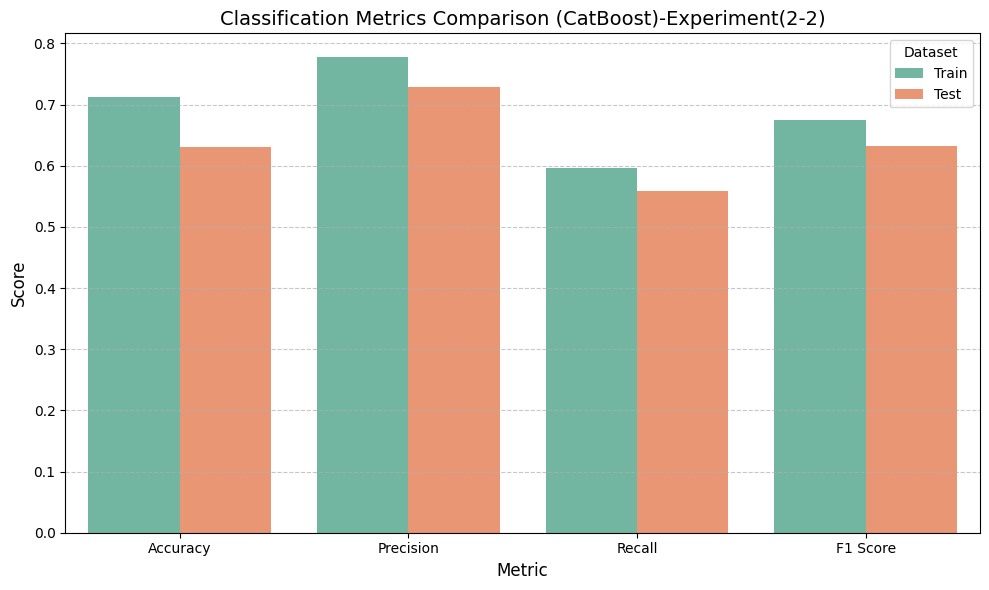

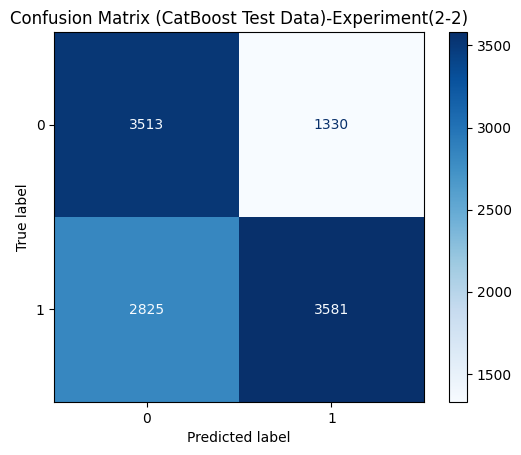

===== Classification Report (CatBoost)=====
              precision    recall  f1-score   support

           0       0.55      0.73      0.63      4843
           1       0.73      0.56      0.63      6406

    accuracy                           0.63     11249
   macro avg       0.64      0.64      0.63     11249
weighted avg       0.65      0.63      0.63     11249



In [ ]:
from catboost import CatBoostClassifier

model_cb = CatBoostClassifier(random_state=42, verbose=0)
model_cb.fit(X_resampled, y_resampled)

y_train_pred_cb = model_cb.predict(X_resampled)
y_test_pred_cb = model_cb.predict(X_test_processed)


train_acc_cb, train_prec_cb, train_rec_cb, train_f1_cb = classification_metrics(y_resampled, y_train_pred_cb)
test_acc_cb, test_prec_cb, test_rec_cb, test_f1_cb = classification_metrics(y_test, y_test_pred_cb)

print("===== Training Metrics (CatBoost) =====")
print(f"Accuracy: {train_acc_cb:.4f}")
print(f"Precision: {train_prec_cb:.4f}")
print(f"Recall: {train_rec_cb:.4f}")
print(f"F1 Score: {train_f1_cb:.4f}")

print("\n===== Testing Metrics (CatBoost) =====")
print(f"Accuracy: {test_acc_cb:.4f}")
print(f"Precision: {test_prec_cb:.4f}")
print(f"Recall: {test_rec_cb:.4f}")
print(f"F1 Score: {test_f1_cb:.4f}")

metrics_cb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_cb, train_prec_cb, train_rec_cb, train_f1_cb],
    "Test": [test_acc_cb, test_prec_cb, test_rec_cb, test_f1_cb]
})

metrics_cb_melted = metrics_cb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_cb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (CatBoost)-Experiment(2-2)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_cb = confusion_matrix(y_test, y_test_pred_cb)
disp_cb = ConfusionMatrixDisplay(confusion_matrix=cm_cb, display_labels=model_cb.classes_)
disp_cb.plot(cmap='Blues')
plt.title("Confusion Matrix (CatBoost Test Data)-Experiment(2-2)")
plt.show()
print("===== Classification Report (CatBoost)=====")
print(classification_report(y_test, y_test_pred_cb))

KNeighborsClassifier

===== Training Metrics (KNN) =====
Accuracy: 0.7655
Precision: 0.8061
Recall: 0.6992
F1 Score: 0.7489

===== Testing Metrics (KNN) =====
Accuracy: 0.5817
Precision: 0.6524
Recall: 0.5682
F1 Score: 0.6074


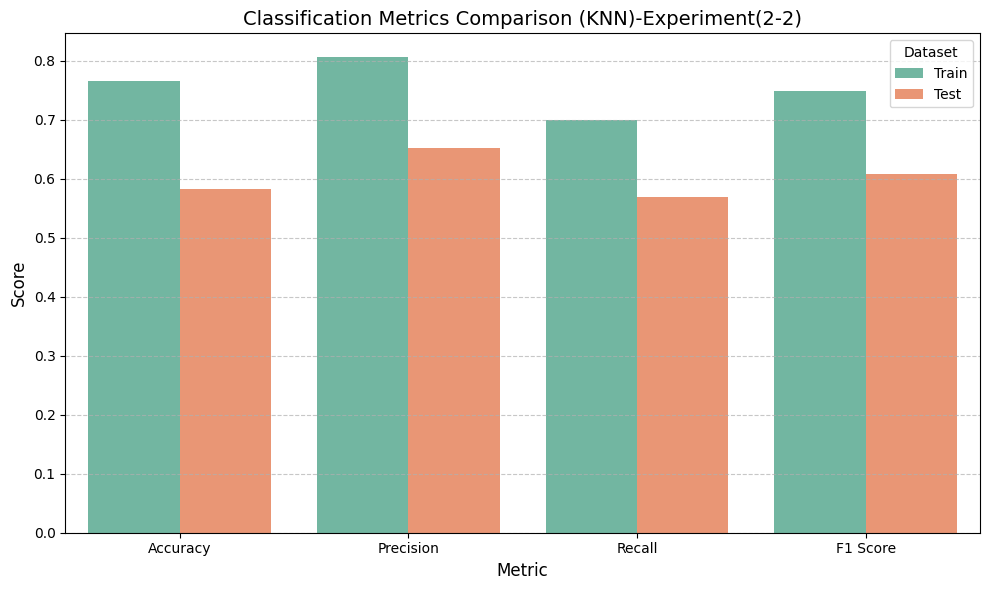

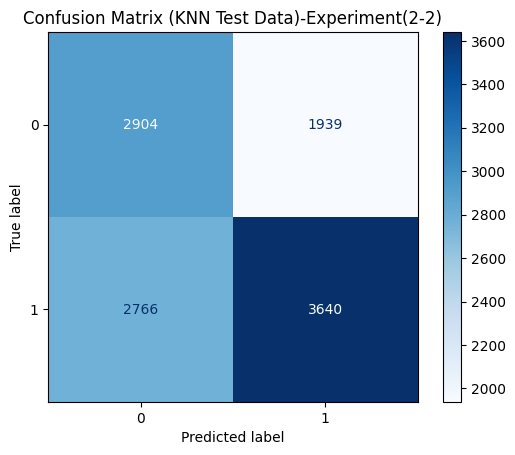

===== Classification Report (KNN)=====
              precision    recall  f1-score   support

           0       0.51      0.60      0.55      4843
           1       0.65      0.57      0.61      6406

    accuracy                           0.58     11249
   macro avg       0.58      0.58      0.58     11249
weighted avg       0.59      0.58      0.58     11249



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_resampled, y_resampled)


y_train_pred_knn = model_knn.predict(X_resampled)
y_test_pred_knn = model_knn.predict(X_test_processed)

train_acc_knn, train_prec_knn, train_rec_knn, train_f1_knn = classification_metrics(y_resampled, y_train_pred_knn)
test_acc_knn, test_prec_knn, test_rec_knn, test_f1_knn = classification_metrics(y_test, y_test_pred_knn)

print("===== Training Metrics (KNN) =====")
print(f"Accuracy: {train_acc_knn:.4f}")
print(f"Precision: {train_prec_knn:.4f}")
print(f"Recall: {train_rec_knn:.4f}")
print(f"F1 Score: {train_f1_knn:.4f}")

print("\n===== Testing Metrics (KNN) =====")
print(f"Accuracy: {test_acc_knn:.4f}")
print(f"Precision: {test_prec_knn:.4f}")
print(f"Recall: {test_rec_knn:.4f}")
print(f"F1 Score: {test_f1_knn:.4f}")

metrics_knn = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_knn, train_prec_knn, train_rec_knn, train_f1_knn],
    "Test": [test_acc_knn, test_prec_knn, test_rec_knn, test_f1_knn]
})

metrics_knn_melted = metrics_knn.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_knn_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (KNN)-Experiment(2-2)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_knn = confusion_matrix(y_test, y_test_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=model_knn.classes_)
disp_knn.plot(cmap='Blues')
plt.title("Confusion Matrix (KNN Test Data)-Experiment(2-2)")
plt.show()
print("===== Classification Report (KNN)=====")
print(classification_report(y_test, y_test_pred_knn))

 GaussianNB

===== Training Metrics (Naive Bayes) =====
Accuracy: 0.6281
Precision: 0.7044
Recall: 0.4415
F1 Score: 0.5428

===== Testing Metrics (Naive Bayes) =====
Accuracy: 0.6038
Precision: 0.7586
Recall: 0.4463
F1 Score: 0.5620


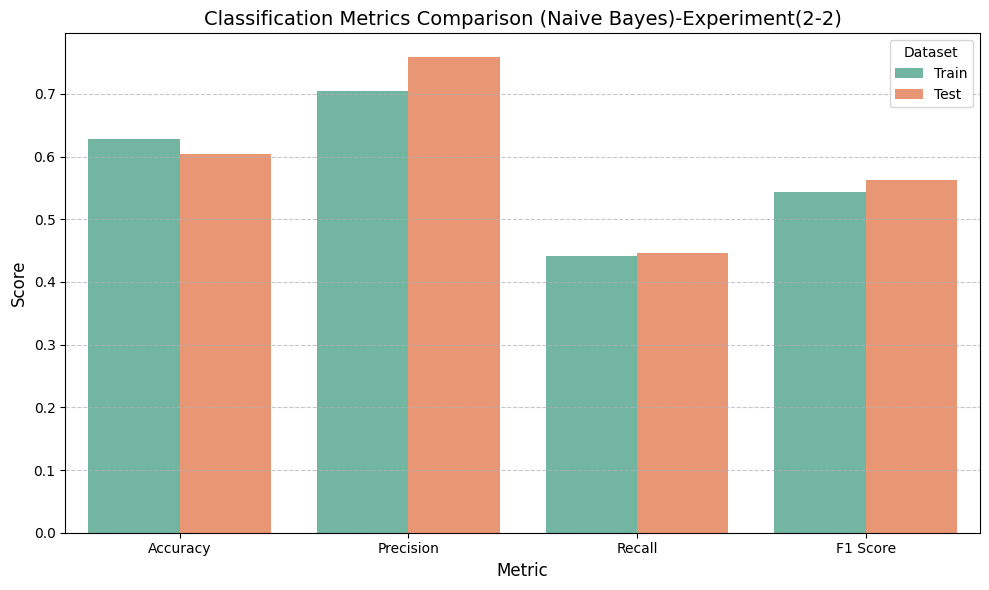

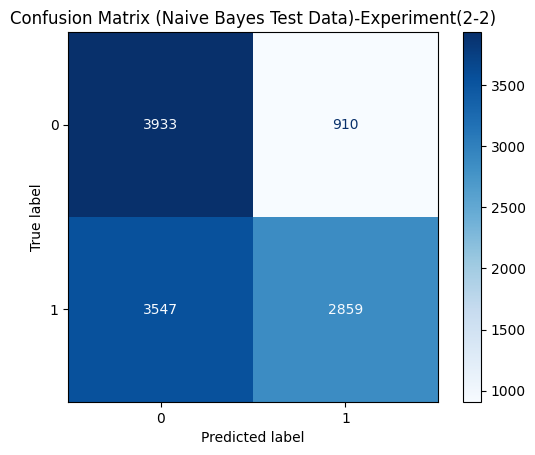

===== Classification Report (Naive Bayes)=====
              precision    recall  f1-score   support

           0       0.53      0.81      0.64      4843
           1       0.76      0.45      0.56      6406

    accuracy                           0.60     11249
   macro avg       0.64      0.63      0.60     11249
weighted avg       0.66      0.60      0.59     11249



In [ ]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_resampled, y_resampled)

y_train_pred_nb = model_nb.predict(X_resampled)
y_test_pred_nb = model_nb.predict(X_test_processed)

train_acc_nb, train_prec_nb, train_rec_nb, train_f1_nb = classification_metrics(y_resampled, y_train_pred_nb)
test_acc_nb, test_prec_nb, test_rec_nb, test_f1_nb = classification_metrics(y_test, y_test_pred_nb)

print("===== Training Metrics (Naive Bayes) =====")
print(f"Accuracy: {train_acc_nb:.4f}")
print(f"Precision: {train_prec_nb:.4f}")
print(f"Recall: {train_rec_nb:.4f}")
print(f"F1 Score: {train_f1_nb:.4f}")

print("\n===== Testing Metrics (Naive Bayes) =====")
print(f"Accuracy: {test_acc_nb:.4f}")
print(f"Precision: {test_prec_nb:.4f}")
print(f"Recall: {test_rec_nb:.4f}")
print(f"F1 Score: {test_f1_nb:.4f}")

metrics_nb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_nb, train_prec_nb, train_rec_nb, train_f1_nb],
    "Test": [test_acc_nb, test_prec_nb, test_rec_nb, test_f1_nb]
})

metrics_nb_melted = metrics_nb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_nb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (Naive Bayes)-Experiment(2-2)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_nb = confusion_matrix(y_test, y_test_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=model_nb.classes_)
disp_nb.plot(cmap='Blues')
plt.title("Confusion Matrix (Naive Bayes Test Data)-Experiment(2-2)")
plt.show()
print("===== Classification Report (Naive Bayes)=====")
print(classification_report(y_test, y_test_pred_nb))

SVC

===== Training Metrics (SVM) =====
Accuracy: 0.6375
Precision: 0.7376
Recall: 0.4268
F1 Score: 0.5407

===== Testing Metrics (SVM) =====
Accuracy: 0.6100
Precision: 0.7882
Recall: 0.4310
F1 Score: 0.5573


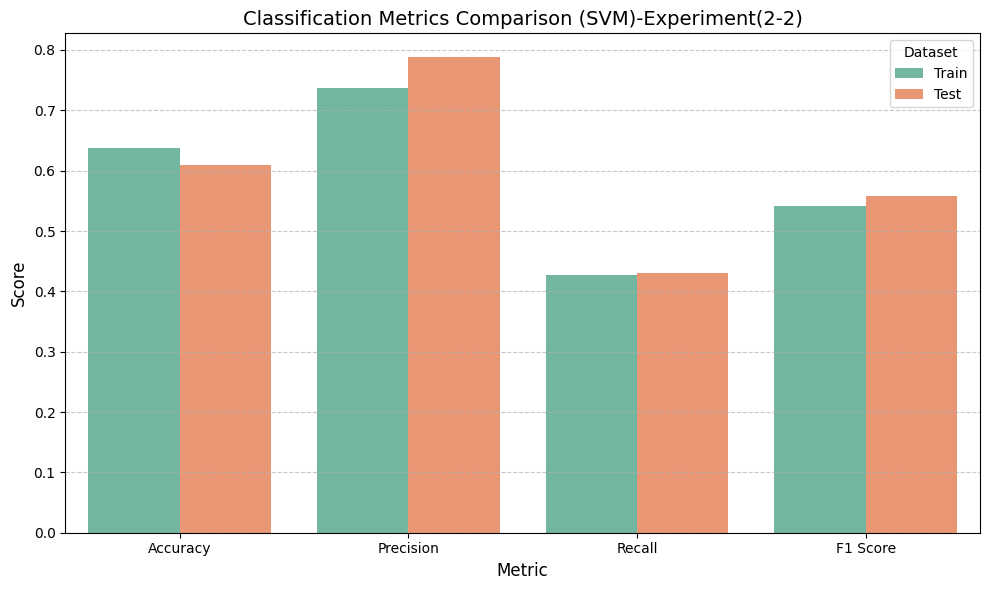

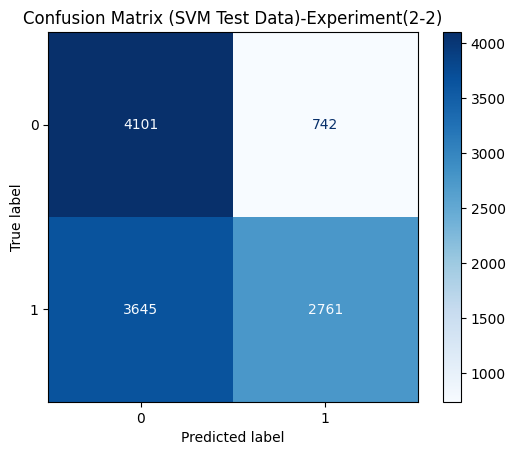

===== Classification Report (SVM)=====
              precision    recall  f1-score   support

           0       0.53      0.85      0.65      4843
           1       0.79      0.43      0.56      6406

    accuracy                           0.61     11249
   macro avg       0.66      0.64      0.60     11249
weighted avg       0.68      0.61      0.60     11249



In [ ]:
from sklearn.svm import SVC

model_svm = SVC(random_state=42, probability=True)
model_svm.fit(X_resampled, y_resampled)

y_train_pred_svm = model_svm.predict(X_resampled)
y_test_pred_svm = model_svm.predict(X_test_processed)

train_acc_svm, train_prec_svm, train_rec_svm, train_f1_svm = classification_metrics(y_resampled, y_train_pred_svm)
test_acc_svm, test_prec_svm, test_rec_svm, test_f1_svm = classification_metrics(y_test, y_test_pred_svm)

print("===== Training Metrics (SVM) =====")
print(f"Accuracy: {train_acc_svm:.4f}")
print(f"Precision: {train_prec_svm:.4f}")
print(f"Recall: {train_rec_svm:.4f}")
print(f"F1 Score: {train_f1_svm:.4f}")

print("\n===== Testing Metrics (SVM) =====")
print(f"Accuracy: {test_acc_svm:.4f}")
print(f"Precision: {test_prec_svm:.4f}")
print(f"Recall: {test_rec_svm:.4f}")
print(f"F1 Score: {test_f1_svm:.4f}")

metrics_svm = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_svm, train_prec_svm, train_rec_svm, train_f1_svm],
    "Test": [test_acc_svm, test_prec_svm, test_rec_svm, test_f1_svm]
})

metrics_svm_melted = metrics_svm.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_svm_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (SVM)-Experiment(2-2)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_svm = confusion_matrix(y_test, y_test_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=model_svm.classes_)
disp_svm.plot(cmap='Blues')
plt.title("Confusion Matrix (SVM Test Data)-Experiment(2-2)")
plt.show()
print("===== Classification Report (SVM)=====")
print(classification_report(y_test, y_test_pred_svm))

 GridSearchCV(Gradient Boosting )

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import joblib

In [ ]:
top_5_features = ['age', 'conscientiousness', 'extraversion', 'neuroticism', 'openness']

#1. Extract only topfeatures
X_train_top = X_train[top_5_features].copy()
X_test_top= X_test[top_5_features].copy()


#2. Create and process pipeline
pipeline = Pipeline([
    ('winsorizer', Winsorizer(factor=1.5)),
    ('scaler', MinMaxScaler())
])
pipeline.fit(X_train_top)

X_train_processed = pipeline.transform(X_train_top)
X_test_processed = pipeline.transform(X_test_top)
#3. SMOTE on processed data only (topfeatures only)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)
with open("pipeline3.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("Pipeline saved successfully.")

Pipeline saved successfully.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import uniform, randint

param_dist = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 300),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

xgb_clf = xgb.XGBClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'colsample_bytree': np.float64(0.7531707499015159), 'learning_rate': np.float64(0.30151362861673114), 'max_depth': 5, 'n_estimators': 50, 'subsample': np.float64(0.8886918084659492)}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:02:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


===== XGBoost Training Metrics =====
Accuracy: 0.7067
Precision: 0.7466
Recall: 0.6259
F1 Score: 0.6809

===== XGBoost Testing Metrics =====
Accuracy: 0.6395
Precision: 0.7176
Recall: 0.6052
F1 Score: 0.6566


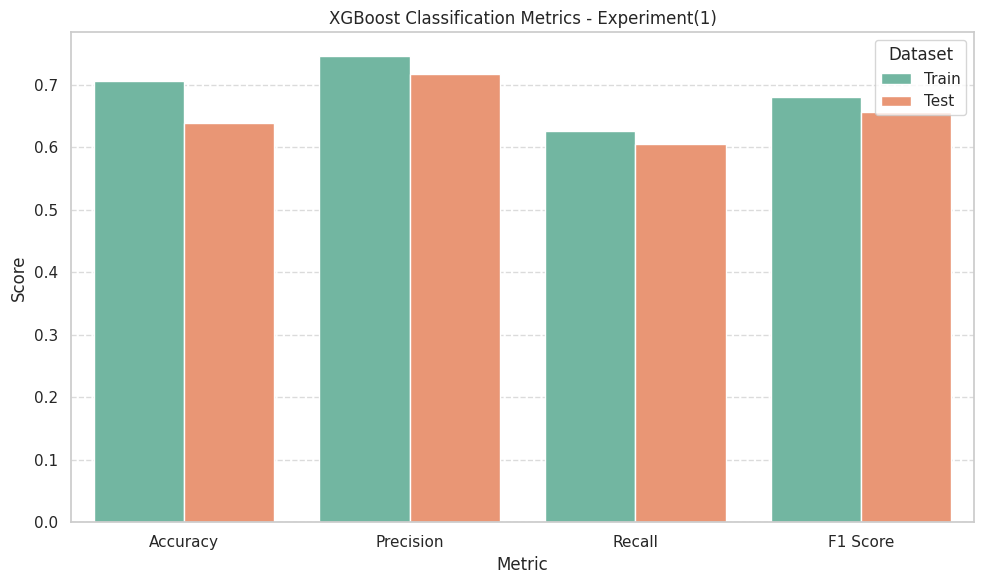

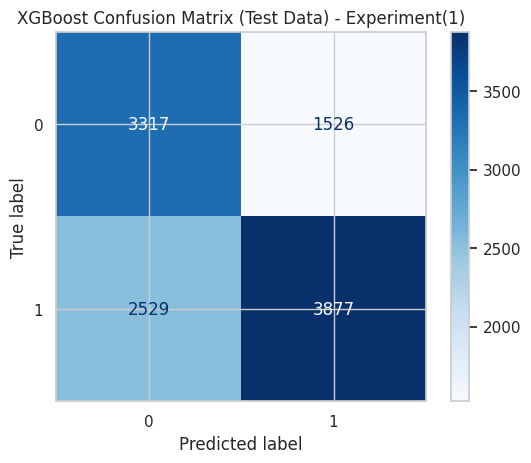

===== Classification Report (XGBOOST) =====
              precision    recall  f1-score   support

           0       0.57      0.68      0.62      4843
           1       0.72      0.61      0.66      6406

    accuracy                           0.64     11249
   macro avg       0.64      0.65      0.64     11249
weighted avg       0.65      0.64      0.64     11249



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


model_xgb = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    colsample_bytree=0.7531707499015159,
    learning_rate=0.30151362861673114,
    max_depth=5,
    n_estimators=50,
    subsample=0.8886918084659492
)


model_xgb.fit(X_resampled, y_resampled)


y_train_pred_xgb = model_xgb.predict(X_resampled)
y_test_pred_xgb = model_xgb.predict(X_test_processed)


def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1


train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb = classification_metrics(y_resampled, y_train_pred_xgb)
test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb = classification_metrics(y_test, y_test_pred_xgb)


print("===== XGBoost Training Metrics =====")
print(f"Accuracy: {train_acc_xgb:.4f}")
print(f"Precision: {train_prec_xgb:.4f}")
print(f"Recall: {train_rec_xgb:.4f}")
print(f"F1 Score: {train_f1_xgb:.4f}")

print("\n===== XGBoost Testing Metrics =====")
print(f"Accuracy: {test_acc_xgb:.4f}")
print(f"Precision: {test_prec_xgb:.4f}")
print(f"Recall: {test_rec_xgb:.4f}")
print(f"F1 Score: {test_f1_xgb:.4f}")


metrics_xgb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb],
    "Test": [test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb]
})

metrics_xgb_melted = metrics_xgb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_xgb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("XGBoost Classification Metrics - Experiment(1)")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()


cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=model_xgb.classes_)
disp_xgb.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix (Test Data) - Experiment(1)")
plt.show()


print("===== Classification Report (XGBOOST) =====")
print(classification_report(y_test, y_test_pred_xgb))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

param_dist = {
    'max_depth': [4, 5, 6],
    'learning_rate': np.linspace(0.05, 0.3, 10),
    'n_estimators': [50, 100, 150],
    'subsample': np.linspace(0.7, 1.0, 5),
    'colsample_bytree': np.linspace(0.7, 1.0, 5)
}

xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=60,
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_processed, y_train)

print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 60 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:05:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': np.float64(0.85), 'n_estimators': 100, 'max_depth': 5, 'learning_rate': np.float64(0.18888888888888888), 'colsample_bytree': np.float64(0.7)}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:07:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


===== XGBoost Training Metrics =====
Accuracy: 0.7144
Precision: 0.7506
Recall: 0.6421
F1 Score: 0.6922

===== XGBoost Testing Metrics =====
Accuracy: 0.6399
Precision: 0.7138
Recall: 0.6136
F1 Score: 0.6600


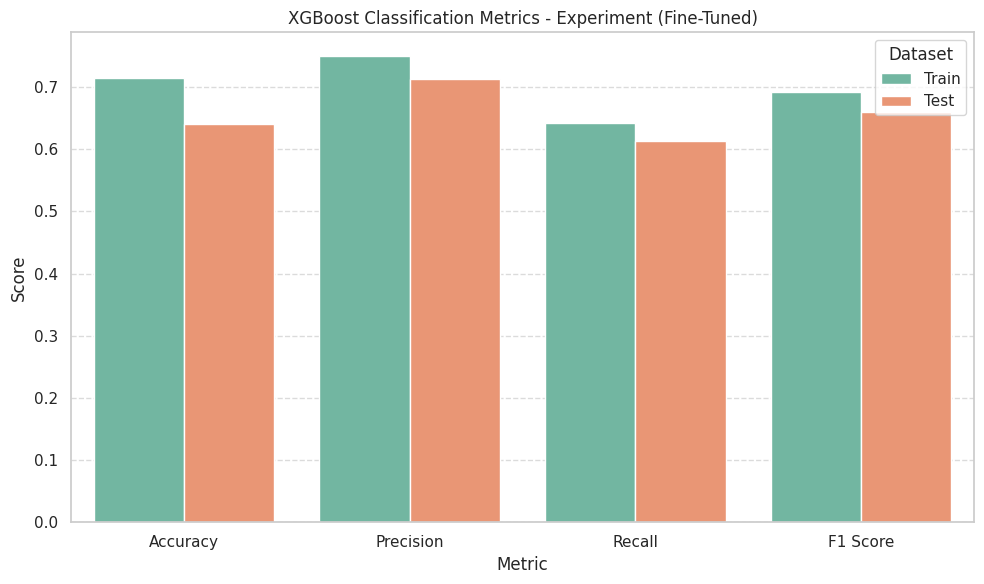

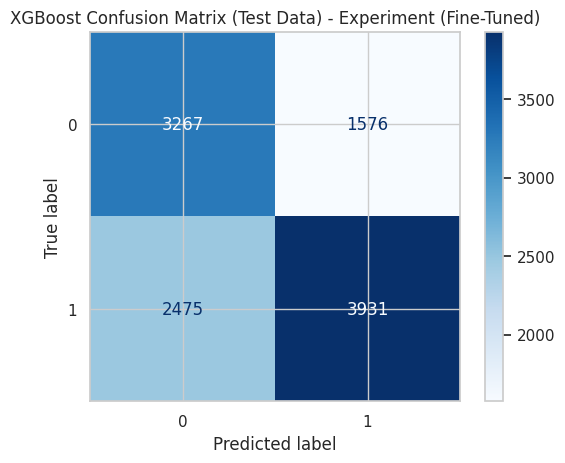

===== Classification Report (XGBOOST) =====
              precision    recall  f1-score   support

           0       0.57      0.67      0.62      4843
           1       0.71      0.61      0.66      6406

    accuracy                           0.64     11249
   macro avg       0.64      0.64      0.64     11249
weighted avg       0.65      0.64      0.64     11249



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


model_xgb = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    subsample=0.85,
    n_estimators=100,
    max_depth=5,
    learning_rate=0.18888888888888888,
    colsample_bytree=0.7
)


model_xgb.fit(X_resampled, y_resampled)


y_train_pred_xgb = model_xgb.predict(X_resampled)
y_test_pred_xgb = model_xgb.predict(X_test_processed)


def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1


train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb = classification_metrics(y_resampled, y_train_pred_xgb)
test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb = classification_metrics(y_test, y_test_pred_xgb)


print("===== XGBoost Training Metrics =====")
print(f"Accuracy: {train_acc_xgb:.4f}")
print(f"Precision: {train_prec_xgb:.4f}")
print(f"Recall: {train_rec_xgb:.4f}")
print(f"F1 Score: {train_f1_xgb:.4f}")

print("\n===== XGBoost Testing Metrics =====")
print(f"Accuracy: {test_acc_xgb:.4f}")
print(f"Precision: {test_prec_xgb:.4f}")
print(f"Recall: {test_rec_xgb:.4f}")
print(f"F1 Score: {test_f1_xgb:.4f}")


metrics_xgb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb],
    "Test": [test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb]
})

metrics_xgb_melted = metrics_xgb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_xgb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("XGBoost Classification Metrics - Experiment (Fine-Tuned)")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()


cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=model_xgb.classes_)
disp_xgb.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix (Test Data) - Experiment (Fine-Tuned)")
plt.show()


print("===== Classification Report (XGBOOST) =====")
print(classification_report(y_test, y_test_pred_xgb))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

param_dist = {
    'max_depth': [3, 4, 5],
    'learning_rate': np.linspace(0.05, 0.2, 6),
    'subsample': np.linspace(0.7, 0.9, 3),
    'colsample_bytree': np.linspace(0.7, 0.9, 3)
}

xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=40,
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_processed, y_train)

print("Best Parameters:", random_search.best_params_)



Fitting 3 folds for each of 40 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:15:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': np.float64(0.8), 'max_depth': 4, 'learning_rate': np.float64(0.17000000000000004), 'colsample_bytree': np.float64(0.8)}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:17:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


===== XGBoost Training Metrics =====
Accuracy: 0.6984
Precision: 0.7427
Recall: 0.6071
F1 Score: 0.6681

===== XGBoost Testing Metrics =====
Accuracy: 0.6417
Precision: 0.7273
Recall: 0.5933
F1 Score: 0.6535


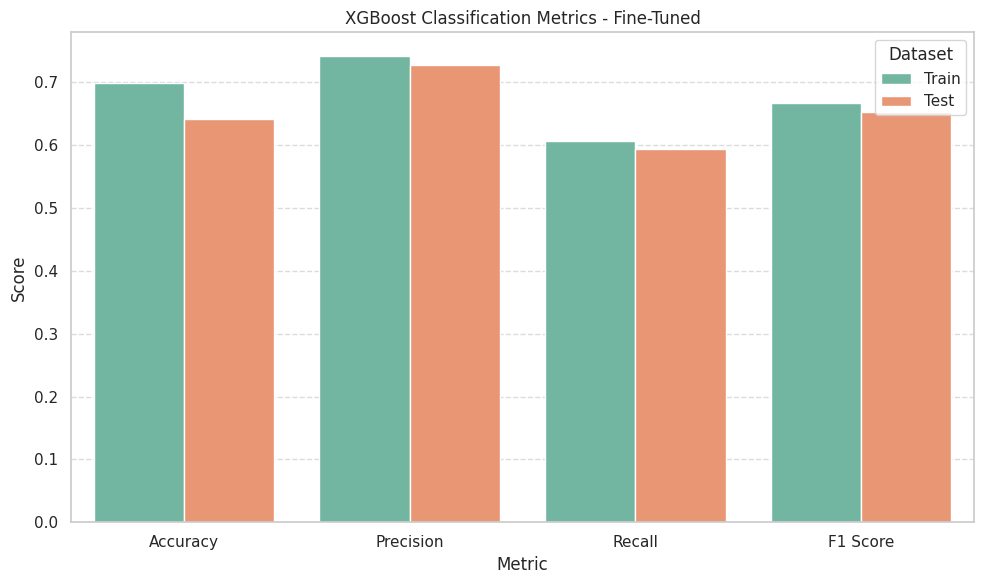

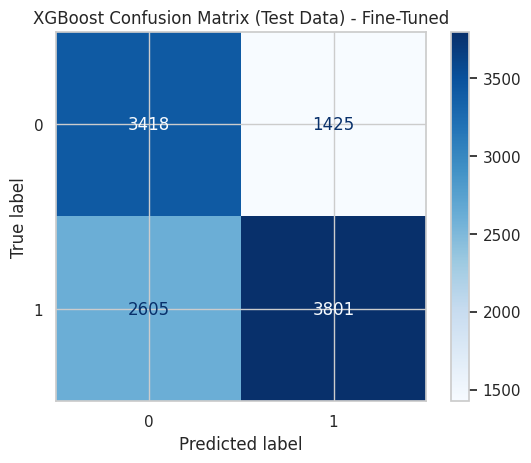

===== Classification Report (XGBOOST) =====
              precision    recall  f1-score   support

           0       0.57      0.71      0.63      4843
           1       0.73      0.59      0.65      6406

    accuracy                           0.64     11249
   macro avg       0.65      0.65      0.64     11249
weighted avg       0.66      0.64      0.64     11249



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_xgb = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    subsample=0.8,
    n_estimators=100,
    max_depth=4,
    learning_rate=0.17000000000000004,
    colsample_bytree=0.7
)

model_xgb.fit(X_resampled, y_resampled)

y_train_pred_xgb = model_xgb.predict(X_resampled)
y_test_pred_xgb = model_xgb.predict(X_test_processed)

def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1

train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb = classification_metrics(y_resampled, y_train_pred_xgb)
test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb = classification_metrics(y_test, y_test_pred_xgb)

print("===== XGBoost Training Metrics =====")
print(f"Accuracy: {train_acc_xgb:.4f}")
print(f"Precision: {train_prec_xgb:.4f}")
print(f"Recall: {train_rec_xgb:.4f}")
print(f"F1 Score: {train_f1_xgb:.4f}")

print("\n===== XGBoost Testing Metrics =====")
print(f"Accuracy: {test_acc_xgb:.4f}")
print(f"Precision: {test_prec_xgb:.4f}")
print(f"Recall: {test_rec_xgb:.4f}")
print(f"F1 Score: {test_f1_xgb:.4f}")

metrics_xgb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb],
    "Test": [test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb]
})

metrics_xgb_melted = metrics_xgb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_xgb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("XGBoost Classification Metrics - Fine-Tuned")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=model_xgb.classes_)
disp_xgb.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix (Test Data) - Fine-Tuned")
plt.show()

print("===== Classification Report (XGBOOST) =====")
print(classification_report(y_test, y_test_pred_xgb))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_distributions = {
    'n_estimators': randint(100, 201),
    'learning_rate': uniform(0.05, 0.15),
    'max_depth': randint(3, 8),
    'min_samples_split': randint(2, 5),
    'min_samples_leaf': randint(1, 4),
    'subsample': uniform(0.8, 0.2),
    'max_features': ['sqrt', 'log2', None]
}

model = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=30,
    scoring='f1_weighted',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_processed, y_train)

print("Best Parameters from Random Search:")
print(random_search.best_params_)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters from Random Search:
{'learning_rate': np.float64(0.061182596551965625), 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 180, 'subsample': np.float64(0.94226839054973)}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

param_dist = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': np.linspace(0.01, 0.3, 15),
    'n_estimators': [50, 100, 150, 200],
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_processed, y_train)

print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': np.float64(0.6), 'reg_lambda': 1.5, 'reg_alpha': 0.01, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': np.float64(0.01), 'gamma': 0.3, 'colsample_bytree': np.float64(0.6)}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:21:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:24:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


===== XGBoost Training Metrics =====
Accuracy: 0.6646
Precision: 0.7437
Recall: 0.5024
F1 Score: 0.5997

===== XGBoost Testing Metrics =====
Accuracy: 0.6428
Precision: 0.7848
Recall: 0.5136
F1 Score: 0.6209


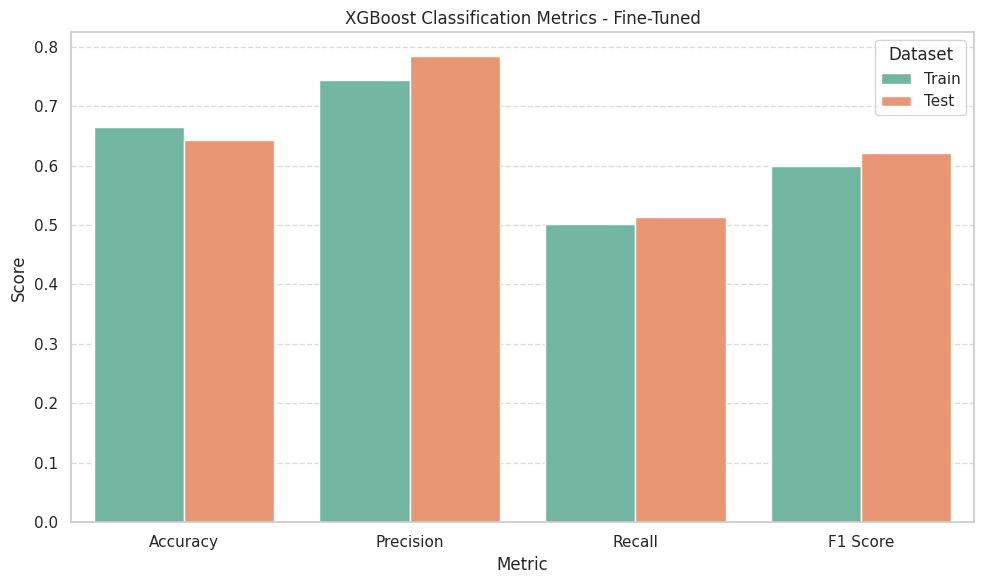

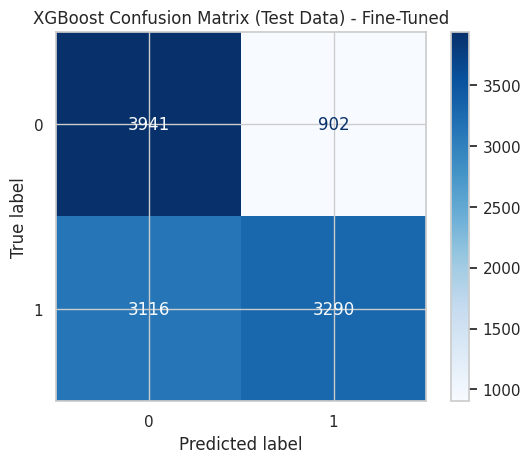

===== Classification Report (XGBOOST) =====
              precision    recall  f1-score   support

           0       0.56      0.81      0.66      4843
           1       0.78      0.51      0.62      6406

    accuracy                           0.64     11249
   macro avg       0.67      0.66      0.64     11249
weighted avg       0.69      0.64      0.64     11249



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_xgb = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    subsample=0.6,
    reg_lambda=1.5,
    reg_alpha=0.01,
    n_estimators=50,
    min_child_weight=1,
    max_depth=3,
    learning_rate=0.01,
    gamma=0.3,
    colsample_bytree=0.6
)

model_xgb.fit(X_resampled, y_resampled)

y_train_pred_xgb = model_xgb.predict(X_resampled)
y_test_pred_xgb = model_xgb.predict(X_test_processed)

def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1

train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb = classification_metrics(y_resampled, y_train_pred_xgb)
test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb = classification_metrics(y_test, y_test_pred_xgb)

print("===== XGBoost Training Metrics =====")
print(f"Accuracy: {train_acc_xgb:.4f}")
print(f"Precision: {train_prec_xgb:.4f}")
print(f"Recall: {train_rec_xgb:.4f}")
print(f"F1 Score: {train_f1_xgb:.4f}")

print("\n===== XGBoost Testing Metrics =====")
print(f"Accuracy: {test_acc_xgb:.4f}")
print(f"Precision: {test_prec_xgb:.4f}")
print(f"Recall: {test_rec_xgb:.4f}")
print(f"F1 Score: {test_f1_xgb:.4f}")

metrics_xgb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb],
    "Test": [test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb]
})

metrics_xgb_melted = metrics_xgb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_xgb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("XGBoost Classification Metrics - Fine-Tuned")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=model_xgb.classes_)
disp_xgb.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix (Test Data) - Fine-Tuned")
plt.show()

print("===== Classification Report (XGBOOST) =====")
print(classification_report(y_test, y_test_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:25:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


===== XGBoost Training Metrics =====
Accuracy: 0.6878
Precision: 0.7512
Recall: 0.5616
F1 Score: 0.6427

===== XGBoost Testing Metrics =====
Accuracy: 0.6433
Precision: 0.7515
Recall: 0.5584
F1 Score: 0.6407


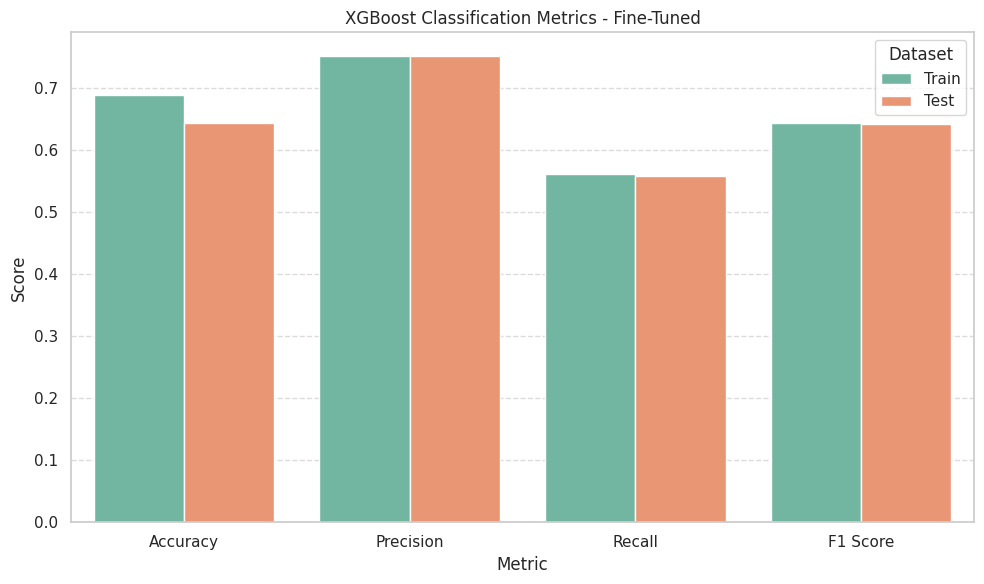

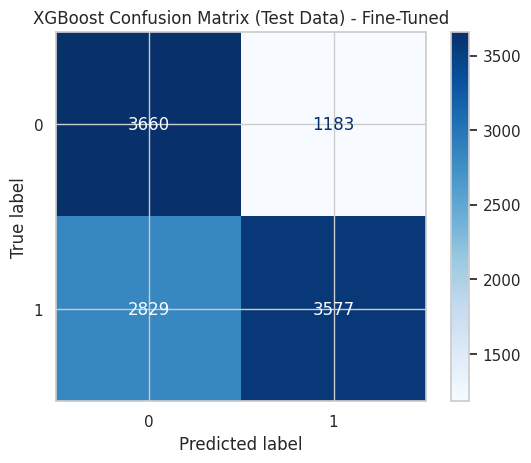

===== Classification Report (XGBOOST) =====
              precision    recall  f1-score   support

           0       0.56      0.76      0.65      4843
           1       0.75      0.56      0.64      6406

    accuracy                           0.64     11249
   macro avg       0.66      0.66      0.64     11249
weighted avg       0.67      0.64      0.64     11249



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_xgb = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    subsample=0.8,
    reg_lambda=1.0,
    reg_alpha=0.0,
    n_estimators=100,
    min_child_weight=1,
    max_depth=4,
    learning_rate=0.1,
    gamma=0.1,
    colsample_bytree=0.8
)


model_xgb.fit(X_resampled, y_resampled)

y_train_pred_xgb = model_xgb.predict(X_resampled)
y_test_pred_xgb = model_xgb.predict(X_test_processed)

def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return acc, prec, rec, f1

train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb = classification_metrics(y_resampled, y_train_pred_xgb)
test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb = classification_metrics(y_test, y_test_pred_xgb)

print("===== XGBoost Training Metrics =====")
print(f"Accuracy: {train_acc_xgb:.4f}")
print(f"Precision: {train_prec_xgb:.4f}")
print(f"Recall: {train_rec_xgb:.4f}")
print(f"F1 Score: {train_f1_xgb:.4f}")

print("\n===== XGBoost Testing Metrics =====")
print(f"Accuracy: {test_acc_xgb:.4f}")
print(f"Precision: {test_prec_xgb:.4f}")
print(f"Recall: {test_rec_xgb:.4f}")
print(f"F1 Score: {test_f1_xgb:.4f}")

metrics_xgb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_xgb, train_prec_xgb, train_rec_xgb, train_f1_xgb],
    "Test": [test_acc_xgb, test_prec_xgb, test_rec_xgb, test_f1_xgb]
})

metrics_xgb_melted = metrics_xgb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_xgb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("XGBoost Classification Metrics - Fine-Tuned")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=model_xgb.classes_)
disp_xgb.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix (Test Data) - Fine-Tuned")
plt.show()

print("===== Classification Report (XGBOOST) =====")
print(classification_report(y_test, y_test_pred_xgb))

In [ ]:
def classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return acc, prec, rec, f1


Pipeline saved successfully.
===== Training Metrics (Gradient Boosting) =====
Accuracy: 0.6640
Precision: 0.6914
Recall: 0.6640
F1 Score: 0.6516

===== Testing Metrics (Gradient Boosting) =====
Accuracy: 0.6314
Precision: 0.6856
Recall: 0.6314
F1 Score: 0.6245


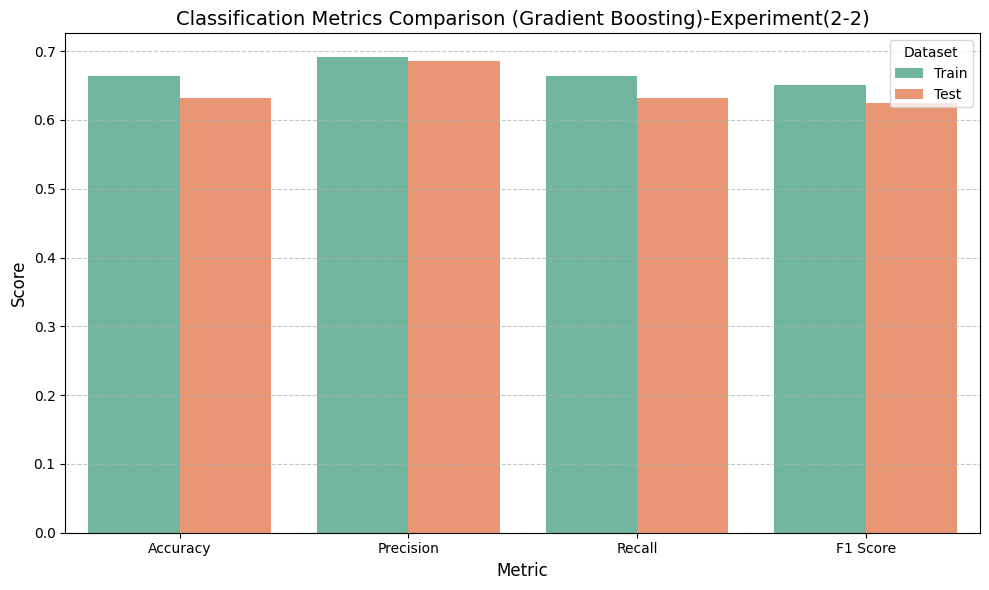

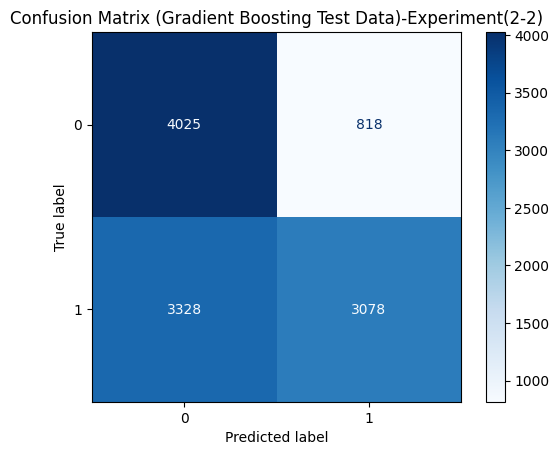

===== Classification Report (Gradient Boosting) =====
              precision    recall  f1-score   support

           0       0.55      0.83      0.66      4843
           1       0.79      0.48      0.60      6406

    accuracy                           0.63     11249
   macro avg       0.67      0.66      0.63     11249
weighted avg       0.69      0.63      0.62     11249

The model has been saved to a file: best_gradient_boosting_model.pkl


In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
top_5_features = ['age', 'conscientiousness', 'extraversion', 'neuroticism', 'openness']

#1. Extract only topfeatures
X_train_top = X_train[top_5_features].copy()
X_test_top= X_test[top_5_features].copy()


#2. Create and process pipeline
pipeline = Pipeline([
    ('winsorizer', Winsorizer(factor=1.5)),
    ('scaler', MinMaxScaler())
])
pipeline.fit(X_train_top)

X_train_processed = pipeline.transform(X_train_top)
X_test_processed = pipeline.transform(X_test_top)
#3. SMOTE on processed data only (topfeatures only)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)
with open("pipeline3.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("Pipeline saved successfully.")
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(
    learning_rate=0.061182596551965625,
    max_depth=3,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=4,
    n_estimators=180,
    subsample=0.94226839054973,
    random_state=42
)
model_gb.fit(X_resampled, y_resampled)

y_train_pred_gb = model_gb.predict(X_resampled)
y_test_pred_gb = model_gb.predict(X_test_processed)

train_acc_gb, train_prec_gb, train_rec_gb, train_f1_gb = classification_metrics(y_resampled, y_train_pred_gb)
test_acc_gb, test_prec_gb, test_rec_gb, test_f1_gb = classification_metrics(y_test, y_test_pred_gb)

print("===== Training Metrics (Gradient Boosting) =====")
print(f"Accuracy: {train_acc_gb:.4f}")
print(f"Precision: {train_prec_gb:.4f}")
print(f"Recall: {train_rec_gb:.4f}")
print(f"F1 Score: {train_f1_gb:.4f}")

print("\n===== Testing Metrics (Gradient Boosting) =====")
print(f"Accuracy: {test_acc_gb:.4f}")
print(f"Precision: {test_prec_gb:.4f}")
print(f"Recall: {test_rec_gb:.4f}")
print(f"F1 Score: {test_f1_gb:.4f}")

metrics_gb = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Train": [train_acc_gb, train_prec_gb, train_rec_gb, train_f1_gb],
    "Test": [test_acc_gb, test_prec_gb, test_rec_gb, test_f1_gb]
})

metrics_gb_melted = metrics_gb.melt(id_vars="Metric", var_name="Dataset", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_gb_melted, x="Metric", y="Value", hue="Dataset", palette="Set2")
plt.title("Classification Metrics Comparison (Gradient Boosting)-Experiment(2-2)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()

cm_gb = confusion_matrix(y_test, y_test_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=model_gb.classes_)
disp_gb.plot(cmap='Blues')
plt.title("Confusion Matrix (Gradient Boosting Test Data)-Experiment(2-2)")
plt.show()
print("===== Classification Report (Gradient Boosting) =====")
print(classification_report(y_test, y_test_pred_gb))
import joblib
joblib.dump(model_gb, 'best_gradient_boosting_model.pkl')
print("The model has been saved to a file: best_gradient_boosting_model.pkl")


In [ ]:
numeric_cols = ['age', 'neuroticism', 'extraversion', 'openness', 'agreeableness',
                'conscientiousness', 'impulsiveness', 'sensation']

pipeline = Pipeline([
    ('winsorizer', Winsorizer(factor=1.5)),
    ('scaler', MinMaxScaler())
])
pipeline.fit(X_train[numeric_cols])
with open("pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("Pipeline saved successfully.")

Pipeline saved successfully.


In [ ]:
#Test the model on real data
import pandas as pd
import joblib
df = pd.read_csv("/content/gen_test_data.csv", encoding='latin1')

# Download the pipeline
with open("/content/pipeline.pkl", "rb") as f:
    pipeline = joblib.load(f)
# Download the model
with open("/content/xgb_model.joblib", "rb") as f:
    loaded_model = joblib.load(f)
features = ['age', 'neuroticism', 'extraversion', 'openness', 'agreeableness','gender','education',
                'conscientiousness', 'impulsiveness', 'sensation']

X = df[features]
X_scaled = pipeline.transform(X)
y_pred = loaded_model.predict(X_scaled)
import pandas as pd


df['prediction_gb'] = y_pred


df.to_csv("Prediction results(xgb_model).csv", index=False)

print("The results are saved in prediction_results.csv")

results_df = pd.read_csv("Prediction results(xgb_model).csv")
print("\nFile Contents:\n")
print(results_df)


The results are saved in prediction_results.csv

File Contents:

     age  conscientiousness  extraversion  neuroticism  openness  cannabis  \
0      7                 49            37           53        46         1   
1     15                 47            32           38        36         1   
2     11                 43            47           40        56         0   
3      8                 50            42           42        41         0   
4      7                 49            43           44        41         1   
..   ...                ...           ...          ...       ...       ...   
195    5                 43            29           43        47         0   
196    5                 39            49           39        45         1   
197    9                 49            49           38        45         0   
198    9                 41            43           46        40         0   
199    3                 35            34           37        41         1   

In [ ]:
print(df.columns.tolist())


['age', 'conscientiousness', 'extraversion', 'neuroticism', 'openness', 'cannabis', 'gender', 'impulsiveness', 'sensation', 'education', 'agreeableness']


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df['cannabis'], df['prediction_gb']))


              precision    recall  f1-score   support

           0       0.51      0.82      0.63        99
           1       0.56      0.23      0.32       101

    accuracy                           0.52       200
   macro avg       0.54      0.52      0.48       200
weighted avg       0.54      0.52      0.47       200

